<a href="https://colab.research.google.com/github/pornpipatsira/Final-CS434-RFMT-Clustering/blob/main/V9_CS434_Final_Project_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Clustering / RFM **




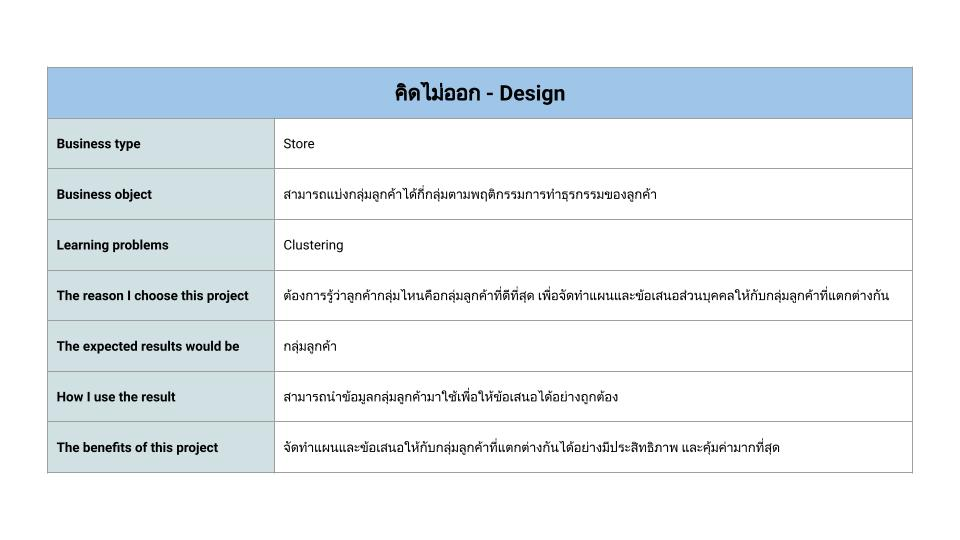

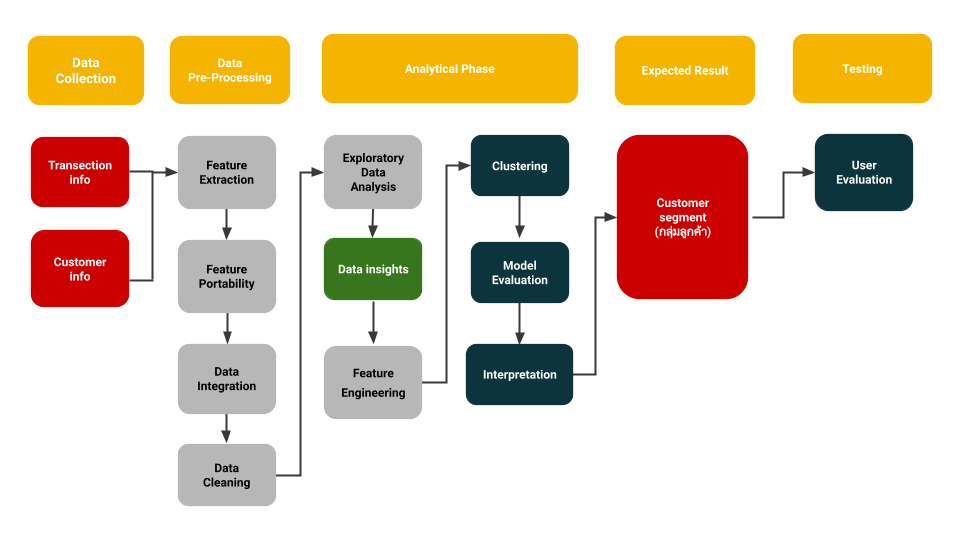

# Import Data/Install Package

```
Objective: 
*   นำเข้าข้อมูล
*   ติดตั้ง แพ็คเกจ
*   นำเข้า Libraies
```

In [2]:
#--------------------For RFM--------------------
#install package
# !pip uninstall plotly


!pip install cufflinks -q
!pip install colorama -q
!pip install missingno -q
!pip install pyforest -q
!pip install termcolor -q
!pip install wordcloud -q
!pip install squarify -q
!pip install pyclustertend -q
!pip install yellowbrick --user -q
!pip install plotly -q
!pip install plotly --upgrade -q

     |████████████████████████████████| 26.5 MB 70.0 MB/s 


In [3]:
#--------------------For RFMT--------------------
#1-Import Libraies
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
#%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as msno 
import matplotlib.pyplot as plt
import squarify # pip install squarify
import plotly.express as px


#from sklearn.compose import make_column_transformer

# Scaling
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import minmax_scale

# Importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# makes strings colored
import colorama
from colorama import Fore, Style
from termcolor import colored

#import ipywidgets
from ipywidgets import interact

# White grid plots for dark mode users
sns.set_style("whitegrid")

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.cluster import KMeans, AgglomerativeClustering
from pyclustertend import hopkins
from sklearn.preprocessing import scale
from sklearn.metrics.cluster import adjusted_rand_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples,silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [8]:
#path ของไฟล์
url = 'https://raw.githubusercontent.com/pornpipatsira/Final-CS434-RFMT-Clustering/main/Online%20Retail.csv'
df = pd.read_csv(url, index_col=0)

# Pre-processing


```
Objective: 
*   ตรวจสอบข้อมูล
*   ดูความสัมพันธ์ระหว่างคอลัมน์ InvoiceNo, Quantity และ UnitPrice
*   ตัวอักษร "C" ในคอลัมน์ InvoiceNo หมายถึงอะไร
*   คลีน Data และค่าที่ หายไป
*   Explore คำสั่งซื้อ
*   Explore ลูกค้า ด้วย ประเทศ
*   เจาะหาเฉพาะตลาดของ UK
```



## Check

In [9]:
#ลองเช็คข้อมูลโดย .head เพื่อจะดูข้อมูลข้างบนเพื่อดูคร่าวๆของลักษณะข้อมูล
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0  536365.0    85123A   WHITE HANGING HEART T-LIGHT HOLDER     6.000   
1  536365.0   71053.0                  WHITE METAL LANTERN     6.000   
2  536365.0    84406B       CREAM CUPID HEARTS COAT HANGER     8.000   
3  536365.0    84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6.000   
4  536365.0    84029E       RED WOOLLY HOTTIE WHITE HEART.     6.000   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00      2.550   17850.000  United Kingdom  
1  2010-12-01 08:26:00      3.390   17850.000  United Kingdom  
2  2010-12-01 08:26:00      2.750   17850.000  United Kingdom  
3  2010-12-01 08:26:00      3.390   17850.000  United Kingdom  
4  2010-12-01 08:26:00      3.390   17850.000  United Kingdom

In [10]:
#อยากรู้ว่าข้อมูลมีกี่แถว,  Missing value ไหม, แต่ละคอลัมน์เป็น Data Type อะไรบ้าง
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  float64
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(3), object(5)
memory usage: 37.2+ MB


In [11]:
#ตรวจสอบซ้ำว่าไม่มีรายการคำสั่งซื้อที่ซ้ำกัน
df.duplicated().value_counts()

False    536641
True       5268
dtype: int64

## Cleaning

In [12]:
#นับข้อมูลที่หายไป แล้วก็บอกจำนวนพร้อมกัน %
def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]

###############################################################################

#output บอกว่ามีค่าอะไรที่หายไปและค่าเฉพาะเท่าไร / ทำการเขียน function แก้ไขชื่อ Column เปลี่ยน เป็นตัวเล็กแล้วก็ทำการลบพวก and หรือ ช่องว่างเดียวตอนเขียนโปรแกรมต่อรันไม่ได้
def first_looking(df):
    print(colored("Shape:", attrs=['bold']), df.shape,'\n', 
          colored('-'*79, 'red', attrs=['bold']),
          colored("\nInfo:\n", attrs=['bold']), sep='')
    print(df.info(), '\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", attrs=['bold']), df.nunique(),'\n',
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", attrs=['bold']), missing_values(df),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", attrs=['bold']), list(df.columns),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')

    df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

    print(colored("Columns after rename:", attrs=['bold']), list(df.columns),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    
        
# def multicolinearity_control(df):
#     feature =[]
#     collinear=[]
#     for col in df.corr().columns:
#         for i in df.corr().index:
#             if (abs(df.corr()[col][i])> .9 and abs(df.corr()[col][i]) < 1):
#                     feature.append(col)
#                     collinear.append(i)
#                     print(colored(f"Multicolinearity alert in between:{col} - {i}", 
#                                   "red", attrs=['bold']), df.shape,'\n',
#                                   colored('-'*79, 'red', attrs=['bold']), sep='')

#ดรอป column ซ้ำ
def duplicate_values(df):
    print(colored("เช็คค่าซ้ำ...", attrs=['bold']), sep='')
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored("รายการที่ซ้ำกันถูกทิ้ง!"),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    else:
        print(colored("ไม่มีค่าซ้ำนะ"),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')     

#ดรอปคอลลัมที่มีค่าว่าง        
def drop_columns(df, drop_columns):
    if drop_columns !=[]:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'ที่ถูกทิ้ง')
    else:
        print(colored('เช็คค่าว่างในแต่ละ columns!', attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
        
#ดรอปค่าว่าง        
def drop_null(df, limit):
    print('Shape:', df.shape)
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100)>limit:
            print(df.isnull().sum()[i], 'จากทั้งหมด', i ,'ไม่มีค่าและถูกทิ้ง')
            df.drop(i, axis=1, inplace=True)
            print('new shape:', df.shape)       
    print('shape ใหม่หลังจากแก้ค่า Missing value:', df.shape)

In [13]:
first_looking(df)
duplicate_values(df)
drop_columns(df,[])
drop_null(df, 90)
# df.head()
# df.tail()
# df.sample(5)
# df.describe().T
# df.describe(include=object).T

# df.head()
# df.tail()
# df.sample(5)
# df.describe().T
# df.describe(include=None).T

Shape:(541909, 8)
-------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  float64
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(3), object(5)
memory usage: 37.2+ MB
None
-------------------------------------------------------------------------------
Number of Uniques:
InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64
-----------------

In [14]:
#ดรอป แถวที่มี NaN ใน column customerid
df = df.dropna(subset=['customerid'])
df.shape

(401604, 8)

In [15]:
missing_values(df)

Empty DataFrame
Columns: [Missing_Number, Missing_Percent]
Index: []

In [16]:
df['customerid'] = df['customerid'].astype('int')

# EDA


##Pre-processsing data

### ตัวอักษร "C" ในคอลัมน์ InvoiceNo หมายถึงอะไร

In [17]:
#แปลงค่า string โชว์ค่าที่เริ่มต้นด้วยตัว C
df[df['invoiceno'].astype(str).str.startswith('C')]

invoiceno stockcode                       description  quantity  \
141      C536379         D                          Discount    -1.000   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS    -1.000   
235      C536391   22556.0    PLASTERS IN TIN CIRCUS PARADE    -12.000   
236      C536391   21984.0  PACK OF 12 PINK PAISLEY TISSUES    -24.000   
237      C536391   21983.0  PACK OF 12 BLUE PAISLEY TISSUES    -24.000   
...          ...       ...                               ...       ...   
540449   C581490   23144.0   ZINC T-LIGHT HOLDER STARS SMALL   -11.000   
541541   C581499         M                            Manual    -1.000   
541715   C581568   21258.0        VICTORIAN SEWING BOX LARGE    -5.000   
541716   C581569   84978.0  HANGING HEART JAR T-LIGHT HOLDER    -1.000   
541717   C581569   20979.0     36 PENCILS TUBE RED RETROSPOT    -5.000   

                invoicedate  unitprice  customerid         country  
141     2010-12-01 09:41:00     27.500       14527  United Kingdom  
154     2010-12-01 09:49:00      4.650       15311  United Kingdom  
235     2010-12-01 10:24:00      1.650       17548  United Kingdom  
236     2010-12-01 10:24:00      0.290       17548  United Kingdom  
237     2010-12-01 10:24:00      0.290       17548  United Kingdom  
...                     ...        ...         ...             ...  
540449  2011-12-09 09:57:00      0.830       14397  United Kingdom  
541541  2011-12-09 10:28:00    224.690       15498  United Kingdom  
541715  2011-12-09 11:57:00     10.950       15311  United Kingdom  
541716  2011-12-09 11:58:00      1.250       17315  United Kingdom  
541717  2011-12-09 11:58:00      1.250       17315  United Kingdom  

[8872 rows x 8 columns]

In [18]:
#ดูว่ามีค่าที่ขึ้นต้นด้วยตัว C เท่าไร
df["invoiceno"].str.startswith('C').value_counts()

False    392732
True       8872
Name: invoiceno, dtype: int64

In [19]:
#ดูเป็น %
df["invoiceno"].str.startswith('C').value_counts(normalize=True)*100

False   97.791
True     2.209
Name: invoiceno, dtype: float64

In [20]:
#ดูความสัมพันธ์
df[df["invoiceno"].str.startswith('C')] [["invoiceno","quantity", "unitprice"]]

invoiceno  quantity  unitprice
141      C536379    -1.000     27.500
154      C536383    -1.000      4.650
235      C536391   -12.000      1.650
236      C536391   -24.000      0.290
237      C536391   -24.000      0.290
...          ...       ...        ...
540449   C581490   -11.000      0.830
541541   C581499    -1.000    224.690
541715   C581568    -5.000     10.950
541716   C581569    -1.000      1.250
541717   C581569    -5.000      1.250

[8872 rows x 3 columns]

### ประเทศที่มีจำนวนผู้ใช้มากที่สุด และ มีมูลค่าการเงินมากที่สุด

จำนวนผู้ใช้รวมแต่ละประเทศ

In [21]:
#สร้าง column ใหม่ รวมราคาใน transaction นั้น
df['total_price'] = df['quantity'] * df['unitprice']

Text(0.5, 0, 'Customer')

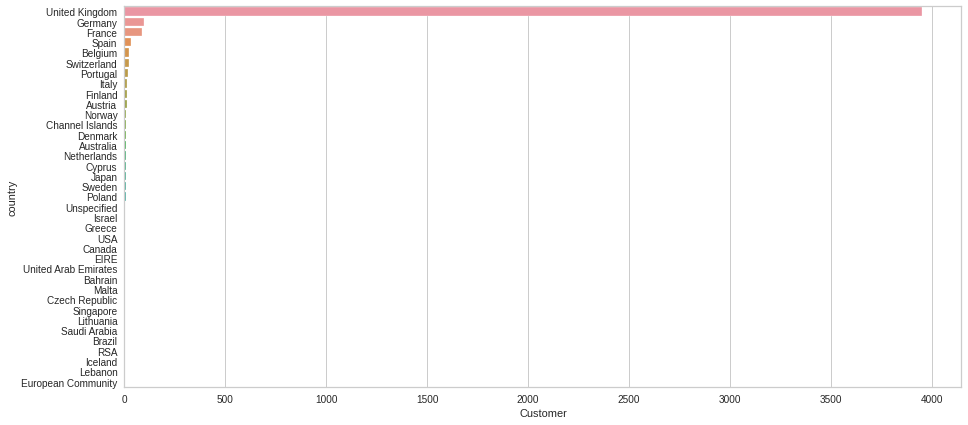

In [22]:
# SEABORN
plt.figure(figsize=(15,7))
sns.barplot(y = df.groupby('country')["customerid"].nunique().sort_values(ascending=False).index, 
            x = df.groupby('country')["customerid"].nunique().sort_values(ascending=False).values);
plt.xlabel('Customer')

*ดูภาพรวมแบบมีไม่ลูกค้า Uk

Text(0.5, 0, 'Customer')

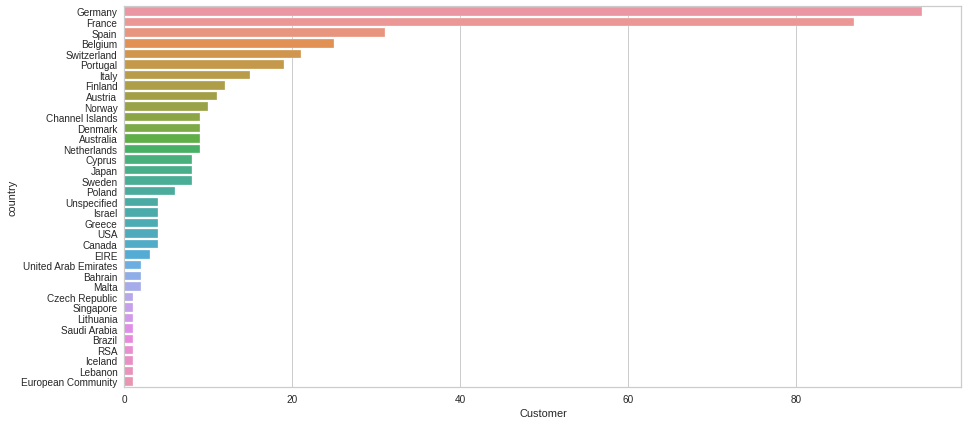

In [23]:
# SEABORN
plt.figure(figsize=(15,7))
sns.barplot(y = df.groupby('country')["customerid"].nunique().sort_values(ascending=False).iloc[1:].index, 
            x = df.groupby('country')["customerid"].nunique().sort_values(ascending=False).iloc[1:].values);
plt.xlabel('Customer')

*ดูภาพรวมการใช้จ่าย

####มูลค่าการใช้จ่ายของแต่ละประเทศ

In [24]:
#สร้างเพื่อใช้ anal
df_total_price = pd.DataFrame(df.groupby('country')["total_price"].sum().sort_values(ascending=False))

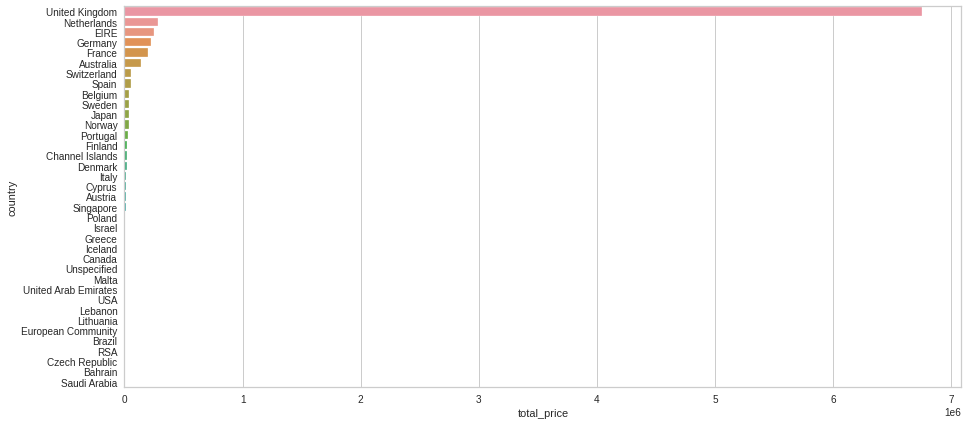

In [25]:
# SEABORN
plt.figure(figsize=(15,7))
# plt.xlim(145.920, 7285024.644) # To see and understand the_total price's range.
sns.barplot(data = df_total_price, x = df_total_price["total_price"], y = df_total_price.index);

*ดูแบบไม่มี UK

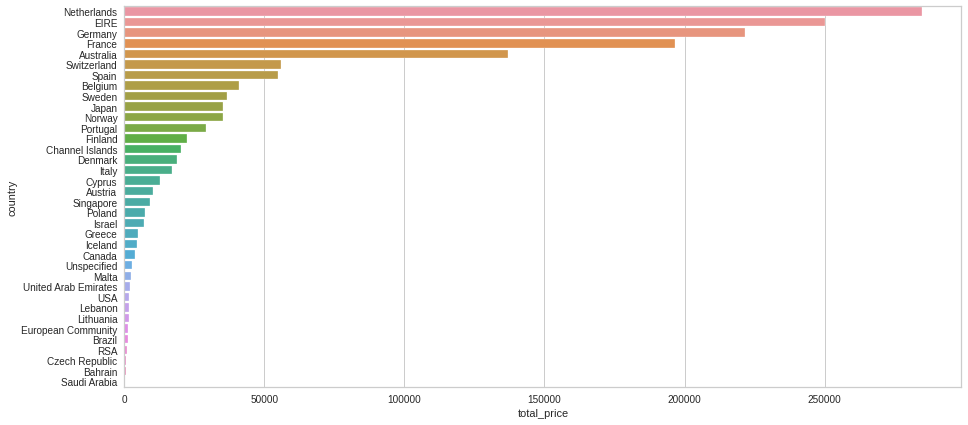

In [26]:
plt.figure(figsize = (15,7))
sns.barplot(data = df_total_price.iloc[1:], x = df_total_price.iloc[1:]["total_price"], y = df_total_price.iloc[1:].index);

### เจาะหาสินค้าที่ยอดขายดีที่สุด

#### แบบทุกประเทศ

Text(0, 0.5, 'Sales')

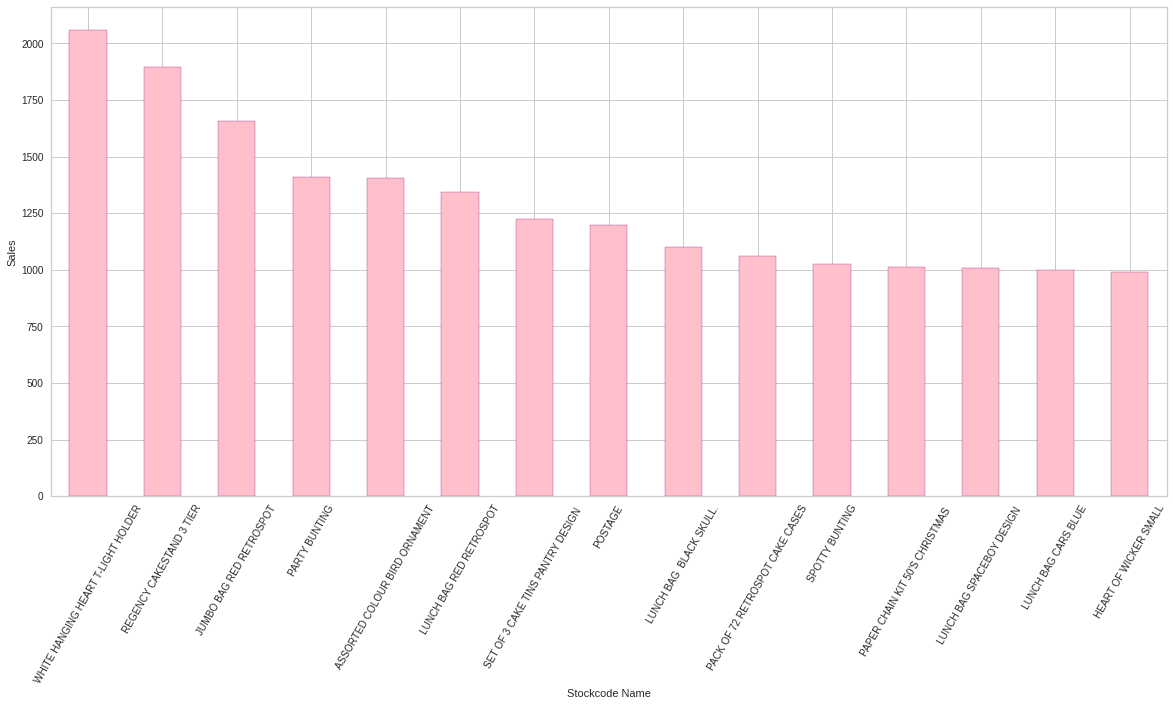

In [27]:
df["description"].value_counts().head(15).plot(kind="bar", width=0.5, color='pink', edgecolor='purple', figsize=(20,9))
plt.xticks(rotation=60);
plt.xlabel('Stockcode Name')
plt.ylabel('Sales')

#### แบบเฉพาะประเทศ UK

In [28]:
df_uk = df[df["country"] == 'United Kingdom']

*ดูสินค้าที่ คน UK ชอบซื้อ

Text(0, 0.5, 'Sales')

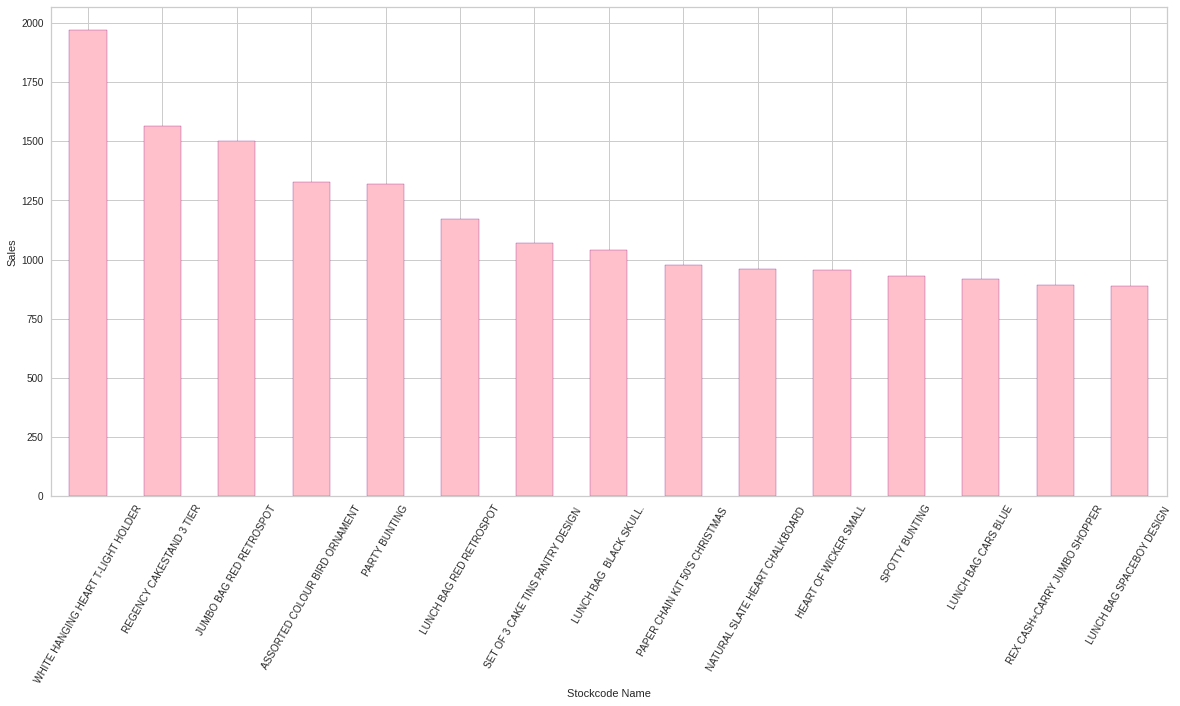

In [29]:
df_uk["description"].value_counts().head(15).plot(kind="bar", width=0.5, color='pink', edgecolor='purple', figsize=(20,9))
plt.xticks(rotation=60);
plt.xlabel('Stockcode Name')
plt.ylabel('Sales')

### เดือนที่มียอดขายสูงที่สุด ประจำปี 2011

In [30]:
import calendar
df['invoicedate'] = pd.to_datetime(df['invoicedate'])
monthly_sale = df.copy()
monthly_sale['month'] = pd.DatetimeIndex(monthly_sale['invoicedate']).month
monthly_sale = (df.groupby([df['invoicedate'].dt.year.rename('y'), df['invoicedate'].dt.month.rename('m')]).sum()).reset_index()

In [31]:
monthly_sale.drop([0], inplace = True )
monthly_sale = monthly_sale.reset_index(drop=True)
monthly_sale['m'] =monthly_sale['m'].transform(lambda x: calendar.month_name[x])

(0.0, 1200000.0)

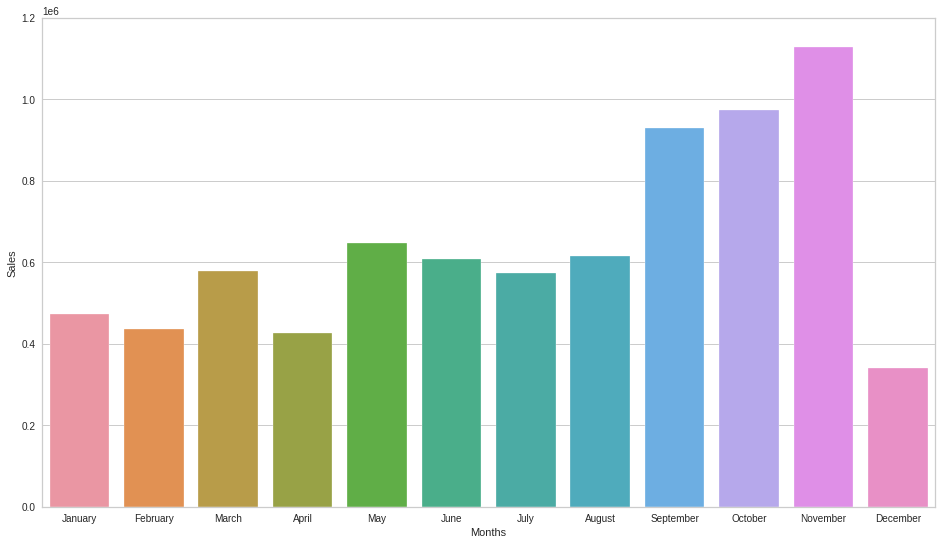

In [32]:
plt.figure(figsize = (16,9))
sns.barplot(data = monthly_sale.iloc[0:], y = monthly_sale.iloc[0:]["total_price"], x = monthly_sale.iloc[0:]["m"]);
plt.xticks(range(0,12),rotation='horizontal')
plt.xlabel('Months')
plt.ylabel('Sales')
plt.ylim(0,1200000)

### วันที่มียอดขายสูงที่สุด ประจำปี 2011

In [33]:
day_sale = df.copy()
day_sale['weekday'] = pd.DatetimeIndex(day_sale['invoicedate']).weekday
day_sale = (day_sale.groupby([day_sale['invoicedate'].dt.year.rename('y'), day_sale['weekday']]).sum()).reset_index()
day_sale.drop([0,1,2,3,4,5], inplace = True )
day_sale['weekday'] = day_sale['weekday'].transform(lambda x: calendar.day_name[x])

Text(0, 0.5, 'Sales')

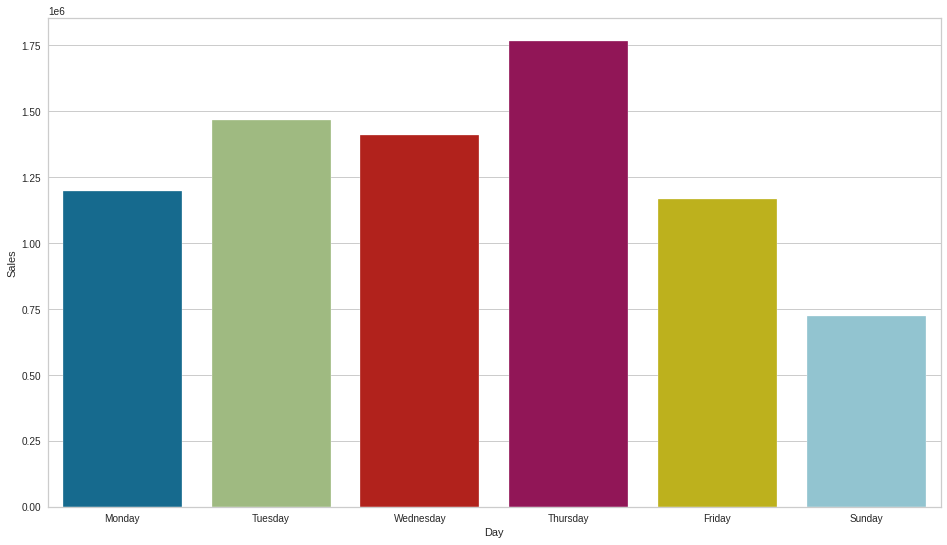

In [34]:
plt.figure(figsize = (16,9))
sns.barplot(data = day_sale.iloc[0:], y = day_sale.iloc[0:]["total_price"], x = day_sale.iloc[0:]["weekday"]);
plt.xticks(range(0,6),rotation='horizontal')
plt.xlabel('Day')
plt.ylabel('Sales')

###เวลาที่มียอดขายสูงที่สุด ประจำปี 2011

In [35]:
hour_sale = df.copy()
hour_sale['hour'] = pd.DatetimeIndex(hour_sale['invoicedate']).hour
# day_sale

Text(0, 0.5, 'Sales')

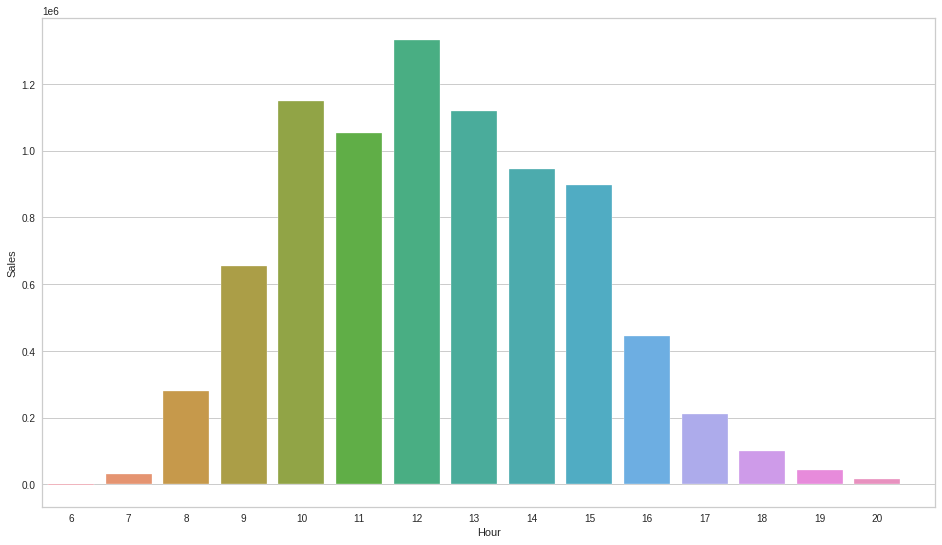

In [36]:
hour_sale = hour_sale.groupby('hour').sum().reset_index().sort_values('hour')

plt.figure(figsize = (16,9))
sns.barplot(data = hour_sale.iloc[0:], y = hour_sale.iloc[0:]["total_price"], x = hour_sale.iloc[0:]["hour"]);
plt.xticks(range(0,16),rotation='horizontal')
plt.xlabel('Hour')
plt.ylabel('Sales')
# plt.ylim(0,1200000)

##RFMT Data

###Prepare RFMT

In [37]:
df.sample(5)

invoiceno stockcode                       description  quantity  \
90183   543989.0   22630.0              DOLLY GIRL LUNCH BOX   256.000   
151728  549567.0   22426.0            ENAMEL WASH BOWL CREAM     1.000   
393909  570861.0   22074.0       6 RIBBONS SHIMMERING PINKS     12.000   
508097  579196.0   22131.0  FOOD CONTAINER SET 3 LOVE HEART      1.000   
347569  567310.0   21993.0        FLORAL FOLK STATIONERY SET     2.000   

               invoicedate  unitprice  customerid         country  total_price  
90183  2011-02-15 09:52:00      1.650       12415       Australia      422.400  
151728 2011-04-10 15:07:00      3.750       13632  United Kingdom        3.750  
393909 2011-10-12 15:27:00      1.650       14775  United Kingdom       19.800  
508097 2011-11-28 15:54:00      4.130       14096  United Kingdom        4.130  
347569 2011-09-19 13:45:00      1.250       15504  United Kingdom        2.500

### Recency

In [38]:
last_invoice = max(df['invoicedate'])
first_invoice = min(df['invoicedate'])
df['invoicedate'] = pd.to_datetime(df['invoicedate'])
df["invoicedate"].dtype.type

numpy.datetime64

In [39]:
first_invoice = min(df['invoicedate'])

In [40]:
df["invoicedate"].dtype.type

numpy.datetime64

In [41]:
df.head()

invoiceno stockcode                          description  quantity  \
0  536365.0    85123A   WHITE HANGING HEART T-LIGHT HOLDER     6.000   
1  536365.0   71053.0                  WHITE METAL LANTERN     6.000   
2  536365.0    84406B       CREAM CUPID HEARTS COAT HANGER     8.000   
3  536365.0    84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6.000   
4  536365.0    84029E       RED WOOLLY HOTTIE WHITE HEART.     6.000   

          invoicedate  unitprice  customerid         country  total_price  
0 2010-12-01 08:26:00      2.550       17850  United Kingdom       15.300  
1 2010-12-01 08:26:00      3.390       17850  United Kingdom       20.340  
2 2010-12-01 08:26:00      2.750       17850  United Kingdom       22.000  
3 2010-12-01 08:26:00      3.390       17850  United Kingdom       20.340  
4 2010-12-01 08:26:00      3.390       17850  United Kingdom       20.340

In [42]:
#สร้าง column date ด้วย .date with out time zone
df["date"] = df['invoicedate'].dt.date
df.head()

invoiceno stockcode                          description  quantity  \
0  536365.0    85123A   WHITE HANGING HEART T-LIGHT HOLDER     6.000   
1  536365.0   71053.0                  WHITE METAL LANTERN     6.000   
2  536365.0    84406B       CREAM CUPID HEARTS COAT HANGER     8.000   
3  536365.0    84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6.000   
4  536365.0    84029E       RED WOOLLY HOTTIE WHITE HEART.     6.000   

          invoicedate  unitprice  customerid         country  total_price  \
0 2010-12-01 08:26:00      2.550       17850  United Kingdom       15.300   
1 2010-12-01 08:26:00      3.390       17850  United Kingdom       20.340   
2 2010-12-01 08:26:00      2.750       17850  United Kingdom       22.000   
3 2010-12-01 08:26:00      3.390       17850  United Kingdom       20.340   
4 2010-12-01 08:26:00      3.390       17850  United Kingdom       20.340   

         date  
0  2010-12-01  
1  2010-12-01  
2  2010-12-01  
3  2010-12-01  
4  2010-12-01

*จัดกลุ่มโดยเรียงลำดับ CustomerID max-min และ เช็ควันสั่งซื้อล่าสุด

In [43]:
df.groupby("customerid").date.max()

customerid
12346    2011-01-18
12347    2011-12-07
12348    2011-09-25
12349    2011-11-21
12350    2011-02-02
            ...    
18280    2011-03-07
18281    2011-06-12
18282    2011-12-02
18283    2011-12-06
18287    2011-10-28
Name: date, Length: 4372, dtype: object

In [44]:
#กรุ๊ปด้วย date
df.groupby("customerid").date.transform(max)

0         2011-02-10
1         2011-02-10
2         2011-02-10
3         2011-02-10
4         2011-02-10
             ...    
541904    2011-12-09
541905    2011-12-09
541906    2011-12-09
541907    2011-12-09
541908    2011-12-09
Name: date, Length: 401604, dtype: object

In [45]:
df["last_purchased_date"] = df.groupby("customerid").date.transform(max)
df.head()

invoiceno stockcode                          description  quantity  \
0  536365.0    85123A   WHITE HANGING HEART T-LIGHT HOLDER     6.000   
1  536365.0   71053.0                  WHITE METAL LANTERN     6.000   
2  536365.0    84406B       CREAM CUPID HEARTS COAT HANGER     8.000   
3  536365.0    84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6.000   
4  536365.0    84029E       RED WOOLLY HOTTIE WHITE HEART.     6.000   

          invoicedate  unitprice  customerid         country  total_price  \
0 2010-12-01 08:26:00      2.550       17850  United Kingdom       15.300   
1 2010-12-01 08:26:00      3.390       17850  United Kingdom       20.340   
2 2010-12-01 08:26:00      2.750       17850  United Kingdom       22.000   
3 2010-12-01 08:26:00      3.390       17850  United Kingdom       20.340   
4 2010-12-01 08:26:00      3.390       17850  United Kingdom       20.340   

         date last_purchased_date  
0  2010-12-01          2011-02-10  
1  2010-12-01          2011-02-10  
2  2010-12-01          2011-02-10  
3  2010-12-01          2011-02-10  
4  2010-12-01          2011-02-10

*คำนวณวันนับจากการเริ่มซื้อ - ซื้อครั้งล่าสุด

In [46]:
last_invoice

Timestamp('2011-12-09 12:50:00')

In [47]:
from datetime import timedelta
last_invoice = pd.to_datetime(last_invoice).date() + timedelta(days=1)
last_invoice

datetime.date(2011, 12, 10)

In [48]:
df.groupby('customerid')['last_purchased_date'].apply(lambda x: last_invoice - x)

0        303 days
1        303 days
2        303 days
3        303 days
4        303 days
           ...   
541904     1 days
541905     1 days
541906     1 days
541907     1 days
541908     1 days
Name: last_purchased_date, Length: 401604, dtype: timedelta64[ns]

In [49]:
df["recency"] = df.groupby('customerid')['last_purchased_date'].apply(lambda x: last_invoice - x)
df.head()

invoiceno stockcode                          description  quantity  \
0  536365.0    85123A   WHITE HANGING HEART T-LIGHT HOLDER     6.000   
1  536365.0   71053.0                  WHITE METAL LANTERN     6.000   
2  536365.0    84406B       CREAM CUPID HEARTS COAT HANGER     8.000   
3  536365.0    84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6.000   
4  536365.0    84029E       RED WOOLLY HOTTIE WHITE HEART.     6.000   

          invoicedate  unitprice  customerid         country  total_price  \
0 2010-12-01 08:26:00      2.550       17850  United Kingdom       15.300   
1 2010-12-01 08:26:00      3.390       17850  United Kingdom       20.340   
2 2010-12-01 08:26:00      2.750       17850  United Kingdom       22.000   
3 2010-12-01 08:26:00      3.390       17850  United Kingdom       20.340   
4 2010-12-01 08:26:00      3.390       17850  United Kingdom       20.340   

         date last_purchased_date  recency  
0  2010-12-01          2011-02-10 303 days  
1  2010-12-01          2011-02-10 303 days  
2  2010-12-01          2011-02-10 303 days  
3  2010-12-01          2011-02-10 303 days  
4  2010-12-01          2011-02-10 303 days

###Frequency

In [50]:
df.duplicated().sum()

0

In [51]:
df.duplicated().any()

False

In [52]:
df = df.drop_duplicates()

In [53]:
df.groupby('customerid')["invoiceno"].count().sort_values(ascending = False)

customerid
17841    7812
14911    5898
14096    5128
12748    4459
14606    2759
         ... 
15657       1
18113       1
15668       1
13270       1
17752       1
Name: invoiceno, Length: 4372, dtype: int64

In [54]:
df['frequency'] = df.groupby('customerid')["invoiceno"].transform('count')
df.head(3)

invoiceno stockcode                         description  quantity  \
0  536365.0    85123A  WHITE HANGING HEART T-LIGHT HOLDER     6.000   
1  536365.0   71053.0                 WHITE METAL LANTERN     6.000   
2  536365.0    84406B      CREAM CUPID HEARTS COAT HANGER     8.000   

          invoicedate  unitprice  customerid         country  total_price  \
0 2010-12-01 08:26:00      2.550       17850  United Kingdom       15.300   
1 2010-12-01 08:26:00      3.390       17850  United Kingdom       20.340   
2 2010-12-01 08:26:00      2.750       17850  United Kingdom       22.000   

         date last_purchased_date  recency  frequency  
0  2010-12-01          2011-02-10 303 days        309  
1  2010-12-01          2011-02-10 303 days        309  
2  2010-12-01          2011-02-10 303 days        309

In [55]:
df.tail(3)

invoiceno stockcode                      description  quantity  \
541906  581587.0   23254.0    CHILDRENS CUTLERY DOLLY GIRL      4.000   
541907  581587.0   23255.0  CHILDRENS CUTLERY CIRCUS PARADE     4.000   
541908  581587.0   22138.0    BAKING SET 9 PIECE RETROSPOT      3.000   

               invoicedate  unitprice  customerid country  total_price  \
541906 2011-12-09 12:50:00      4.150       12680  France       16.600   
541907 2011-12-09 12:50:00      4.150       12680  France       16.600   
541908 2011-12-09 12:50:00      4.950       12680  France       14.850   

              date last_purchased_date recency  frequency  
541906  2011-12-09          2011-12-09  1 days         52  
541907  2011-12-09          2011-12-09  1 days         52  
541908  2011-12-09          2011-12-09  1 days         52

###Monetary

In [56]:
df.groupby('customerid')["total_price"].transform('sum')

0        5303.480
1        5303.480
2        5303.480
3        5303.480
4        5303.480
           ...   
541904    862.810
541905    862.810
541906    862.810
541907    862.810
541908    862.810
Name: total_price, Length: 401604, dtype: float64

In [57]:
df["monetary"] = df.groupby('customerid')["total_price"].transform('sum')
df.head(3)

invoiceno stockcode                         description  quantity  \
0  536365.0    85123A  WHITE HANGING HEART T-LIGHT HOLDER     6.000   
1  536365.0   71053.0                 WHITE METAL LANTERN     6.000   
2  536365.0    84406B      CREAM CUPID HEARTS COAT HANGER     8.000   

          invoicedate  unitprice  customerid         country  total_price  \
0 2010-12-01 08:26:00      2.550       17850  United Kingdom       15.300   
1 2010-12-01 08:26:00      3.390       17850  United Kingdom       20.340   
2 2010-12-01 08:26:00      2.750       17850  United Kingdom       22.000   

         date last_purchased_date  recency  frequency  monetary  
0  2010-12-01          2011-02-10 303 days        309  5303.480  
1  2010-12-01          2011-02-10 303 days        309  5303.480  
2  2010-12-01          2011-02-10 303 days        309  5303.480

###Tenure

In [58]:
df.groupby("customerid").date.min()

customerid
12346    2011-01-18
12347    2010-12-07
12348    2010-12-16
12349    2011-11-21
12350    2011-02-02
            ...    
18280    2011-03-07
18281    2011-06-12
18282    2011-08-05
18283    2011-01-06
18287    2011-05-22
Name: date, Length: 4372, dtype: object

In [59]:
df.groupby("customerid").date.transform(min)

0         2010-12-01
1         2010-12-01
2         2010-12-01
3         2010-12-01
4         2010-12-01
             ...    
541904    2011-08-18
541905    2011-08-18
541906    2011-08-18
541907    2011-08-18
541908    2011-08-18
Name: date, Length: 401604, dtype: object

In [60]:
df["first_purchased_date"] = df.groupby("customerid").date.transform(min)
df.head()

invoiceno stockcode                          description  quantity  \
0  536365.0    85123A   WHITE HANGING HEART T-LIGHT HOLDER     6.000   
1  536365.0   71053.0                  WHITE METAL LANTERN     6.000   
2  536365.0    84406B       CREAM CUPID HEARTS COAT HANGER     8.000   
3  536365.0    84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6.000   
4  536365.0    84029E       RED WOOLLY HOTTIE WHITE HEART.     6.000   

          invoicedate  unitprice  customerid         country  total_price  \
0 2010-12-01 08:26:00      2.550       17850  United Kingdom       15.300   
1 2010-12-01 08:26:00      3.390       17850  United Kingdom       20.340   
2 2010-12-01 08:26:00      2.750       17850  United Kingdom       22.000   
3 2010-12-01 08:26:00      3.390       17850  United Kingdom       20.340   
4 2010-12-01 08:26:00      3.390       17850  United Kingdom       20.340   

         date last_purchased_date  recency  frequency  monetary  \
0  2010-12-01          2011-02-10 303 days        309  5303.480   
1  2010-12-01          2011-02-10 303 days        309  5303.480   
2  2010-12-01          2011-02-10 303 days        309  5303.480   
3  2010-12-01          2011-02-10 303 days        309  5303.480   
4  2010-12-01          2011-02-10 303 days        309  5303.480   

  first_purchased_date  
0           2010-12-01  
1           2010-12-01  
2           2010-12-01  
3           2010-12-01  
4           2010-12-01

In [61]:
first_purchased = max(df['first_purchased_date'])
first_purchased

datetime.date(2011, 12, 9)

In [62]:
# first_purchased = pd.to_datetime(first_purchased).date()
df["Tenure"] = df.groupby('customerid')['last_purchased_date'].apply(lambda x: first_purchased - x)
df.head()

invoiceno stockcode                          description  quantity  \
0  536365.0    85123A   WHITE HANGING HEART T-LIGHT HOLDER     6.000   
1  536365.0   71053.0                  WHITE METAL LANTERN     6.000   
2  536365.0    84406B       CREAM CUPID HEARTS COAT HANGER     8.000   
3  536365.0    84029G  KNITTED UNION FLAG HOT WATER BOTTLE     6.000   
4  536365.0    84029E       RED WOOLLY HOTTIE WHITE HEART.     6.000   

          invoicedate  unitprice  customerid         country  total_price  \
0 2010-12-01 08:26:00      2.550       17850  United Kingdom       15.300   
1 2010-12-01 08:26:00      3.390       17850  United Kingdom       20.340   
2 2010-12-01 08:26:00      2.750       17850  United Kingdom       22.000   
3 2010-12-01 08:26:00      3.390       17850  United Kingdom       20.340   
4 2010-12-01 08:26:00      3.390       17850  United Kingdom       20.340   

         date last_purchased_date  recency  frequency  monetary  \
0  2010-12-01          2011-02-10 303 days        309  5303.480   
1  2010-12-01          2011-02-10 303 days        309  5303.480   
2  2010-12-01          2011-02-10 303 days        309  5303.480   
3  2010-12-01          2011-02-10 303 days        309  5303.480   
4  2010-12-01          2011-02-10 303 days        309  5303.480   

  first_purchased_date   Tenure  
0           2010-12-01 302 days  
1           2010-12-01 302 days  
2           2010-12-01 302 days  
3           2010-12-01 302 days  
4           2010-12-01 302 days

### RFMT Table

#### RFMT

In [63]:
rfmt_segmentdata1 = df.copy()

In [64]:
df[df["invoiceno"].str.startswith('C')] [["invoiceno","quantity", "unitprice"]]

invoiceno  quantity  unitprice
141      C536379    -1.000     27.500
154      C536383    -1.000      4.650
235      C536391   -12.000      1.650
236      C536391   -24.000      0.290
237      C536391   -24.000      0.290
...          ...       ...        ...
540449   C581490   -11.000      0.830
541541   C581499    -1.000    224.690
541715   C581568    -5.000     10.950
541716   C581569    -1.000      1.250
541717   C581569    -5.000      1.250

[8872 rows x 3 columns]

In [65]:
snapshot_date = df['date'].max() + timedelta(days=1)
rfmt_table = df.groupby('customerid') \
         .agg({'date': lambda x: (snapshot_date - x.max()).days, # recency
               'invoiceno': 'nunique', # frequency nunique
               'total_price': 'sum', # monetary value
               'first_purchased_date': lambda x: (snapshot_date - x.min()).days # tenure
              }).round(0)

# rfmt_table.dropna(inplace=True) 
rfmt_table.columns = ['recency','frequency','monetary','tenure']

In [66]:
rfmt_table

recency  frequency  monetary  tenure
customerid                                      
12346           326          2     0.000     326
12347             3          7  4310.000     368
12348            76          4  1797.000     359
12349            19          1  1758.000      19
12350           311          1   334.000     311
...             ...        ...       ...     ...
18280           278          1   181.000     278
18281           181          1    81.000     181
18282             8          3   177.000     127
18283             4         16  2046.000     338
18287            43          3  1837.000     202

[4372 rows x 4 columns]

In [67]:
# rfmt_table = rfmt_table.query('recency > 0') # keep only non-zero monetary values, box cox transformation requires positive values
# rfmt_table = rfmt_table.query('frequency > 0')
rfmt_table = rfmt_table.query('monetary > 0')
# rfmt_table = rfmt_table.query('tenure > 0')
# rfmt_table = rfmt_table.astype({"monetary": int})
# rfmt_table

In [68]:
rfmt_table

recency  frequency  monetary  tenure
customerid                                      
12347             3          7  4310.000     368
12348            76          4  1797.000     359
12349            19          1  1758.000      19
12350           311          1   334.000     311
12352            37         11  1545.000     297
...             ...        ...       ...     ...
18280           278          1   181.000     278
18281           181          1    81.000     181
18282             8          3   177.000     127
18283             4         16  2046.000     338
18287            43          3  1837.000     202

[4317 rows x 4 columns]

In [69]:
rfmt_table.head(5)

recency  frequency  monetary  tenure
customerid                                      
12347             3          7  4310.000     368
12348            76          4  1797.000     359
12349            19          1  1758.000      19
12350           311          1   334.000     311
12352            37         11  1545.000     297

#### RFMT M = Mean of monetary

In [70]:
rfmt_mean_table = rfmt_table.copy()
rfmt_mean_table['monetary'] = rfmt_mean_table['monetary']/rfmt_mean_table['frequency']
rfmt_mean_table.dropna(inplace=True)
rfmt_mean_table.columns = ['recency','frequency','monetary_mean','tenure']
# rfmt_mean_table

In [71]:
rfmt_mean_table.head(5)

recency  frequency  monetary_mean  tenure
customerid                                           
12347             3          7        615.714     368
12348            76          4        449.250     359
12349            19          1       1758.000      19
12350           311          1        334.000     311
12352            37         11        140.455     297

####RFMT Segment for show output

In [72]:
rfmt_pipe1 = rfmt_table.copy()
rfmt_pipe2 = rfmt_table.copy()

In [73]:
rfmt_segment_table = pd.merge(df, rfmt_table, left_on='customerid', right_on='customerid', how='left')
rfmt_segment_table = rfmt_segment_table.drop(columns=['invoiceno','stockcode','description','quantity','invoicedate','unitprice','country','total_price','date'])
rfmt_segment_table = pd.concat([rfmt_segment_table,rfmt_segment_table]).drop_duplicates(subset='customerid')
rfmt_segment_table = rfmt_segment_table.query('recency_y > 0') 
rfmt_segment_table = rfmt_segment_table.query('frequency_y > 0')
rfmt_segment_table = rfmt_segment_table.query('monetary_y > 0')
rfmt_segment_table = rfmt_segment_table.query('tenure > 0')
rfmt_segment_table = rfmt_segment_table.astype({"recency_y": int, "frequency_y": int, "monetary_y": int,"tenure": int})
rfmt_segment_table = rfmt_segment_table.set_index('customerid').sort_index(ascending=True)
rfmt_segment_table['customerid'] = rfmt_segment_table.index
rfmt_segment_table.rename(columns={'recency_y': 'recency', 'frequency_y': 'frequency', 'monetary_y': 'monetary'}, inplace=True)
rfmt_segment_table = rfmt_segment_table[['customerid', 'first_purchased_date', 'last_purchased_date', 'recency', 'frequency','monetary','tenure',]]
rfmt_segment_table

customerid first_purchased_date last_purchased_date  recency  \
customerid                                                                 
12347            12347           2010-12-07          2011-12-07        3   
12348            12348           2010-12-16          2011-09-25       76   
12349            12349           2011-11-21          2011-11-21       19   
12350            12350           2011-02-02          2011-02-02      311   
12352            12352           2011-02-16          2011-11-03       37   
...                ...                  ...                 ...      ...   
18280            18280           2011-03-07          2011-03-07      278   
18281            18281           2011-06-12          2011-06-12      181   
18282            18282           2011-08-05          2011-12-02        8   
18283            18283           2011-01-06          2011-12-06        4   
18287            18287           2011-05-22          2011-10-28       43   

            frequency  monetary  tenure  
customerid                               
12347               7      4310     368  
12348               4      1797     359  
12349               1      1758      19  
12350               1       334     311  
12352              11      1545     297  
...               ...       ...     ...  
18280               1       181     278  
18281               1        81     181  
18282               3       177     127  
18283              16      2046     338  
18287               3      1837     202  

[4317 rows x 7 columns]

In [74]:
rfmt_segment_mean_table = pd.merge(df, rfmt_mean_table, left_on='customerid', right_on='customerid', how='left')
rfmt_segment_mean_table = rfmt_segment_mean_table.drop(columns=['invoiceno','stockcode','description','quantity','invoicedate','unitprice','country','total_price','date'])
rfmt_segment_mean_table = pd.concat([rfmt_segment_mean_table,rfmt_segment_mean_table]).drop_duplicates(subset='customerid')
rfmt_segment_mean_table = rfmt_segment_mean_table.query('recency_y > 0') 
rfmt_segment_mean_table = rfmt_segment_mean_table.query('frequency_y > 0')
rfmt_segment_mean_table = rfmt_segment_mean_table.query('monetary_mean > 0')
rfmt_segment_mean_table = rfmt_segment_mean_table.query('tenure > 0')
rfmt_segment_mean_table = rfmt_segment_mean_table.astype({"recency_y": int, "frequency_y": int, "monetary_mean": float,"tenure": int})
rfmt_segment_mean_table = rfmt_segment_mean_table.set_index('customerid').sort_index(ascending=True)
rfmt_segment_mean_table['customerid'] = rfmt_segment_mean_table.index
rfmt_segment_mean_table.rename(columns={'recency_y': 'recency', 'frequency_y': 'frequency', 'monetary_mean': 'monetary_mean'}, inplace=True)
rfmt_segment_mean_table = rfmt_segment_mean_table[['customerid', 'first_purchased_date', 'last_purchased_date', 'recency', 'frequency','monetary_mean','tenure',]]
rfmt_segment_mean_table

customerid first_purchased_date last_purchased_date  recency  \
customerid                                                                 
12347            12347           2010-12-07          2011-12-07        3   
12348            12348           2010-12-16          2011-09-25       76   
12349            12349           2011-11-21          2011-11-21       19   
12350            12350           2011-02-02          2011-02-02      311   
12352            12352           2011-02-16          2011-11-03       37   
...                ...                  ...                 ...      ...   
18280            18280           2011-03-07          2011-03-07      278   
18281            18281           2011-06-12          2011-06-12      181   
18282            18282           2011-08-05          2011-12-02        8   
18283            18283           2011-01-06          2011-12-06        4   
18287            18287           2011-05-22          2011-10-28       43   

            frequency  monetary_mean  tenure  
customerid                                    
12347               7        615.714     368  
12348               4        449.250     359  
12349               1       1758.000      19  
12350               1        334.000     311  
12352              11        140.455     297  
...               ...            ...     ...  
18280               1        181.000     278  
18281               1         81.000     181  
18282               3         59.000     127  
18283              16        127.875     338  
18287               3        612.333     202  

[4317 rows x 7 columns]

###ลำดับผู้ใช้ที่มีการใช้จ่ายสูงสุด

Text(0, 0.5, 'Sales')

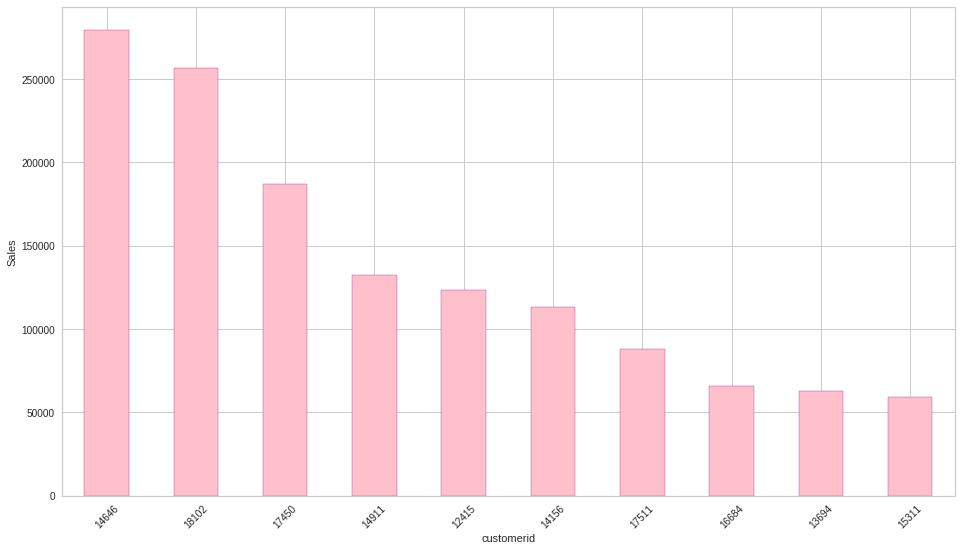

In [75]:
rfmt_most_monetary = rfmt_segment_table.nlargest(10,'monetary')
rfmt_most_monetary["monetary"].head(10).plot(kind="bar", width=0.5, color='pink', edgecolor='purple', figsize=(16,9))
plt.xticks(rotation=45);
plt.ylabel('Sales')

# Feature Engineering

```
Objective: เพื่อทำให้ Data เป็น Normalized เพื่อให้ง่ายต่อการวิเคราะห์ข้อมูล โดยเริ่มจาก scaled ข้อมูลและผู้ใช้

- Box-Cox จะทำงานได้กับเฉพาะ Data ที่มีข้อมูลเป็นค่าบวกเท่านั้น
```
<!-- - Yeo-Johnson ทำงานกับ data ที่มีค่าทั้งค่าบวกและค่าลบ -->



In [76]:
#rfmt_segment_table[COLUMNS]
#sns.pairplot(rfmt_segment_table[COLUMNS])

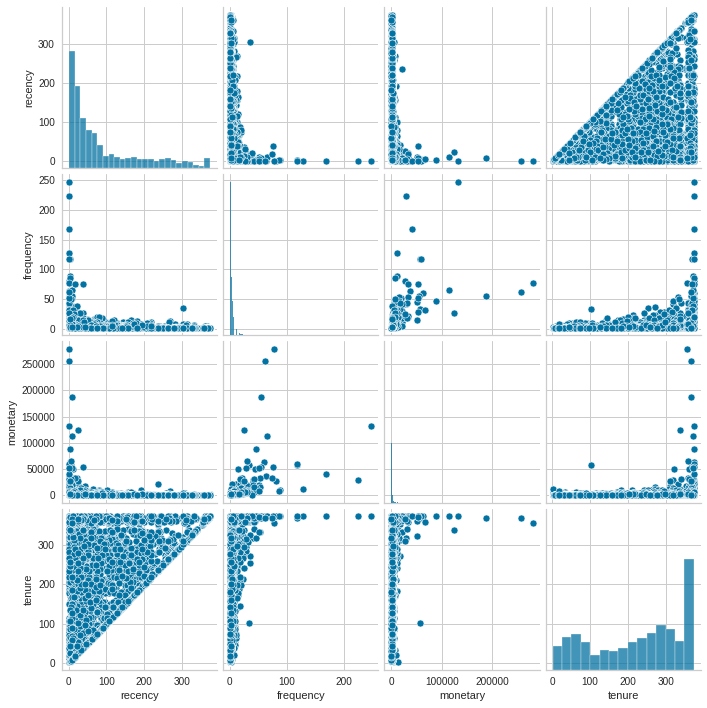

In [77]:
COLUMNS=['recency', 'frequency', 'monetary', 'tenure']
sns.pairplot(rfmt_table[COLUMNS])
# sns.pairplot(rfmt_table)
# plt.show()

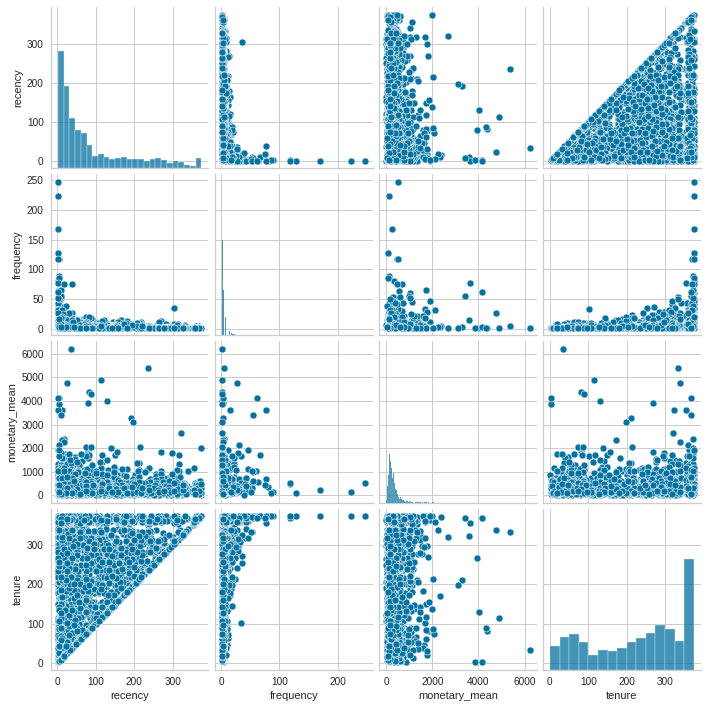

In [78]:
COLUMNS=['recency', 'frequency', 'monetary_mean', 'tenure']
sns.pairplot(rfmt_mean_table[COLUMNS])

##Normalized Explain

### RFMT

Text(0.5, 1.0, 'Tenure')

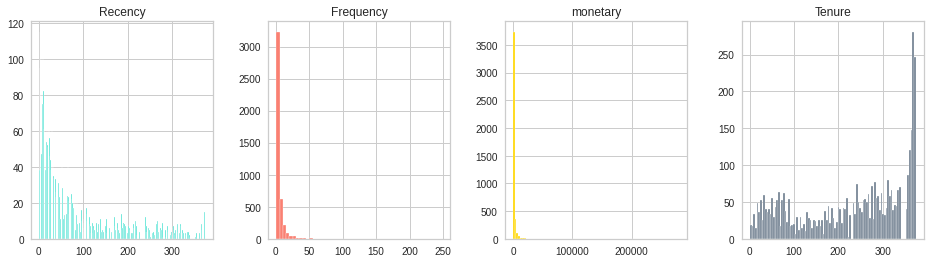

In [79]:
fig, axes = plt.subplots(1, 4, figsize=(16,4))

rfmt_table.hist('recency', bins=500, color='turquoise', ax=axes[0])
rfmt_table.hist('frequency', bins=50, color='salmon', ax=axes[1])
rfmt_table.hist('monetary', bins=100, color='gold',ax=axes[2])
rfmt_table.hist('tenure', bins=100, color='slategray',ax=axes[3])

axes[0].set_title('Recency')
axes[1].set_title('Frequency')
axes[2].set_title('monetary')
axes[3].set_title('Tenure')

*จะสังเกตจากกราฟด้านบนได้ว่าตัวแปร RFMT ของเรามีความแบ้

In [80]:
from sklearn import preprocessing
pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)
cols = ['recency', 'frequency', 'monetary', 'tenure']
matric1 = pt.fit_transform(rfmt_table[cols])
matric1[:5]

array([[  1.19545583,   1.44321879,   6.0155269 , 269.90065748],
       [  6.12337038,   1.11667433,   5.56528603, 263.68497522],
       [  3.71186193,   0.        ,   5.55356365,  15.78417964],
       [  9.15351949,   0.        ,   4.60072231, 230.36245357],
       [  4.80807544,   1.66697048,   5.4841255 , 220.58445435]])

In [81]:
bc_cols = [f'bc_{c}' for c in cols]

In [82]:
rfmt_boxcox = rfmt_table.copy().reset_index()
rfmt_boxcox = pd.concat([rfmt_boxcox, pd.DataFrame(matric1, columns= bc_cols)], axis='columns')
rfmt_boxcox = rfmt_boxcox.set_index('customerid').sort_index(ascending=True)


cols = [0,1,2,3]
rfmt_boxcox.drop(rfmt_boxcox.columns[cols],axis=1,inplace=True)
rfmt_boxcox.rename(columns={'bc_recency': 'recency', 'bc_frequency': 'frequency', 'bc_monetary': 'monetary', 'bc_tenure': 'tenure'}, inplace=True)
rfmt_boxcox


recency  frequency  monetary  tenure
customerid                                      
12347         1.195      1.443     6.016 269.901
12348         6.123      1.117     5.565 263.685
12349         3.712      0.000     5.554  15.784
12350         9.154      0.000     4.601 230.362
12352         4.808      1.667     5.484 220.584
...             ...        ...       ...     ...
18280         8.888      0.000     4.214 207.268
18281         7.912      0.000     3.676 138.279
18282         2.445      0.924     4.200  98.906
18283         1.543      1.829     5.634 249.143
18287         5.071      0.924     5.577 153.379

[4317 rows x 4 columns]

Text(0.5, 1.0, 'Box Cox Tenure')

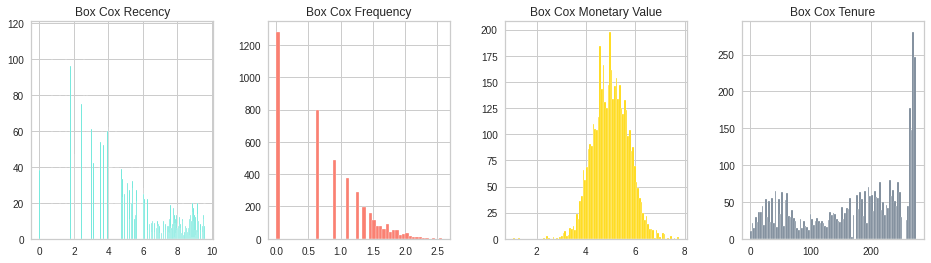

In [83]:
fig, axes = plt.subplots(1, 4, figsize=(16,4))

rfmt_boxcox.hist('recency', bins=500, color='turquoise', ax=axes[0])
rfmt_boxcox.hist('frequency', bins=50, color='salmon', ax=axes[1])
rfmt_boxcox.hist('monetary', bins=100, color='gold',ax=axes[2])
rfmt_boxcox.hist('tenure', bins=100, color='slategray',ax=axes[3])

axes[0].set_title('Box Cox Recency')
axes[1].set_title('Box Cox Frequency')
axes[2].set_title('Box Cox Monetary Value')
axes[3].set_title('Box Cox Tenure')
# *จะสังเกตได้ว่าค่าใน box-cox ของเราจะเบ้น้อยลง

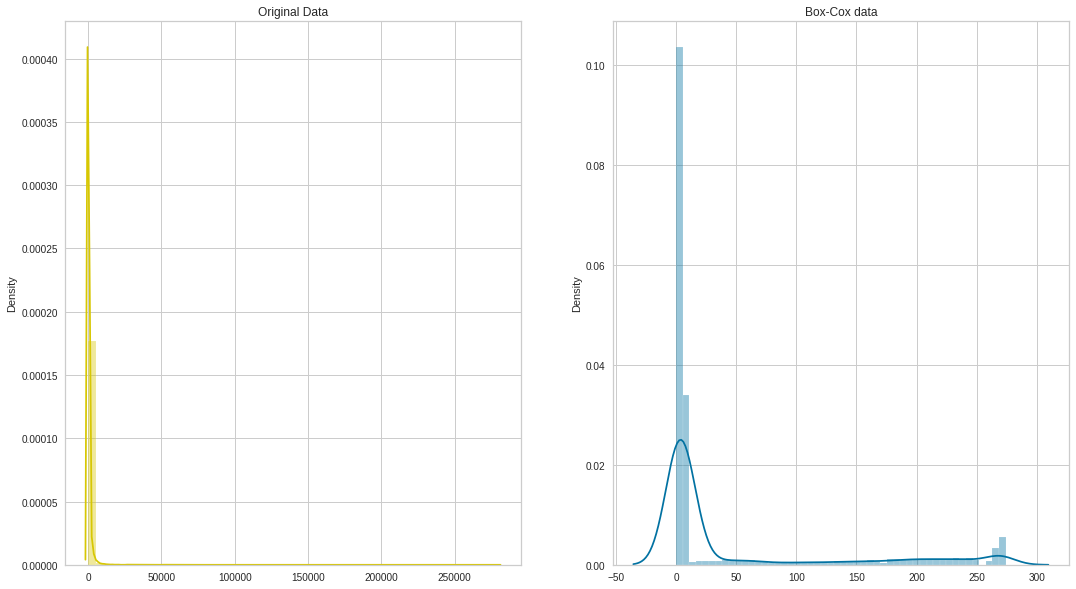

In [84]:
fig, ax=plt.subplots(1,2)
fig.set_size_inches(18,10)
sns.distplot(rfmt_table, ax=ax[0], color='y')
ax[0].set_title("Original Data")
sns.distplot(rfmt_boxcox, ax=ax[1])
ax[1].set_title("Box-Cox data")
plt.show()

scaling ก่อน

In [85]:
scaler = StandardScaler()
scaler.fit(rfmt_boxcox)
rfmt_scaled1 = scaler.transform(rfmt_boxcox) # stored as numpy array

rfmt_scaled_df = pd.DataFrame(data=rfmt_scaled1,
                              index=rfmt_boxcox.index,
                              columns=rfmt_boxcox.columns)

rfmt_scaled_df.agg(['mean','std']).round()

recency  frequency  monetary  tenure
mean    0.000      0.000     0.000   0.000
std     1.000      1.000     1.000   1.000

Text(0.5, 1.0, 'Normalized Tenure')

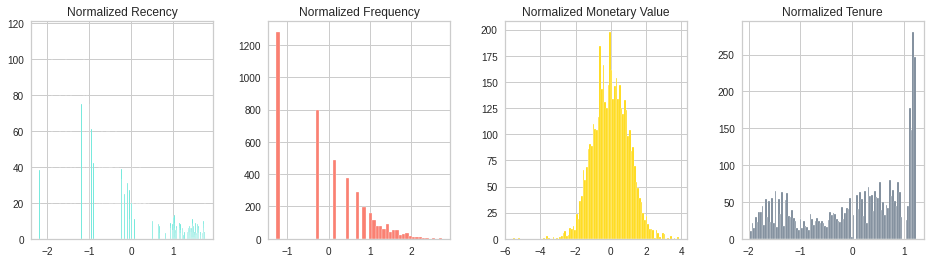

In [86]:
fig, axes = plt.subplots(1, 4, figsize=(16,4))

rfmt_scaled_df.hist('recency', bins=1000, color='turquoise', ax=axes[0])
rfmt_scaled_df.hist('frequency', bins=50, color='salmon', ax=axes[1])
rfmt_scaled_df.hist('monetary', bins=100, color='gold',ax=axes[2])
rfmt_scaled_df.hist('tenure', bins=100, color='slategray',ax=axes[3])

axes[0].set_title('Normalized Recency')
axes[1].set_title('Normalized Frequency')
axes[2].set_title('Normalized Monetary Value')
axes[3].set_title('Normalized Tenure')

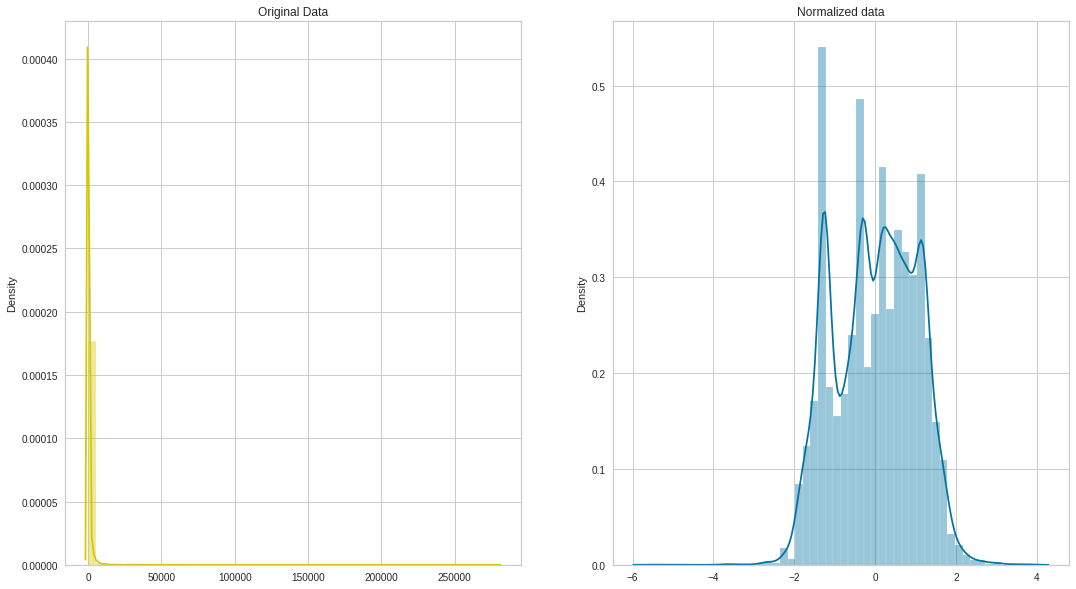

In [87]:
fig, ax=plt.subplots(1,2)
fig.set_size_inches(18,10)
sns.distplot(rfmt_table, ax=ax[0], color='y')
ax[0].set_title("Original Data")
sns.distplot(rfmt_scaled_df, ax=ax[1])
ax[1].set_title("Normalized data")
plt.show()

###RFMT Mean

Text(0.5, 1.0, 'Tenure')

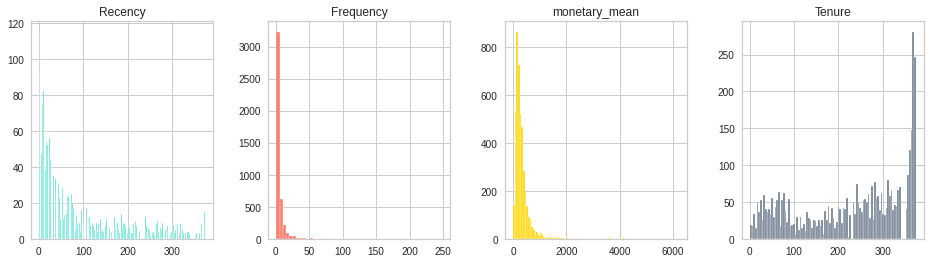

In [88]:
fig, axes = plt.subplots(1, 4, figsize=(16,4))

rfmt_mean_table.hist('recency', bins=500, color='turquoise', ax=axes[0])
rfmt_mean_table.hist('frequency', bins=50, color='salmon', ax=axes[1])
rfmt_mean_table.hist('monetary_mean', bins=100, color='gold',ax=axes[2])
rfmt_mean_table.hist('tenure', bins=100, color='slategray',ax=axes[3])

axes[0].set_title('Recency')
axes[1].set_title('Frequency')
axes[2].set_title('monetary_mean')
axes[3].set_title('Tenure')

In [89]:
pt = preprocessing.PowerTransformer(method='box-cox', standardize=False)
cols = ['recency', 'frequency', 'monetary_mean', 'tenure']
matric2 = pt.fit_transform(rfmt_mean_table[cols])

In [90]:
bc_cols2 = [f'bc_{c}' for c in cols]

In [91]:
rfmt_boxcox2 = rfmt_mean_table.copy().reset_index()
rfmt_boxcox2 = pd.concat([rfmt_boxcox2, pd.DataFrame(matric2, columns= bc_cols2)], axis='columns')
rfmt_boxcox2 = rfmt_boxcox2.set_index('customerid').sort_index(ascending=True)
cols = [0,1,2,3]
rfmt_boxcox2.drop(rfmt_boxcox2.columns[cols],axis=1,inplace=True)
rfmt_boxcox2.rename(columns={'bc_recency': 'recency', 'bc_frequency': 'frequency', 'bc_monetary_mean': 'monetary_mean', 'bc_tenure': 'tenure'}, inplace=True)
rfmt_boxcox2

recency  frequency  monetary_mean  tenure
customerid                                           
12347         1.195      1.443          6.793 269.901
12348         6.123      1.117          6.441 263.685
12349         3.712      0.000          7.976  15.784
12350         9.154      0.000          6.113 230.362
12352         4.808      1.667          5.162 220.584
...             ...        ...            ...     ...
18280         8.888      0.000          5.439 207.268
18281         7.912      0.000          4.566 138.279
18282         2.445      0.924          4.225  98.906
18283         1.543      1.829          5.060 249.143
18287         5.071      0.924          6.787 153.379

[4317 rows x 4 columns]

Text(0.5, 1.0, 'Box Cox Tenure')

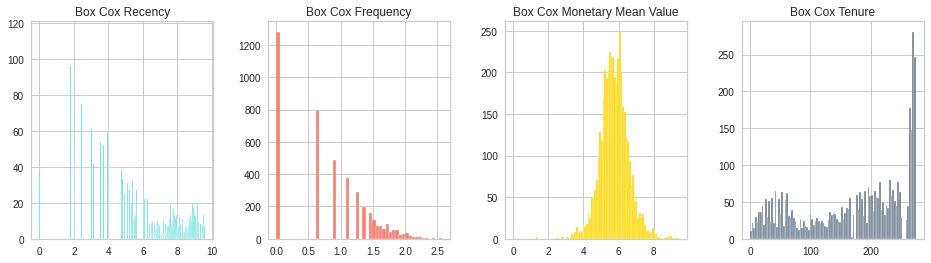

In [92]:
fig, axes = plt.subplots(1, 4, figsize=(16,4))

rfmt_boxcox2.hist('recency', bins=500, color='turquoise', ax=axes[0])
rfmt_boxcox2.hist('frequency', bins=50, color='salmon', ax=axes[1])
rfmt_boxcox2.hist('monetary_mean', bins=100, color='gold',ax=axes[2])
rfmt_boxcox2.hist('tenure', bins=100, color='slategray',ax=axes[3])

axes[0].set_title('Box Cox Recency')
axes[1].set_title('Box Cox Frequency')
axes[2].set_title('Box Cox Monetary Mean Value')
axes[3].set_title('Box Cox Tenure')
# *จะสังเกตได้ว่าค่าใน box-cox ของเราจะเบ้น้อยลง

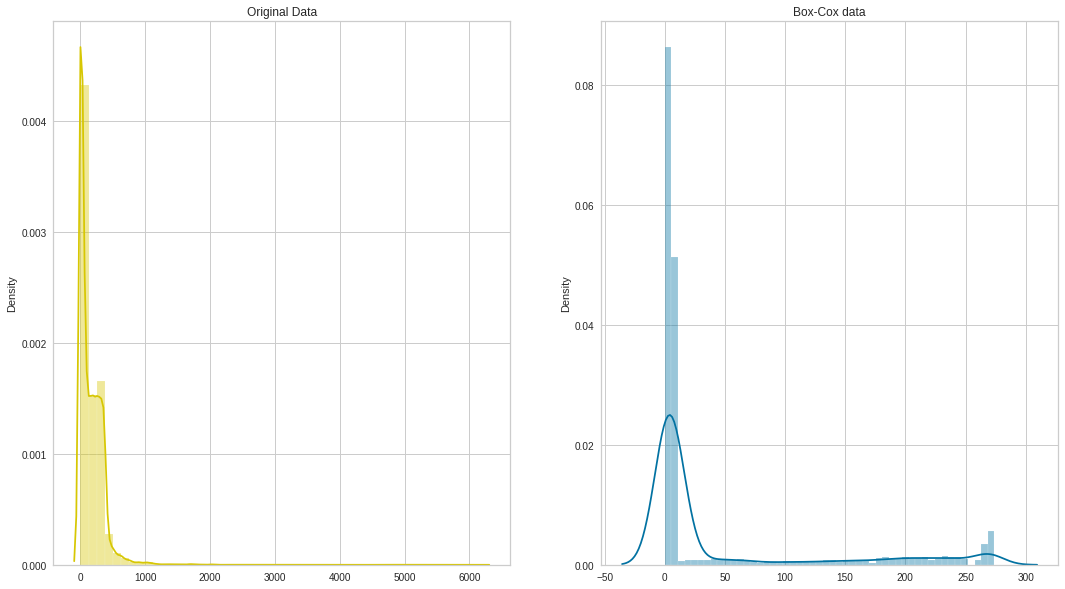

In [93]:
fig, ax=plt.subplots(1,2)
fig.set_size_inches(18,10)
sns.distplot(rfmt_mean_table, ax=ax[0], color='y')
ax[0].set_title("Original Data")
sns.distplot(rfmt_boxcox2, ax=ax[1])
ax[1].set_title("Box-Cox data")
plt.show()

In [94]:
scaler = StandardScaler()
scaler.fit(rfmt_boxcox2)
rfmt_scaled2 = scaler.transform(rfmt_boxcox2) # stored as numpy array

rfmt_scaled_df2 = pd.DataFrame(data=rfmt_scaled2,
                              index=rfmt_boxcox2.index,
                              columns=rfmt_boxcox2.columns)

rfmt_scaled_df2.agg(['mean','std']).round()

recency  frequency  monetary_mean  tenure
mean    0.000      0.000         -0.000   0.000
std     1.000      1.000          1.000   1.000

Text(0.5, 1.0, 'Normalized Tenure')

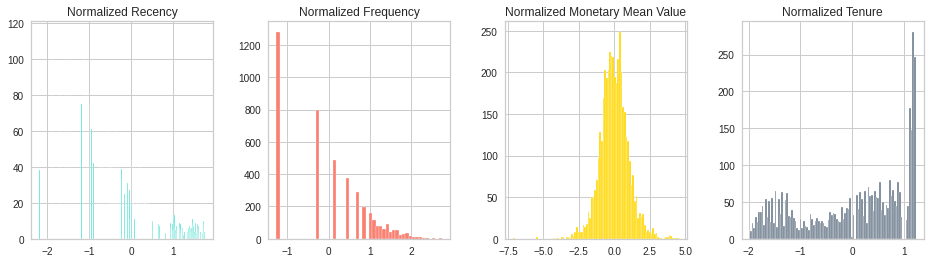

In [95]:
fig, axes = plt.subplots(1, 4, figsize=(16,4))

rfmt_scaled_df2.hist('recency', bins=1000, color='turquoise', ax=axes[0])
rfmt_scaled_df2.hist('frequency', bins=50, color='salmon', ax=axes[1])
rfmt_scaled_df2.hist('monetary_mean', bins=100, color='gold',ax=axes[2])
rfmt_scaled_df2.hist('tenure', bins=100, color='slategray',ax=axes[3])

axes[0].set_title('Normalized Recency')
axes[1].set_title('Normalized Frequency')
axes[2].set_title('Normalized Monetary Mean Value')
axes[3].set_title('Normalized Tenure')

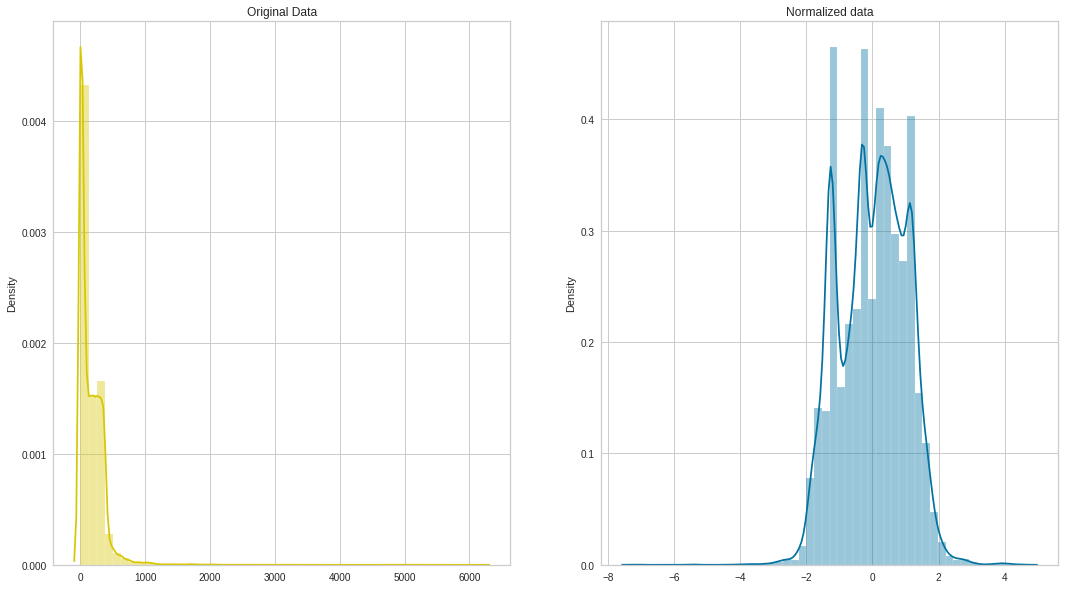

In [96]:
fig, ax=plt.subplots(1,2)
fig.set_size_inches(18,10)

sns.distplot(rfmt_mean_table, ax=ax[0], color='y')
ax[0].set_title("Original Data")

sns.distplot(rfmt_scaled_df2, ax=ax[1])
ax[1].set_title("Normalized data")

plt.show()

##Normalized

### RFMT

Text(0.5, 1.0, 'Tenure')

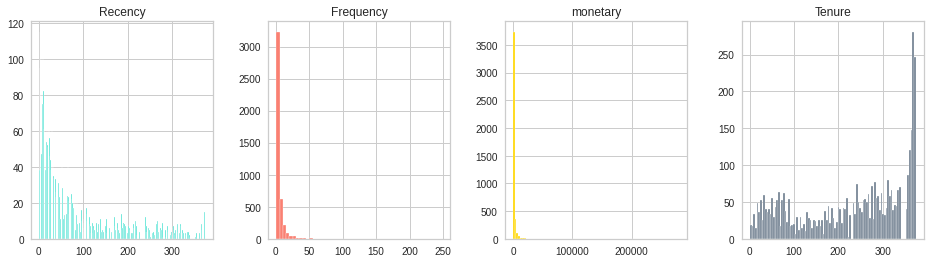

In [97]:
fig, axes = plt.subplots(1, 4, figsize=(16,4))

rfmt_table.hist('recency', bins=500, color='turquoise', ax=axes[0])
rfmt_table.hist('frequency', bins=50, color='salmon', ax=axes[1])
rfmt_table.hist('monetary', bins=100, color='gold',ax=axes[2])
rfmt_table.hist('tenure', bins=100, color='slategray',ax=axes[3])

axes[0].set_title('Recency')
axes[1].set_title('Frequency')
axes[2].set_title('monetary')
axes[3].set_title('Tenure')

*จะสังเกตจากกราฟด้านบนได้ว่าตัวแปร RFMT ของเรามีความแบ้

In [98]:
from sklearn import preprocessing
pt = preprocessing.PowerTransformer(method='box-cox', standardize=True)
cols = ['recency', 'frequency', 'monetary', 'tenure']
matric1 = pt.fit_transform(rfmt_table[cols])
matric1[:5]

array([[-1.69403668,  0.98483854,  1.40676129,  1.18377439],
       [ 0.3326016 ,  0.47549921,  0.77542652,  1.11102287],
       [-0.65914761, -1.26627328,  0.75898922, -1.79053441],
       [ 1.57877097, -1.26627328, -0.57709976,  0.72099909],
       [-0.20832237,  1.33384319,  0.66162197,  0.6065524 ]])

In [99]:
bc_cols = [f'bc_{c}' for c in cols]

In [100]:
rfmt_boxcox = rfmt_table.copy().reset_index()
rfmt_boxcox = pd.concat([rfmt_boxcox, pd.DataFrame(matric1, columns= bc_cols)], axis='columns')
rfmt_boxcox = rfmt_boxcox.set_index('customerid').sort_index(ascending=True)

cols = [0,1,2,3]
rfmt_boxcox.drop(rfmt_boxcox.columns[cols],axis=1,inplace=True)
rfmt_boxcox.rename(columns={'bc_recency': 'recency', 'bc_frequency': 'frequency', 'bc_monetary': 'monetary', 'bc_tenure': 'tenure'}, inplace=True)
rfmt_boxcox

recency  frequency  monetary  tenure
customerid                                      
12347        -1.694      0.985     1.407   1.184
12348         0.333      0.475     0.775   1.111
12349        -0.659     -1.266     0.759  -1.791
12350         1.579     -1.266    -0.577   0.721
12352        -0.208      1.334     0.662   0.607
...             ...        ...       ...     ...
18280         1.470     -1.266    -1.119   0.451
18281         1.068     -1.266    -1.873  -0.357
18282        -1.180      0.175    -1.139  -0.818
18283        -1.551      1.587     0.872   0.941
18287        -0.100      0.175     0.792  -0.180

[4317 rows x 4 columns]

Text(0.5, 1.0, 'Box Cox Tenure')

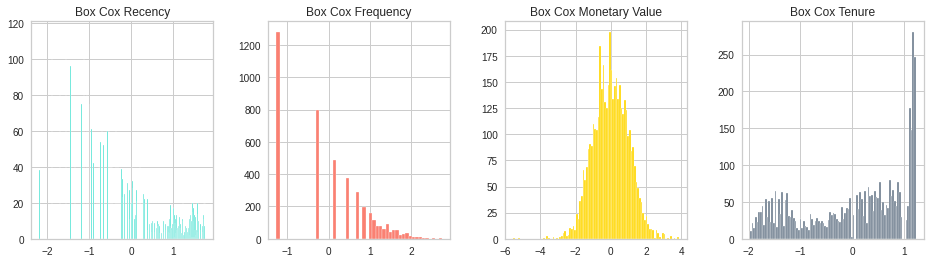

In [101]:
fig, axes = plt.subplots(1, 4, figsize=(16,4))

rfmt_boxcox.hist('recency', bins=500, color='turquoise', ax=axes[0])
rfmt_boxcox.hist('frequency', bins=50, color='salmon', ax=axes[1])
rfmt_boxcox.hist('monetary', bins=100, color='gold',ax=axes[2])
rfmt_boxcox.hist('tenure', bins=100, color='slategray',ax=axes[3])

axes[0].set_title('Box Cox Recency')
axes[1].set_title('Box Cox Frequency')
axes[2].set_title('Box Cox Monetary Value')
axes[3].set_title('Box Cox Tenure')
# *จะสังเกตได้ว่าค่าใน box-cox ของเราจะเบ้น้อยลง

Text(0.5, 1.0, 'Frequency Normalized data')

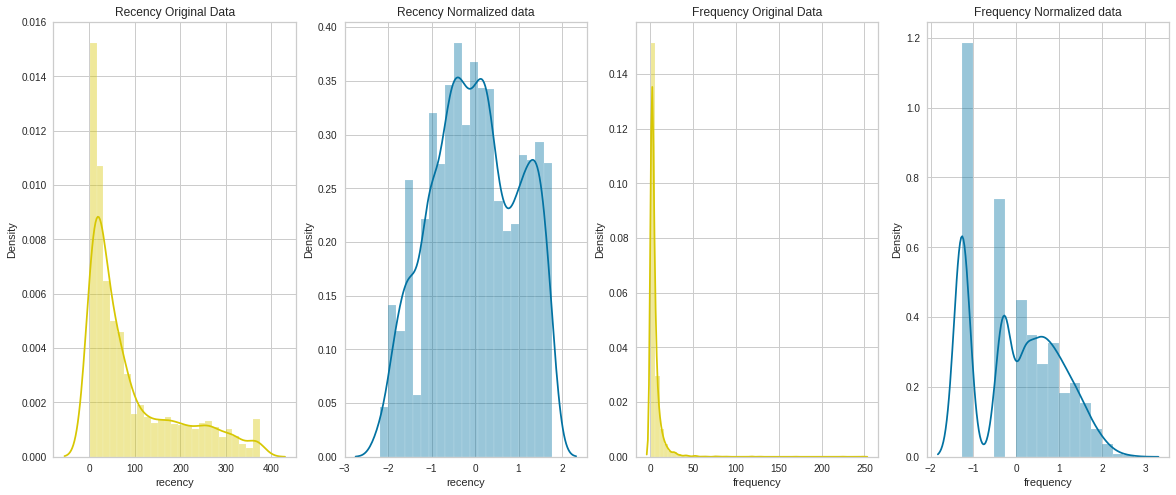

In [102]:
fig, ax=plt.subplots(1,4)
fig.set_size_inches(20,8)

sns.distplot(rfmt_table['recency'], ax=ax[0], color='y')
ax[0].set_title("Recency Original Data")

sns.distplot(rfmt_boxcox['recency'], ax=ax[1])
ax[1].set_title("Recency Normalized data")

sns.distplot(rfmt_table['frequency'], ax=ax[2], color='y')
ax[2].set_title("Frequency Original Data")

sns.distplot(rfmt_boxcox['frequency'], ax=ax[3])
ax[3].set_title("Frequency Normalized data")

Text(0.5, 1.0, 'Tenure Normalized data')

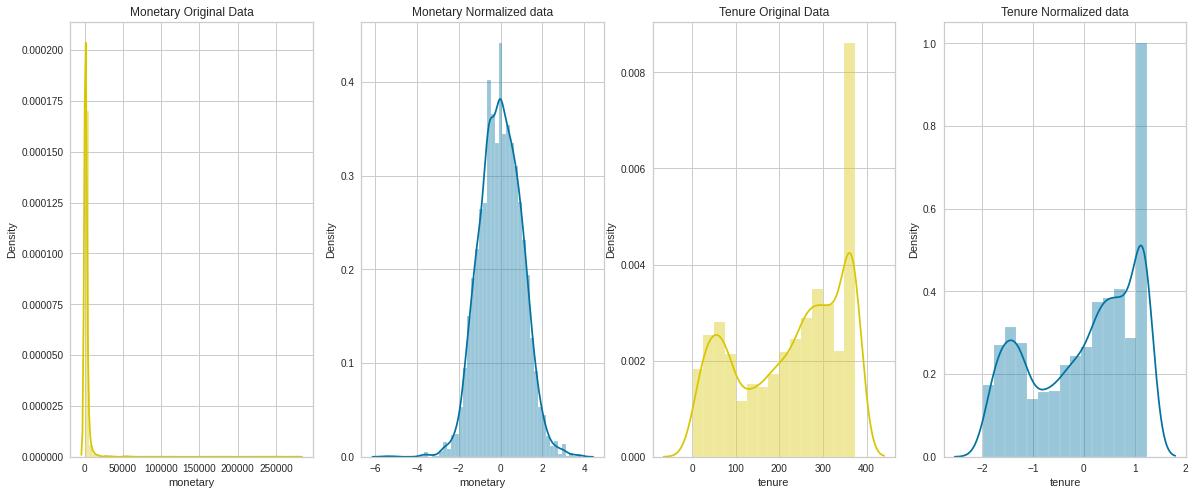

In [103]:
fig, ax=plt.subplots(1,4)
fig.set_size_inches(20,8)

sns.distplot(rfmt_table['monetary'], ax=ax[0], color='y')
ax[0].set_title("Monetary Original Data")

sns.distplot(rfmt_boxcox['monetary'], ax=ax[1])
ax[1].set_title("Monetary Normalized data")

sns.distplot(rfmt_table['tenure'], ax=ax[2], color='y')
ax[2].set_title("Tenure Original Data")

sns.distplot(rfmt_boxcox['tenure'], ax=ax[3])
ax[3].set_title("Tenure Normalized data")

###RFMT Mean

Text(0.5, 1.0, 'Tenure')

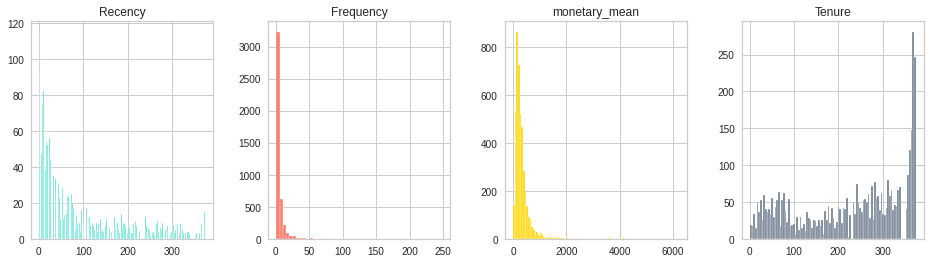

In [104]:
fig, axes = plt.subplots(1, 4, figsize=(16,4))

rfmt_mean_table.hist('recency', bins=500, color='turquoise', ax=axes[0])
rfmt_mean_table.hist('frequency', bins=50, color='salmon', ax=axes[1])
rfmt_mean_table.hist('monetary_mean', bins=100, color='gold',ax=axes[2])
rfmt_mean_table.hist('tenure', bins=100, color='slategray',ax=axes[3])

axes[0].set_title('Recency')
axes[1].set_title('Frequency')
axes[2].set_title('monetary_mean')
axes[3].set_title('Tenure')

In [105]:
pt = preprocessing.PowerTransformer(method='box-cox', standardize=True)
cols = ['recency', 'frequency', 'monetary_mean', 'tenure']
matric2 = pt.fit_transform(rfmt_mean_table[cols])

In [106]:
bc_cols2 = [f'bc_{c}' for c in cols]

In [107]:
rfmt_boxcox2 = rfmt_mean_table.copy().reset_index()
rfmt_boxcox2 = pd.concat([rfmt_boxcox2, pd.DataFrame(matric2, columns= bc_cols2)], axis='columns')
rfmt_boxcox2 = rfmt_boxcox2.set_index('customerid').sort_index(ascending=True)
cols = [0,1,2,3]
rfmt_boxcox2.drop(rfmt_boxcox2.columns[cols],axis=1,inplace=True)
rfmt_boxcox2.rename(columns={'bc_recency': 'recency', 'bc_frequency': 'frequency', 'bc_monetary_mean': 'monetary_mean', 'bc_tenure': 'tenure'}, inplace=True)

Text(0.5, 1.0, 'Box Cox Tenure')

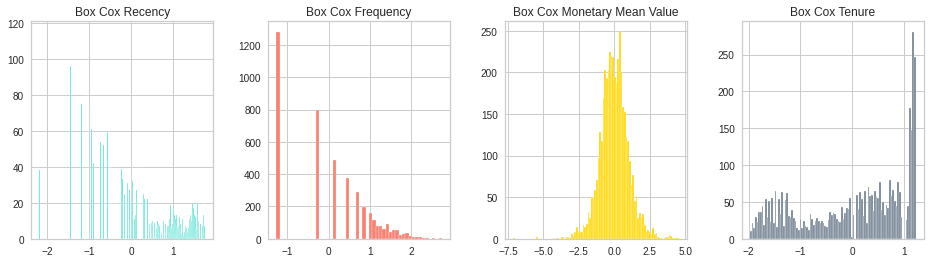

In [108]:
fig, axes = plt.subplots(1, 4, figsize=(16,4))

rfmt_boxcox2.hist('recency', bins=500, color='turquoise', ax=axes[0])
rfmt_boxcox2.hist('frequency', bins=50, color='salmon', ax=axes[1])
rfmt_boxcox2.hist('monetary_mean', bins=100, color='gold',ax=axes[2])
rfmt_boxcox2.hist('tenure', bins=100, color='slategray',ax=axes[3])

axes[0].set_title('Box Cox Recency')
axes[1].set_title('Box Cox Frequency')
axes[2].set_title('Box Cox Monetary Mean Value')
axes[3].set_title('Box Cox Tenure')
# *จะสังเกตได้ว่าค่าใน box-cox ของเราจะเบ้น้อยลง

Text(0.5, 1.0, 'Tenure Normalized data')

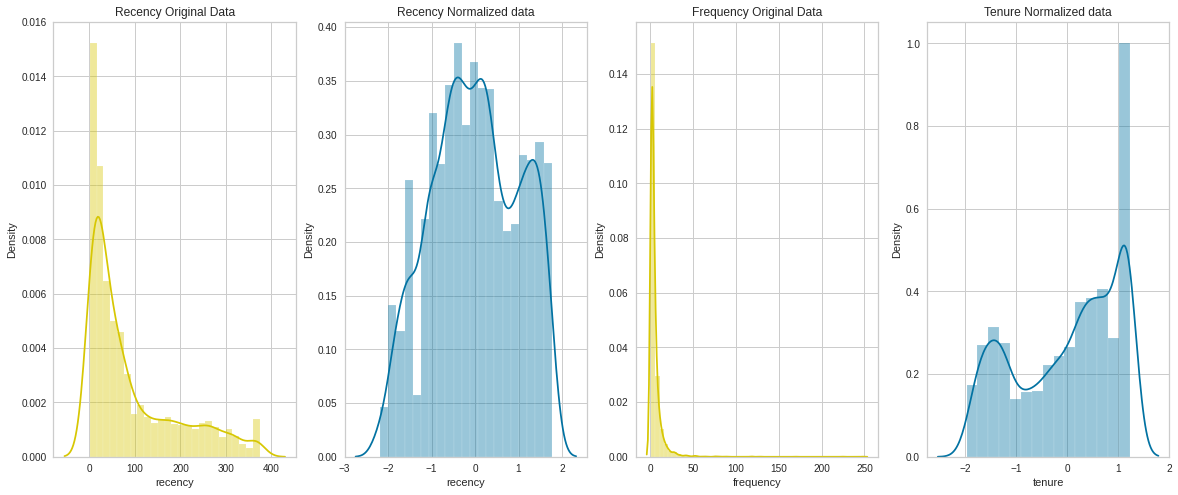

In [109]:
fig, ax=plt.subplots(1,4)
fig.set_size_inches(20,8)

sns.distplot(rfmt_mean_table['recency'], ax=ax[0], color='y')
ax[0].set_title("Recency Original Data")

sns.distplot(rfmt_boxcox2['recency'], ax=ax[1])
ax[1].set_title("Recency Normalized data")

sns.distplot(rfmt_mean_table['frequency'], ax=ax[2], color='y')
ax[2].set_title("Frequency Original Data")

sns.distplot(rfmt_boxcox2['tenure'], ax=ax[3])
ax[3].set_title("Tenure Normalized data")

Text(0.5, 1.0, 'tenure Normalized data')

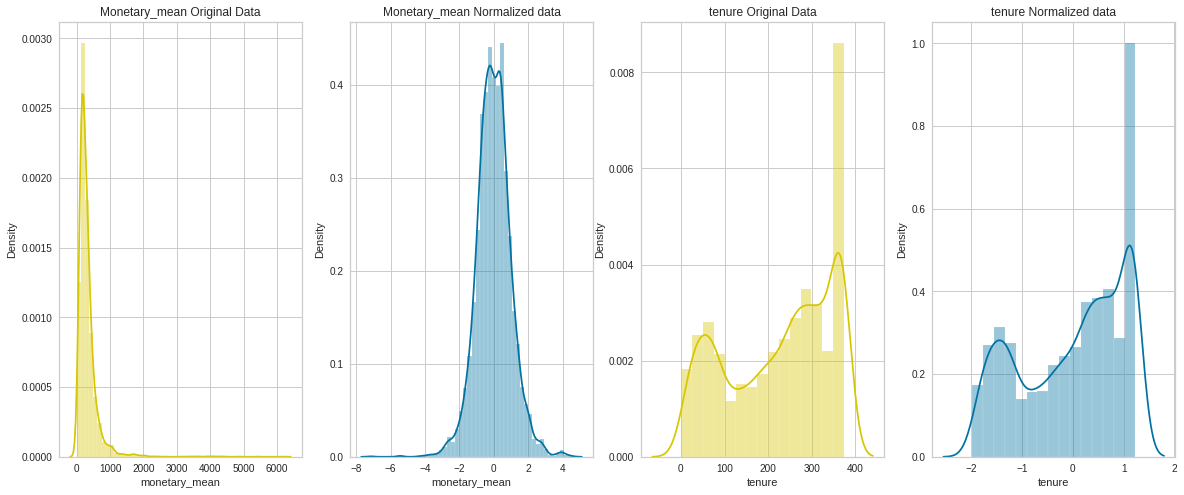

In [110]:
fig, ax=plt.subplots(1,4)
fig.set_size_inches(20,8)

sns.distplot(rfmt_mean_table['monetary_mean'], ax=ax[0], color='y')
ax[0].set_title("Monetary_mean Original Data")

sns.distplot(rfmt_boxcox2['monetary_mean'], ax=ax[1])
ax[1].set_title("Monetary_mean Normalized data")

sns.distplot(rfmt_mean_table['tenure'], ax=ax[2], color='y')
ax[2].set_title("tenure Original Data")

sns.distplot(rfmt_boxcox2['tenure'], ax=ax[3])
ax[3].set_title("tenure Normalized data")

# Modeling


```
Objective: KMeans Model
```



**Kmean**

In [111]:
SEED = 4
COLUMNS=['recency', 'frequency', 'monetary', 'tenure']

In [112]:
SEED2 = 4
COLUMNS2=['recency', 'frequency', 'monetary_mean', 'tenure']

##Box-Cox Elbow RFMT

In [113]:
wssbc = []
silbc = []
# For possible 'k' values 2-10
k = range(2, 11)
for n in k:
    # initialize clustering model
    algorithm = (KMeans(n_clusters = n,random_state=SEED) )
    algorithm.fit(rfmt_boxcox[['recency', 'frequency', 'monetary', 'tenure']])
    labels = algorithm.labels_
    
    # rfmt_pipe1[f'box_k_{n}']=labels
    rfmt_boxcox[f'box_k_{n}']=labels
    rfmt_table[f'box_k_{n}']=labels
    # store Weight of sum of squared distance & silhouette score
    wssbc.append(algorithm.inertia_)
    silbc.append(silhouette_score(rfmt_boxcox, labels, metric = 'euclidean'))

##Box-Cox Elbow RFMT Mean

In [114]:
wssbc2 = []
silbc2 = []
# For possible 'k' values 2-10
k = range(2, 11)
for n in k:
    # initialize clustering model
    algorithm = (KMeans(n_clusters = n,random_state=SEED2) )
    algorithm.fit(rfmt_boxcox2[['recency', 'frequency', 'monetary_mean', 'tenure']])
    labels = algorithm.labels_
    rfmt_segment_mean_table[f'box_k_{n}']=labels
    # rfmt_pipe1[f'box_k_{n}']=labels
    rfmt_boxcox2[f'box_k_{n}']=labels
    rfmt_mean_table[f'box_k_{n}']=labels
    # store Weight of sum of squared distance & silhouette score
    wssbc2.append(algorithm.inertia_)
    silbc2.append(silhouette_score(rfmt_boxcox2, labels, metric = 'euclidean'))

#Evaluate Elbow & Siloulette Score


```
Objective: 

* จุดตัดของกลุ่ม custer
* คะแนนในแต่ละช่วงของกลุ่ม custer
* กลุ่ม custer ที่เหมาะจะนำมา Interpretation และ Visualizing Clusters
```



##Box-Cox RFMT

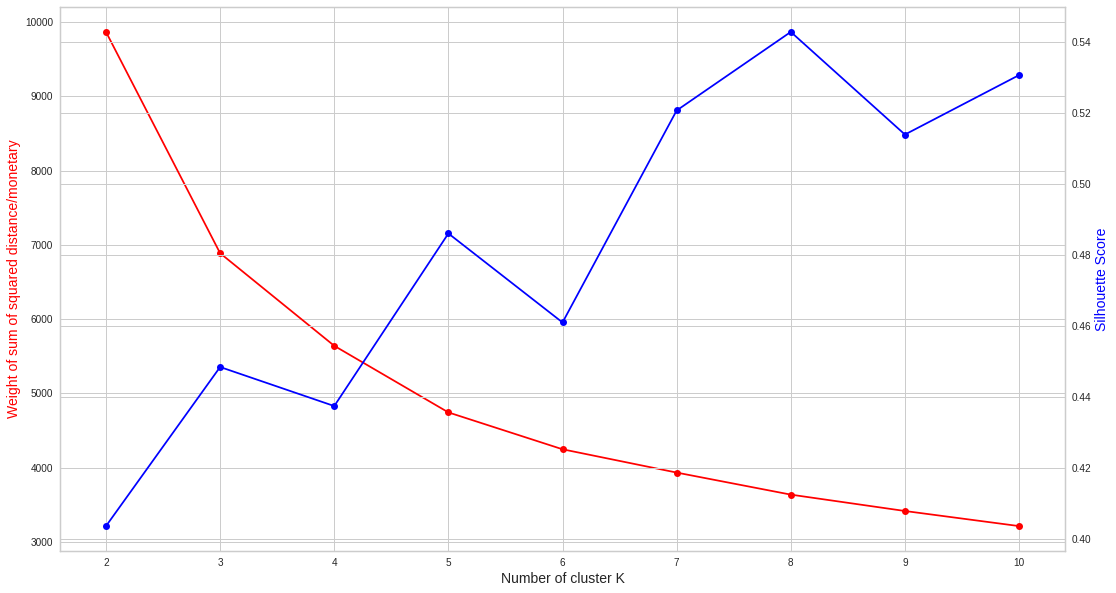

In [115]:
fig,ax = plt.subplots()
fig.set_size_inches(18,10)
ax.plot(k, wssbc, color="red", marker="o")
ax.set_xlabel("Number of cluster K",fontsize=14)
ax.set_ylabel("Weight of sum of squared distance/monetary",color="red",fontsize=14)

ax2=ax.twinx()
ax2.plot(k, silbc,color="blue",marker="o")
ax2.set_ylabel("Silhouette Score",color="blue",fontsize=14)

# plt.axvline(3, lw=4, linestyle='--')
plt.show()

##Box-Cox RFMT Mean

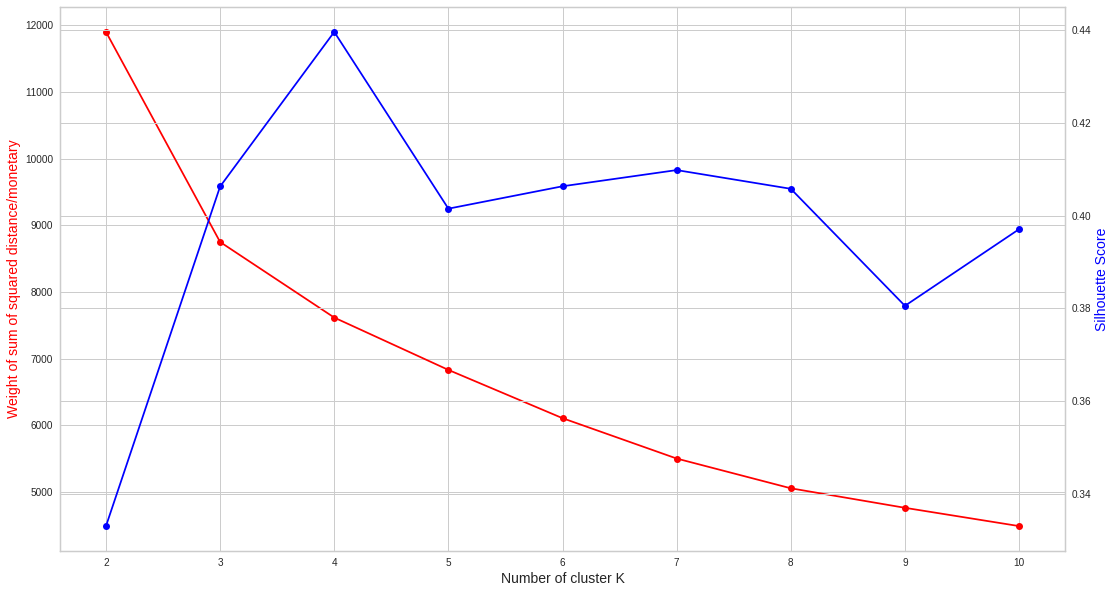

In [116]:
fig,ax = plt.subplots()
fig.set_size_inches(18,10)
ax.plot(k, wssbc2, color="red", marker="o")
ax.set_xlabel("Number of cluster K",fontsize=14)
ax.set_ylabel("Weight of sum of squared distance/monetary",color="red",fontsize=14)

ax2=ax.twinx()
ax2.plot(k, silbc2,color="blue",marker="o")
ax2.set_ylabel("Silhouette Score",color="blue",fontsize=14)

# plt.axvline(3, lw=4, linestyle='--')
plt.show()

#Interpretation
จะทำการนำข้อมูล custer k ที่เราเลือกจากช่วง evaluate มา plot โดยใช้ตัว Violin Plot ในการแยกข้อมูลของกลุ่ม custer เพื่อให้เห็นความแตกต่างของข้อมูลในแต่ละกลุ่ม custer ที่มีผลต่อข้อมูล

In [117]:
#Install UMAP
!pip3 install umap-learn -q
!pip3 install umap-learn[plot] -q

     |████████████████████████████████| 86 kB 3.2 MB/s 
     |████████████████████████████████| 1.1 MB 42.2 MB/s 
     |████████████████████████████████| 15.8 MB 4.8 MB/s 
     |████████████████████████████████| 76 kB 4.9 MB/s 
     |████████████████████████████████| 133 kB 53.7 MB/s 
     |████████████████████████████████| 802 kB 54.3 MB/s 
     |████████████████████████████████| 802 kB 68.5 MB/s 
     |████████████████████████████████| 793 kB 65.9 MB/s 
     |████████████████████████████████| 793 kB 56.4 MB/s 
     |████████████████████████████████| 791 kB 57.2 MB/s 
     |████████████████████████████████| 786 kB 57.5 MB/s 
     |████████████████████████████████| 779 kB 46.7 MB/s 
     |████████████████████████████████| 778 kB 67.2 MB/s 
     |████████████████████████████████| 776 kB 56.9 MB/s 
     |████████████████████████████████| 769 kB 50.5 MB/s 
     |████████████████████████████████| 766 kB 49.3 MB/s 
     |████████████████████████████████| 1.0 MB 52.3 MB/s 
     |████████████

In [118]:
import umap

In [119]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [120]:
#Color Mapping
def color_change_2d(data,col,k):
  if k==10:
    map = {0:'#E3868F',1:'#F69256',2:'#EAD98B',3:'#965251',4:'#C6CCCC',5:'#9DC6D8',6:'#00B2CA',7:'#7DCFB6',8:'#1D4E89',9:'#D2B29B'}
  elif k==9:
    map = {0:'#E3868F',1:'#F69256',2:'#EAD98B',3:'#965251',4:'#C6CCCC',5:'#9DC6D8',6:'#00B2CA',7:'#7DCFB6',8:'#1D4E89'}
  elif k==8:
    map = {0:'#E3868F',1:'#F69256',2:'#EAD98B',3:'#965251',4:'#C6CCCC',5:'#9DC6D8',6:'#00B2CA',7:'#7DCFB6'}
  elif k==7:
    map = {0:'#E3868F',1:'#F69256',2:'#EAD98B',3:'#965251',4:'#C6CCCC',5:'#9DC6D8',6:'#00B2CA'}
  elif k==6:
    map = {0:'#E3868F',1:'#F69256',2:'#EAD98B',3:'#965251',4:'#C6CCCC',5:'#9DC6D8'}
  elif k==5:
    map = {0:'#E3868F',1:'#F69256',2:'#EAD98B',3:'#965251',4:'#C6CCCC'}
  elif k==4:
    map = {0:'#E3868F',1:'#F69256',2:'#EAD98B',3:'#965251'}
  elif k==3:
    map = {0:'#E3868F',1:'#F69256',2:'#EAD98B'}
  return data[col].map(map)

###RFMT

####K=10

In [121]:
model = KMeans(n_clusters=10,random_state=SEED)
model.fit(rfmt_boxcox)
model.cluster_centers_.round(4)

array([[-1.2350e+00,  1.6460e+00,  1.7173e+00,  1.0266e+00,  9.9460e-01,
         1.0700e-02,  2.9946e+00,  5.4000e-03,  2.0107e+00,  2.0054e+00,
         4.0080e+00,  6.9946e+00,  1.9893e+00],
       [ 1.1348e+00, -1.0830e+00, -1.5749e+00, -1.5650e-01,  0.0000e+00,
         1.9894e+00,  1.9894e+00,  1.0423e+00,  3.9841e+00,  4.0212e+00,
         6.9788e+00,  1.9788e+00,  6.0476e+00],
       [ 1.1087e+00,  2.8700e-02, -2.1250e-01,  5.8820e-01,  2.0170e-01,
         2.0000e+00,  1.4816e+00,  2.1323e+00,  1.1497e+00,  1.1171e+00,
         5.0759e+00,  7.9913e+00,  8.9262e+00],
       [ 1.1360e-01,  8.6630e-01,  8.5300e-01,  7.1160e-01,  1.0000e+00,
         3.7000e-03,  1.5234e+00,  2.2187e+00,  9.1600e-02,  5.8336e+00,
         1.1271e+00,  1.0561e+00,  6.9570e+00],
       [ 1.5025e+00, -1.1973e+00, -9.0950e-01,  6.2830e-01,  2.3000e-03,
         1.9883e+00,  1.9836e+00,  1.0117e+00,  3.9883e+00,  4.0117e+00,
         6.9533e+00,  2.0864e+00,  1.1700e-02],
       [-8.9460e-01,  2.6600e-

In [122]:
rfmt_table.groupby('box_k_10')[COLUMNS].mean()

recency  frequency  monetary  tenure
box_k_10                                      
0         297.063      1.058   298.531 300.026
1          45.179      2.991   598.866 269.673
2          10.030     23.601 12181.181 349.102
3          17.216      3.816  1233.824  94.051
4          10.985      7.261  1774.417 305.357
5          80.802      1.346   660.459  90.666
6         171.200      1.251   153.329 178.132
7          68.367      6.732  2342.369 309.536
8          31.928      1.212   219.559  37.132
9         200.589      2.864   626.325 298.123

In [123]:
rfmt_boxcox.groupby('box_k_10')[COLUMNS].mean()

recency  frequency  monetary  tenure
box_k_10                                      
0           1.522     -1.210    -0.885   0.629
1          -0.175      0.088    -0.208   0.378
2          -1.250      1.662     1.724   1.030
3          -0.922      0.297     0.286  -1.112
4          -1.116      0.922     0.663   0.672
5           0.312     -0.942    -0.180  -1.139
6           0.980     -1.052    -1.442  -0.385
7           0.141      0.845     0.839   0.707
8          -0.451     -1.070    -1.096  -1.623
9           1.116      0.027    -0.198   0.613

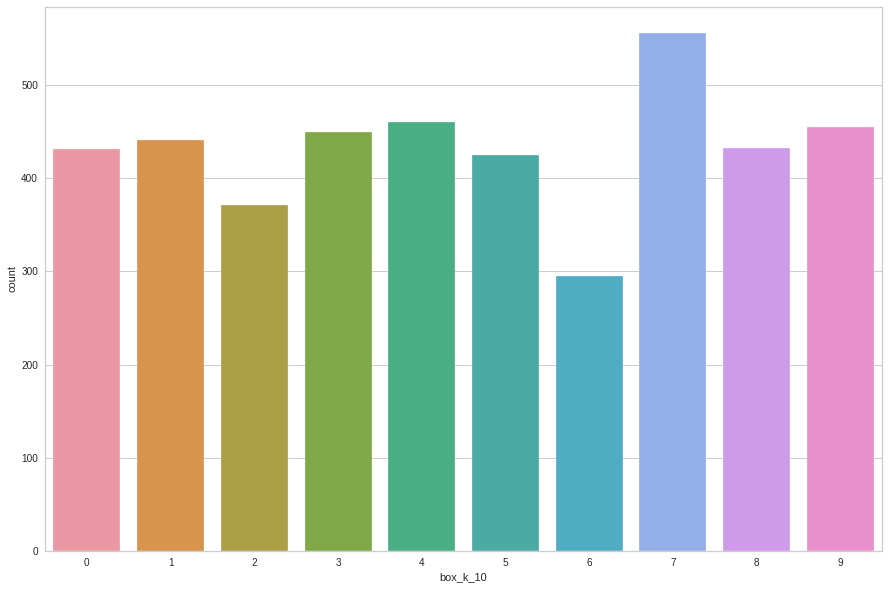

In [124]:
fig = plt.figure(figsize=(15,10))
sns.countplot(x='box_k_10', data=rfmt_boxcox);

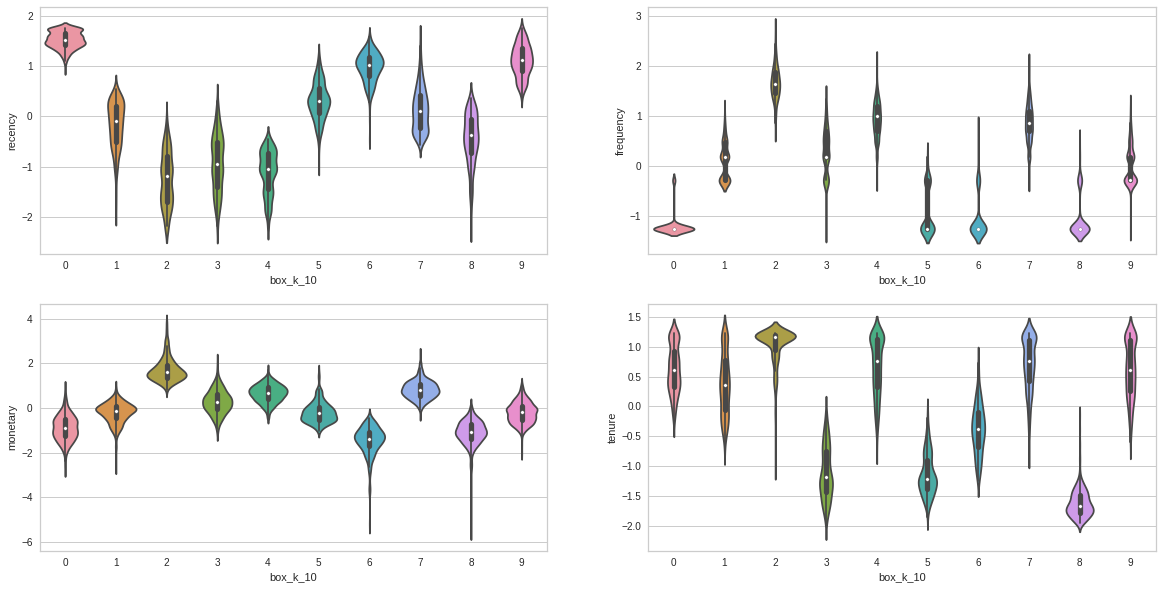

In [125]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
ax = ax.ravel()
for pos, col in enumerate(COLUMNS):
  # use violinplot to see each cluster's variable is distrubuted
  sns.violinplot(x='box_k_10', y=col, data=rfmt_boxcox, ax=ax[pos])

In [126]:
features = rfmt_boxcox[COLUMNS]
umap_2d = umap.UMAP(n_components=2, init='random', random_state=SEED)
proj_2d = umap_2d.fit_transform(features)

In [127]:
fig = go.Figure(data=go.Scatter(x=proj_2d[:,0], y=proj_2d[:,1],
                 mode="markers",
                 marker=dict(color=color_change_2d(rfmt_boxcox,'box_k_10',10),size=5,showscale=False)))
fig.update_layout(height=500, title_text="Visualizing 2D Clusters K=10", showlegend=False)
fig.show(renderer="colab")

####K=9

In [128]:
model = KMeans(n_clusters=9,random_state=SEED)
model.fit(rfmt_boxcox)
model.cluster_centers_.round(4)

array([[-1.9180e-01,  1.8370e-01, -1.0860e-01,  5.1290e-01,  6.4000e-01,
         7.7780e-01,  1.0667e+00,  2.9822e+00,  5.3560e-01,  5.5780e-01,
         3.7867e+00,  4.1756e+00,  1.6356e+00],
       [ 4.2130e-01, -9.8190e-01, -3.2740e-01, -1.0477e+00,  2.1000e-03,
         1.1908e+00,  4.3610e-01,  2.0084e+00,  3.0189e+00,  4.3669e+00,
         2.1488e+00,  5.9602e+00,  5.1426e+00],
       [ 1.1310e+00, -1.0788e+00, -1.5734e+00, -1.5640e-01,  0.0000e+00,
         1.9895e+00,  1.9895e+00,  1.0421e+00,  3.9684e+00,  4.0053e+00,
         6.9684e+00,  1.9895e+00,  6.0474e+00],
       [-1.2442e+00,  1.3631e+00,  1.2780e+00,  9.0800e-01,  1.0000e+00,
         0.0000e+00,  2.9941e+00,  0.0000e+00,  1.6613e+00,  1.6171e+00,
         3.7806e+00,  6.0869e+00,  2.9072e+00],
       [-8.9460e-01,  2.6600e-01,  2.2430e-01, -9.4680e-01,  6.0600e-01,
         6.2720e-01,  8.4810e-01,  3.9823e+00,  4.9929e+00,  2.5866e+00,
         4.1700e-01,  3.2456e+00,  2.8940e+00],
       [ 5.5900e-02,  8.8760e-

In [129]:
rfmt_table.groupby('box_k_9')[COLUMNS].mean()

recency  frequency  monetary  tenure
box_k_9                                      
0         35.004      1.202   221.397  40.283
1         69.226      6.674  2325.821 309.600
2        267.357      1.100   230.049 271.054
3         18.105      3.763  1227.797  91.255
4         43.214      3.009   585.624 266.269
5         11.136      7.287  1794.991 305.774
6         91.966      1.298   585.038 100.150
7         10.032     23.649 12206.078 349.065
8        198.634      2.817   633.376 295.651

In [130]:
rfmt_boxcox.groupby('box_k_9')[COLUMNS].mean()

recency  frequency  monetary  tenure
box_k_9                                      
0         -0.397     -1.080    -1.122  -1.594
1          0.150      0.836     0.833   0.707
2          1.407     -1.172    -1.116   0.390
3         -0.897      0.279     0.285  -1.137
4         -0.213      0.095    -0.230   0.350
5         -1.109      0.925     0.672   0.675
6          0.422     -0.985    -0.324  -1.056
7         -1.250      1.664     1.725   1.029
8          1.102     -0.002    -0.191   0.592

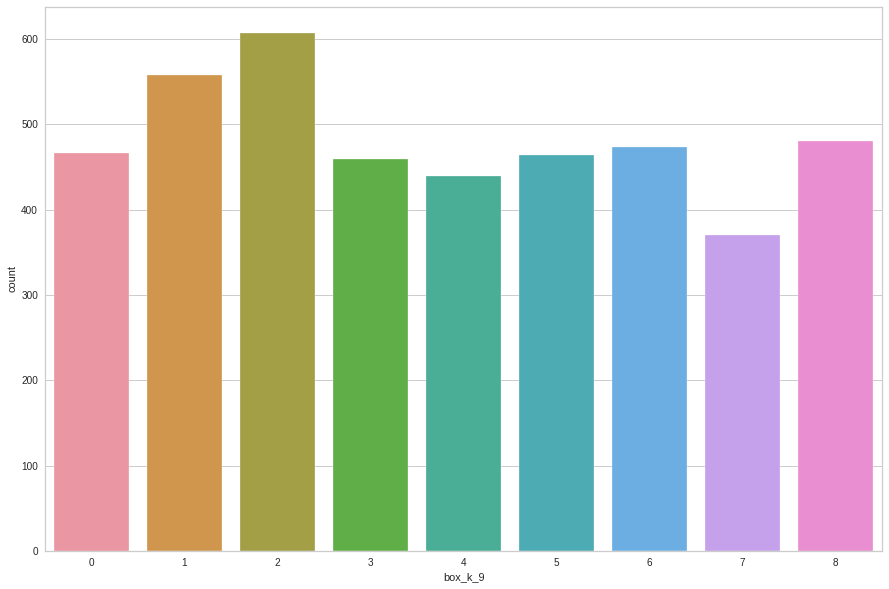

In [131]:
fig = plt.figure(figsize=(15,10))
sns.countplot(x='box_k_9', data=rfmt_boxcox);

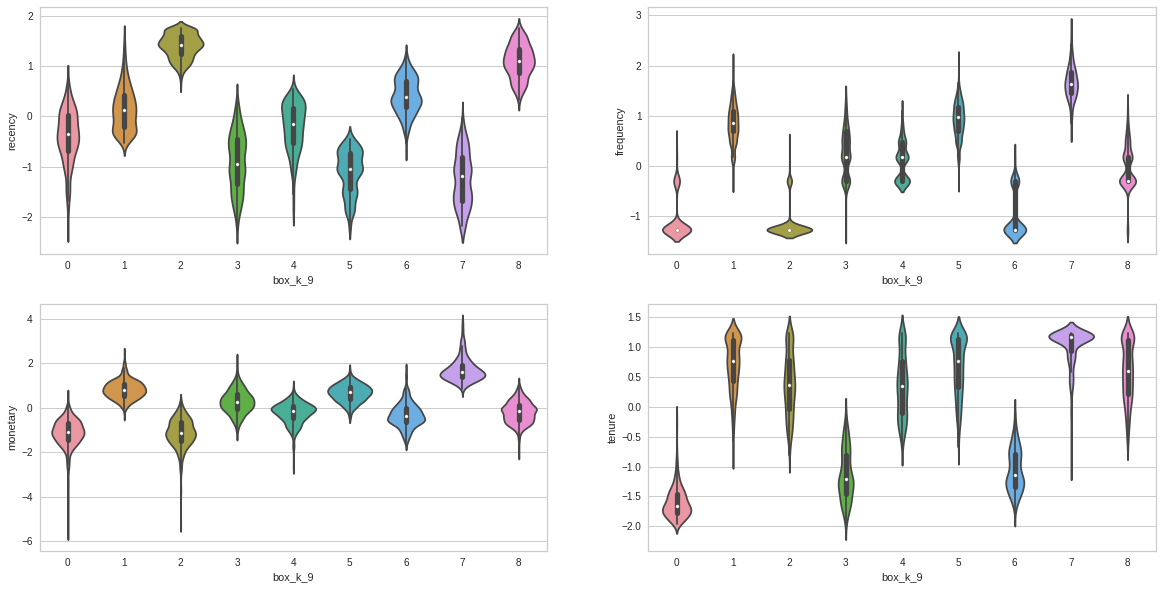

In [132]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
ax = ax.ravel()
for pos, col in enumerate(COLUMNS):
  # use violinplot to see each cluster's variable is distrubuted
  sns.violinplot(x='box_k_9', y=col, data=rfmt_boxcox, ax=ax[pos])

In [133]:
features = rfmt_boxcox[COLUMNS]
umap_2d = umap.UMAP(n_components=2, init='random', random_state=SEED)
proj_2d = umap_2d.fit_transform(features)

In [134]:
fig = go.Figure(data=go.Scatter(x=proj_2d[:,0], y=proj_2d[:,1],
                 mode="markers",
                 marker=dict(color=color_change_2d(rfmt_boxcox,'box_k_9',9),size=5,showscale=False)))
fig.update_layout(height=500, title_text="Visualizing 2D Clusters K=9", showlegend=False)
fig.show(renderer="colab")

####K=8

In [135]:
model = KMeans(n_clusters=8,random_state=SEED)
model.fit(rfmt_boxcox)
model.cluster_centers_.round(4)

array([[ 4.6200e-02,  8.7790e-01,  8.5510e-01,  7.0860e-01,  1.0000e+00,
         0.0000e+00,  1.6530e+00,  2.0239e+00,  8.2100e-02,  5.8479e+00,
         1.1094e+00,  1.4000e+00,  6.6957e+00],
       [-1.8680e-01,  1.7400e-01, -1.2520e-01,  5.0190e-01,  6.2840e-01,
         8.0280e-01,  1.0688e+00,  2.9817e+00,  5.5280e-01,  5.7570e-01,
         3.8119e+00,  4.2775e+00,  1.4633e+00],
       [ 4.2130e-01, -9.8190e-01, -3.2740e-01, -1.0477e+00,  2.1000e-03,
         1.1908e+00,  4.3610e-01,  2.0084e+00,  3.0189e+00,  4.3669e+00,
         2.1488e+00,  5.9602e+00,  5.1426e+00],
       [ 6.9100e-02, -1.0192e+00, -1.1681e+00, -1.1072e+00,  4.2500e-02,
         1.2434e+00,  6.0260e-01,  1.8006e+00,  3.2111e+00,  4.5103e+00,
         6.2287e+00,  5.9680e-01,  7.2918e+00],
       [ 1.1072e+00,  2.8000e-02, -2.1480e-01,  5.8670e-01,  2.0130e-01,
         2.0000e+00,  1.4827e+00,  2.1299e+00,  1.1494e+00,  1.1169e+00,
         5.0758e+00,  7.9827e+00,  8.9199e+00],
       [-8.9460e-01,  2.6600e-

In [136]:
rfmt_table.groupby('box_k_8')[COLUMNS].mean()

recency  frequency  monetary  tenure
box_k_8                                      
0         18.257      3.840  1211.296  96.086
1         61.483      6.984  2424.386 307.417
2         93.364      1.333   588.067 105.588
3         18.238      4.340   887.033 292.489
4          9.382     19.138  9088.314 340.303
5        156.119      2.919   659.849 288.778
6         35.440      1.209   227.843  41.998
7        268.506      1.129   238.303 273.418

In [137]:
rfmt_boxcox.groupby('box_k_8')[COLUMNS].mean()

recency  frequency  monetary  tenure
box_k_8                                      
0         -0.889      0.291     0.273  -1.095
1          0.046      0.886     0.873   0.689
2          0.433     -0.955    -0.318  -1.008
3         -0.820      0.438     0.109   0.567
4         -1.262      1.506     1.479   0.958
5          0.829      0.052    -0.160   0.536
6         -0.385     -1.074    -1.099  -1.579
7          1.411     -1.145    -1.099   0.409

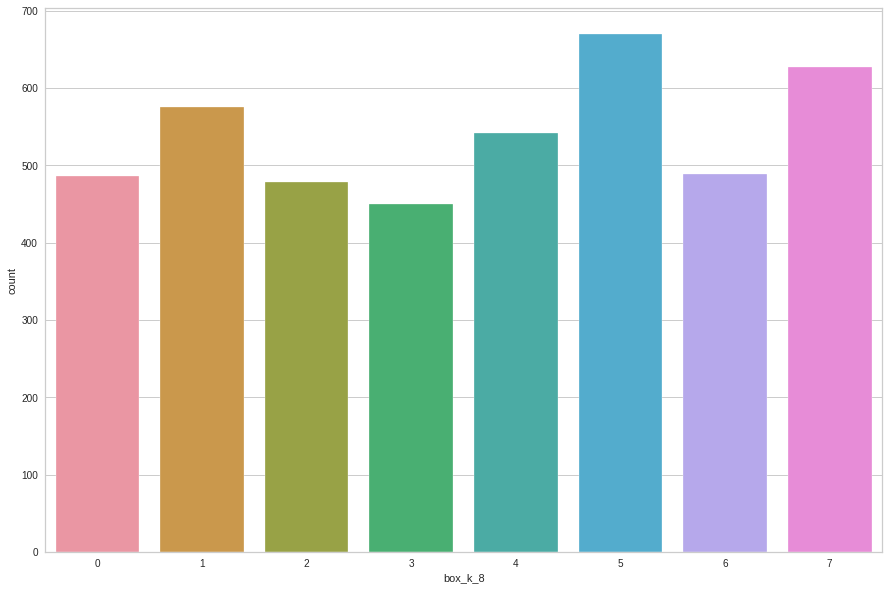

In [138]:
fig = plt.figure(figsize=(15,10))
sns.countplot(x='box_k_8', data=rfmt_boxcox);

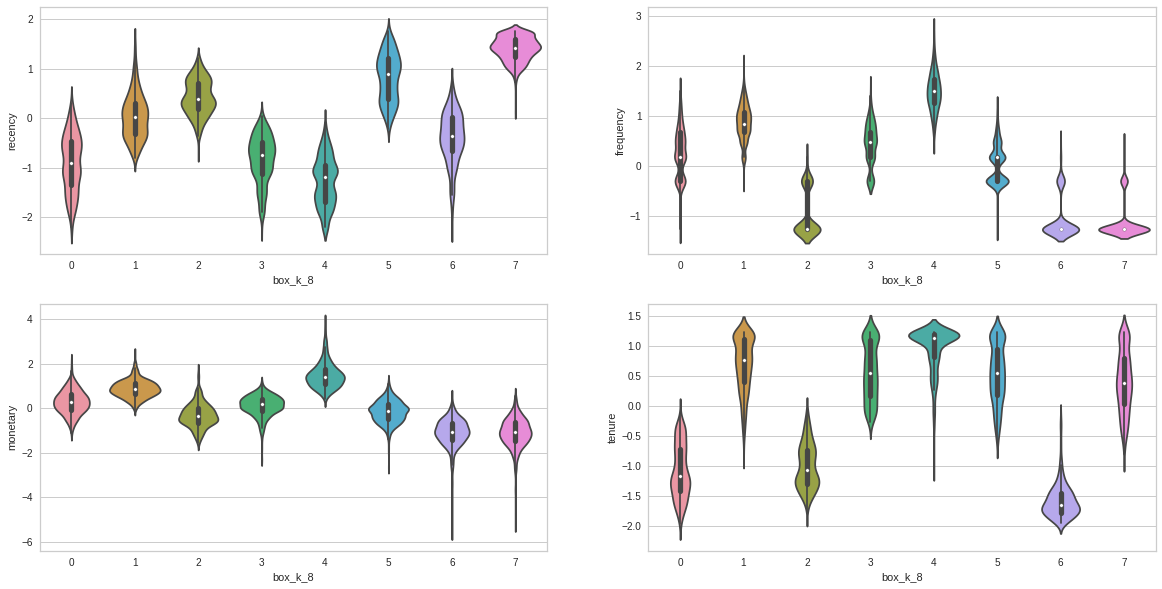

In [139]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
ax = ax.ravel()
for pos, col in enumerate(COLUMNS):
  # use violinplot to see each cluster's variable is distrubuted
  sns.violinplot(x='box_k_8', y=col, data=rfmt_boxcox, ax=ax[pos])

In [140]:
features = rfmt_boxcox[COLUMNS]
umap_2d = umap.UMAP(n_components=2, init='random', random_state=SEED)
proj_2d = umap_2d.fit_transform(features)

In [141]:
fig = go.Figure(data=go.Scatter(x=proj_2d[:,0], y=proj_2d[:,1],
                 mode="markers",
                 marker=dict(color=color_change_2d(rfmt_boxcox,'box_k_8',8),size=5,showscale=False)))
fig.update_layout(height=500, title_text="Visualizing 2D Clusters K=8", showlegend=False)
fig.show(renderer="colab")

####K=7

In [142]:
model = KMeans(n_clusters=7,random_state=SEED)
model.fit(rfmt_boxcox)
model.cluster_centers_.round(4)

array([[ 6.9100e-02, -1.0192e+00, -1.1681e+00, -1.1072e+00,  4.2500e-02,
         1.2434e+00,  6.0260e-01,  1.8006e+00,  3.2111e+00,  4.5103e+00,
         6.2287e+00,  5.9680e-01,  7.2918e+00],
       [-8.3200e-01,  8.9750e-01,  7.3100e-01,  7.5180e-01,  8.5330e-01,
         3.1680e-01,  2.2475e+00,  1.1557e+00,  1.2385e+00,  1.1881e+00,
         3.8101e+00,  5.3897e+00,  2.3420e+00],
       [ 4.1990e-01, -9.7640e-01, -3.2380e-01, -1.0439e+00,  6.3000e-03,
         1.1858e+00,  4.3840e-01,  2.0125e+00,  3.0063e+00,  4.3737e+00,
         2.1441e+00,  5.9520e+00,  5.1253e+00],
       [ 4.6300e-02,  8.7570e-01,  8.5160e-01,  7.0780e-01,  1.0000e+00,
         0.0000e+00,  1.6497e+00,  2.0289e+00,  8.1600e-02,  5.8486e+00,
         1.1088e+00,  1.4133e+00,  6.6667e+00],
       [ 1.5025e+00, -1.1973e+00, -9.0950e-01,  6.2830e-01,  2.3000e-03,
         1.9883e+00,  1.9836e+00,  1.0117e+00,  3.9883e+00,  4.0117e+00,
         6.9533e+00,  2.0864e+00,  1.1700e-02],
       [ 1.1062e+00,  2.7300e-

In [143]:
rfmt_table.groupby('box_k_7')[COLUMNS].mean()

recency  frequency  monetary  tenure
box_k_7                                      
0         17.888      4.390   893.991 291.513
1        154.547      2.807   676.598 276.875
2          9.401     19.066  9048.524 339.311
3         21.675      3.563  1166.637  94.199
4        261.183      1.124   246.845 266.010
5         55.416      1.180   335.161  60.684
6         62.444      6.943  2388.110 309.334

In [144]:
rfmt_boxcox.groupby('box_k_7')[COLUMNS].mean()

recency  frequency  monetary  tenure
box_k_7                                      
0         -0.835      0.447     0.115   0.559
1          0.824      0.001    -0.151   0.437
2         -1.260      1.503     1.478   0.950
3         -0.801      0.209     0.224  -1.111
4          1.380     -1.150    -1.067   0.348
5         -0.064     -1.097    -0.818  -1.409
6          0.056      0.882     0.858   0.705

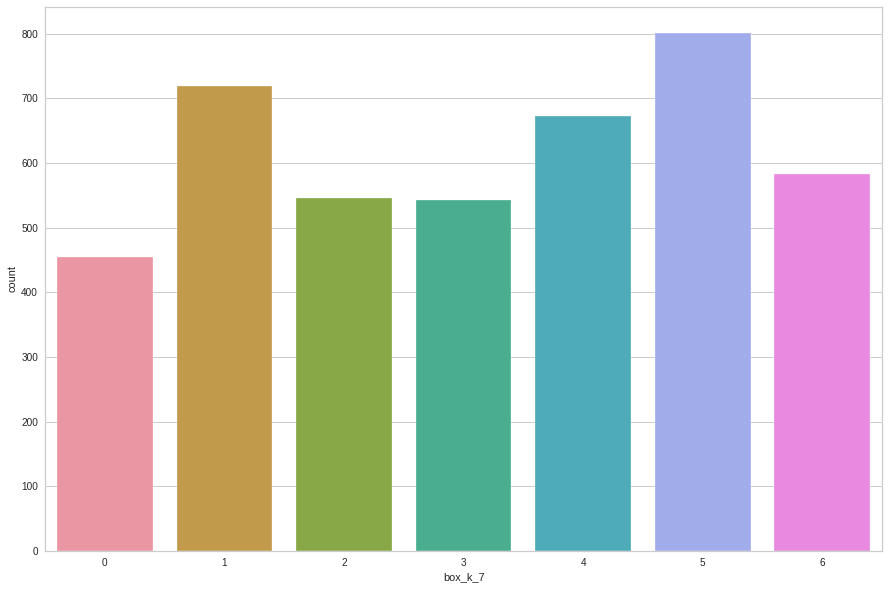

In [145]:
fig = plt.figure(figsize=(15,10))
sns.countplot(x='box_k_7', data=rfmt_boxcox);

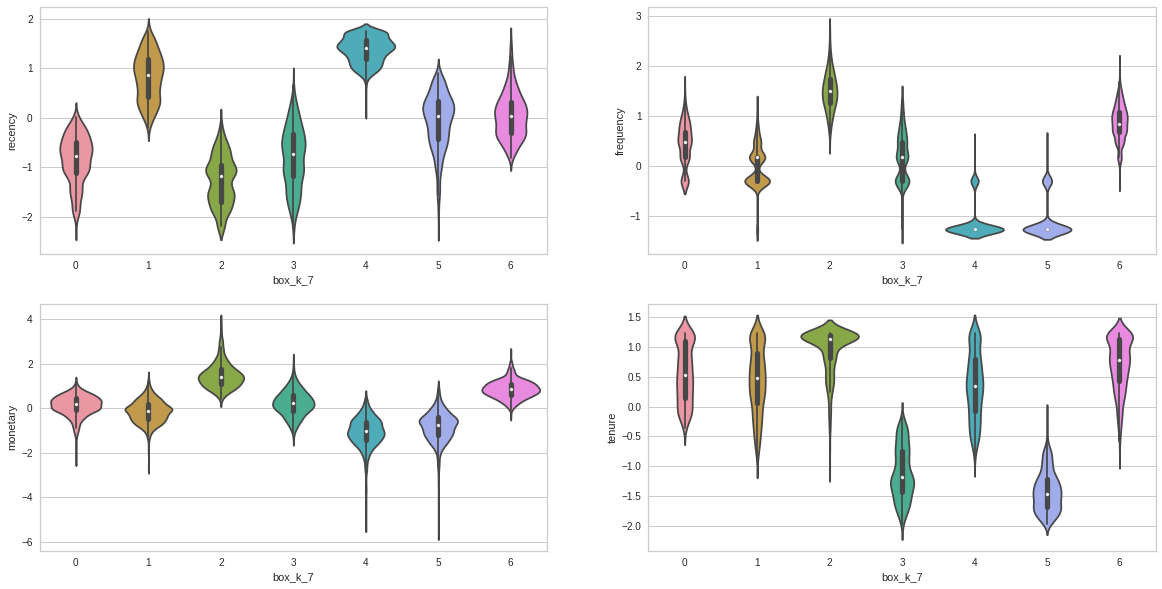

In [146]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
ax = ax.ravel()
for pos, col in enumerate(COLUMNS):
  # use violinplot to see each cluster's variable is distrubuted
  sns.violinplot(x='box_k_7', y=col, data=rfmt_boxcox, ax=ax[pos])

In [147]:
features = rfmt_boxcox[COLUMNS]
umap_2d = umap.UMAP(n_components=2, init='random', random_state=SEED)
proj_2d = umap_2d.fit_transform(features)

In [148]:
fig = go.Figure(data=go.Scatter(x=proj_2d[:,0], y=proj_2d[:,1],
                 mode="markers",
                 marker=dict(color=color_change_2d(rfmt_boxcox,'box_k_7',7),size=5,showscale=False)))
fig.update_layout(height=500, title_text="Visualizing 2D Clusters K=10", showlegend=False)
fig.show(renderer="colab")

####K=6

In [149]:
model = KMeans(n_clusters=6,random_state=SEED)
model.fit(rfmt_boxcox)
model.cluster_centers_.round(4)

array([[ 1.5025e+00, -1.1973e+00, -9.0950e-01,  6.2830e-01,  2.3000e-03,
         1.9883e+00,  1.9836e+00,  1.0117e+00,  3.9883e+00,  4.0117e+00,
         6.9533e+00,  2.0864e+00,  1.1700e-02],
       [-3.1240e-01, -2.9500e-01, -2.4700e-02, -9.9720e-01,  3.3890e-01,
         8.6370e-01,  6.3970e-01,  3.1159e+00,  4.1266e+00,  3.4460e+00,
         1.1811e+00,  4.4547e+00,  3.8724e+00],
       [-8.1180e-01,  8.7850e-01,  7.2510e-01,  7.3850e-01,  8.4340e-01,
         3.3540e-01,  2.2438e+00,  1.1575e+00,  1.2358e+00,  1.1859e+00,
         3.7891e+00,  5.3950e+00,  2.3737e+00],
       [ 7.0600e-02, -1.0203e+00, -1.1681e+00, -1.1076e+00,  4.2300e-02,
         1.2423e+00,  6.0000e-01,  1.8015e+00,  3.2102e+00,  4.5124e+00,
         6.2277e+00,  6.2040e-01,  7.2920e+00],
       [ 4.5500e-02,  8.7870e-01,  8.5640e-01,  7.0870e-01,  1.0000e+00,
         0.0000e+00,  1.6553e+00,  2.0205e+00,  8.5300e-02,  5.8481e+00,
         1.1092e+00,  1.4096e+00,  6.6962e+00],
       [ 1.1032e+00,  2.5500e-

In [150]:
rfmt_table.groupby('box_k_6')[COLUMNS].mean()

recency  frequency  monetary  tenure
box_k_6                                      
0         44.037      6.185  1846.788 308.732
1        146.867      2.863   693.066 280.312
2          9.541     18.706  8873.938 338.356
3         55.170      1.200   358.615  60.681
4        260.938      1.131   249.587 265.943
5         19.721      3.651  1128.517 113.449

In [151]:
rfmt_boxcox.groupby('box_k_6')[COLUMNS].mean()

recency  frequency  monetary  tenure
box_k_6                                      
0         -0.265      0.770     0.622   0.700
1          0.754      0.022    -0.145   0.466
2         -1.268      1.485     1.458   0.942
3         -0.071     -1.077    -0.792  -1.409
4          1.379     -1.143    -1.062   0.347
5         -0.860      0.245     0.212  -0.945

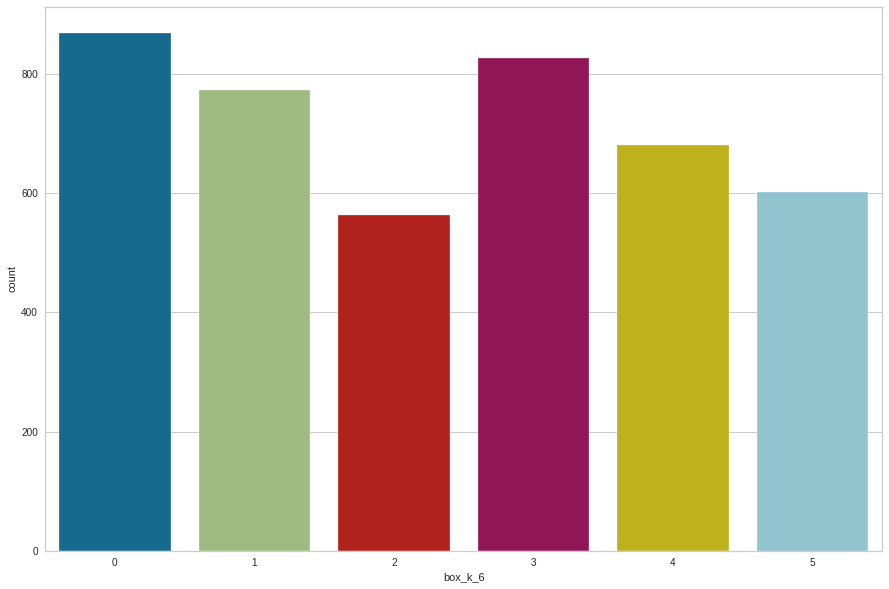

In [152]:
fig = plt.figure(figsize=(15,10))
sns.countplot(x='box_k_6', data=rfmt_boxcox);

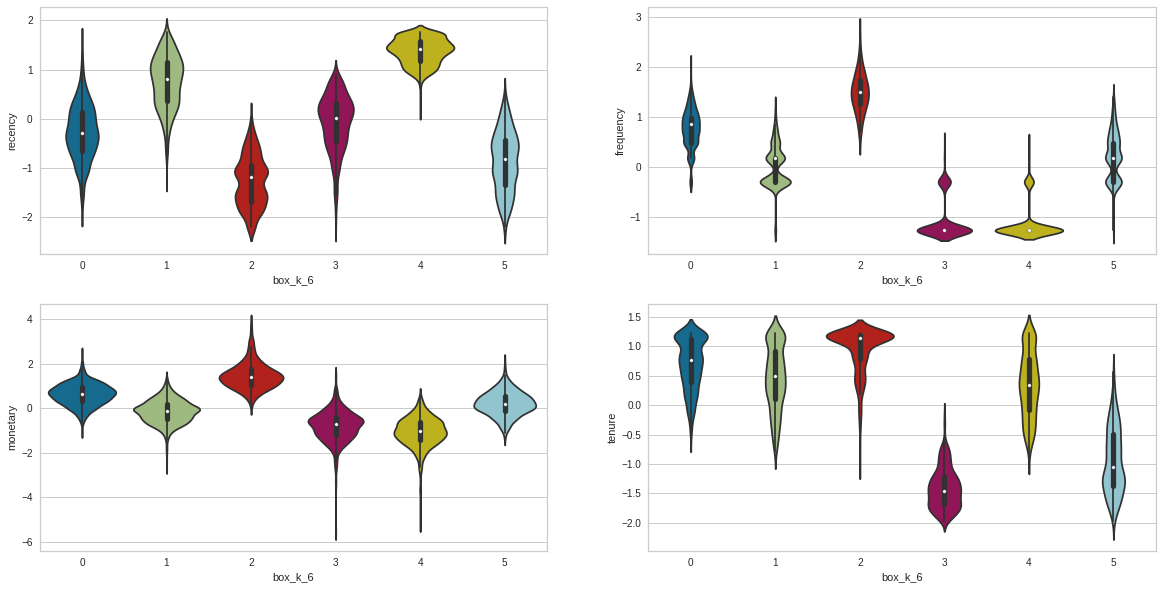

In [153]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
ax = ax.ravel()
for pos, col in enumerate(COLUMNS):
  # use violinplot to see each cluster's variable is distrubuted
  sns.violinplot(x='box_k_6', y=col, data=rfmt_boxcox, ax=ax[pos])

In [154]:
features = rfmt_boxcox[COLUMNS]
umap_2d = umap.UMAP(n_components=2, init='random', random_state=SEED)
proj_2d = umap_2d.fit_transform(features)

In [155]:
fig = go.Figure(data=go.Scatter(x=proj_2d[:,0], y=proj_2d[:,1],
                 mode="markers",
                 marker=dict(color=color_change_2d(rfmt_boxcox,'box_k_6',6),size=5,showscale=False)))
fig.update_layout(height=500, title_text="Visualizing 2D Clusters K=6", showlegend=False)
fig.show(renderer="colab")

####K=5

In [156]:
model = KMeans(n_clusters=5,random_state=SEED)
model.fit(rfmt_boxcox)
model.cluster_centers_.round(4)

array([[ 9.3200e-02, -1.9880e-01, -2.8840e-01, -3.1250e-01,  4.5840e-01,
         7.0530e-01,  1.0049e+00,  1.9728e+00,  1.8576e+00,  5.0831e+00,
         3.9951e+00,  7.9420e-01,  7.1597e+00],
       [-7.8020e-01,  8.6410e-01,  7.2020e-01,  7.1300e-01,  8.3600e-01,
         3.3890e-01,  2.2477e+00,  1.1314e+00,  1.1766e+00,  1.3883e+00,
         3.6410e+00,  5.3849e+00,  2.4921e+00],
       [ 1.5027e+00, -1.1975e+00, -9.0610e-01,  6.2860e-01,  2.3000e-03,
         1.9883e+00,  1.9837e+00,  1.0117e+00,  3.9883e+00,  4.0047e+00,
         6.9534e+00,  2.1002e+00,  1.1700e-02],
       [-3.3650e-01, -2.8420e-01, -1.8000e-02, -9.9760e-01,  3.5110e-01,
         8.4370e-01,  6.4690e-01,  3.1345e+00,  4.1592e+00,  3.5074e+00,
         1.1612e+00,  4.4313e+00,  3.8398e+00],
       [ 1.1023e+00,  2.1400e-02, -2.2110e-01,  5.7070e-01,  1.9910e-01,
         1.9957e+00,  1.4797e+00,  2.1221e+00,  1.1563e+00,  1.1328e+00,
         5.0535e+00,  7.9657e+00,  8.8972e+00]])

In [157]:
rfmt_table.groupby('box_k_5')[COLUMNS].mean()

recency  frequency  monetary  tenure
box_k_5                                      
0         14.993     14.811  6543.009 329.986
1        249.798      1.384   299.084 270.892
2         56.718      1.212   363.462  62.819
3         90.691      4.216  1179.899 296.521
4         19.995      3.730  1152.149 117.784

In [158]:
rfmt_boxcox.groupby('box_k_5')[COLUMNS].mean()

recency  frequency  monetary  tenure
box_k_5                                      
0         -1.037      1.308     1.234   0.874
1          1.326     -0.929    -0.920   0.388
2         -0.053     -1.066    -0.792  -1.390
3          0.290      0.385     0.244   0.600
4         -0.846      0.265     0.227  -0.908

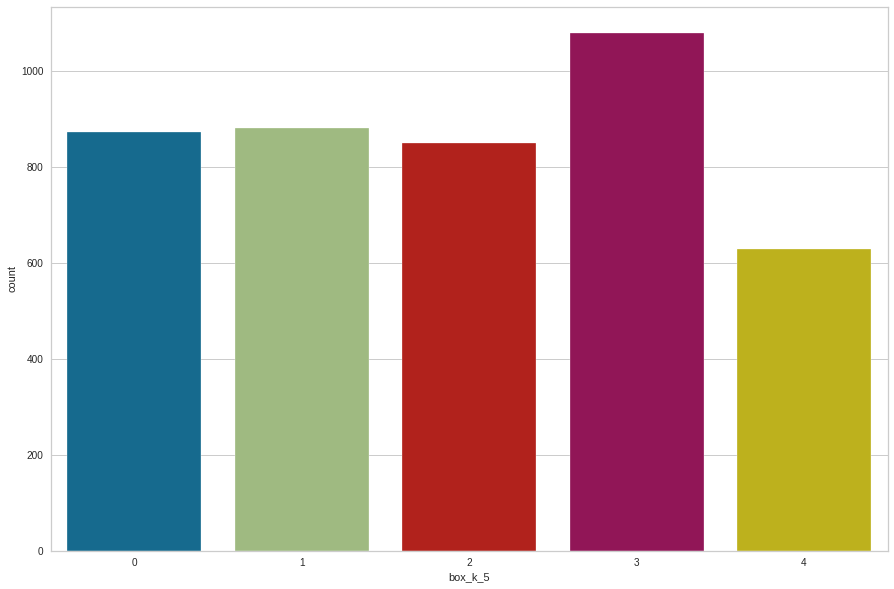

In [159]:
fig = plt.figure(figsize=(15,10))
sns.countplot(x='box_k_5', data=rfmt_boxcox);

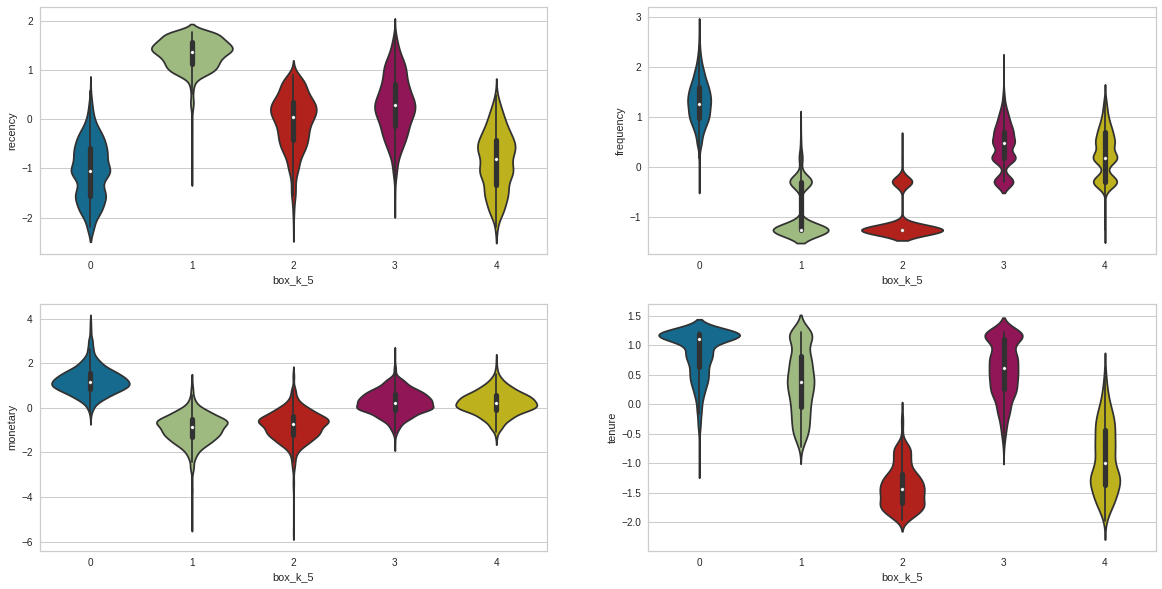

In [160]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
ax = ax.ravel()
for pos, col in enumerate(COLUMNS):
  # use violinplot to see each cluster's variable is distrubuted
  sns.violinplot(x='box_k_5', y=col, data=rfmt_boxcox, ax=ax[pos])

In [161]:
features = rfmt_boxcox[COLUMNS]
umap_2d = umap.UMAP(n_components=2, init='random', random_state=SEED)
proj_2d = umap_2d.fit_transform(features)

In [162]:
fig = go.Figure(data=go.Scatter(x=proj_2d[:,0], y=proj_2d[:,1],
                 mode="markers",
                 marker=dict(color=color_change_2d(rfmt_boxcox,'box_k_5',5),size=5,showscale=False)))
fig.update_layout(height=500, title_text="Visualizing 2D Clusters K=5", showlegend=False)
fig.show(renderer="colab")

####K=4

In [163]:
model = KMeans(n_clusters=4,random_state=SEED)
model.fit(rfmt_boxcox)
model.cluster_centers_.round(4)

array([[-0.2505,  0.6268,  0.4579,  0.6705,  0.654 ,  0.8113,  2.035 ,
         1.4033,  1.1742,  1.3086,  4.0325,  6.1248,  4.3183],
       [ 0.0935, -0.2005, -0.2896, -0.3141,  0.4577,  0.7058,  1.0033,
         1.9729,  1.8595,  5.083 ,  3.9984,  0.8028,  7.1611],
       [-0.3423, -0.2802, -0.019 , -0.9942,  0.3562,  0.8333,  0.6448,
         3.1448,  4.1587,  3.5109,  1.1518,  4.4097,  3.8016],
       [ 1.4936, -1.1855, -0.8963,  0.6283,  0.0092,  1.9746,  1.9769,
         1.0254,  3.963 ,  4.    ,  6.94  ,  2.1201,  0.0185]])

In [164]:
rfmt_table.groupby('box_k_4')[COLUMNS].mean()

recency  frequency  monetary  tenure
box_k_4                                      
0         43.109      1.705   502.215  65.064
1         79.593      4.232  1201.535 281.327
2        243.151      1.408   301.100 264.842
3         13.737     13.746  6014.643 306.302

In [165]:
rfmt_boxcox.groupby('box_k_4')[COLUMNS].mean()

recency  frequency  monetary  tenure
box_k_4                                      
0         -0.313     -0.733    -0.539  -1.370
1          0.163      0.393     0.269   0.473
2          1.295     -0.916    -0.919   0.337
3         -1.086      1.243     1.175   0.676

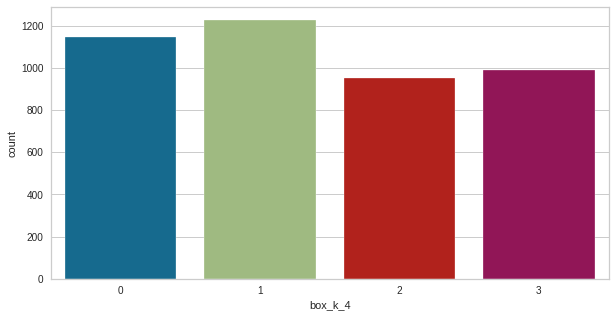

In [166]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='box_k_4', data=rfmt_boxcox);

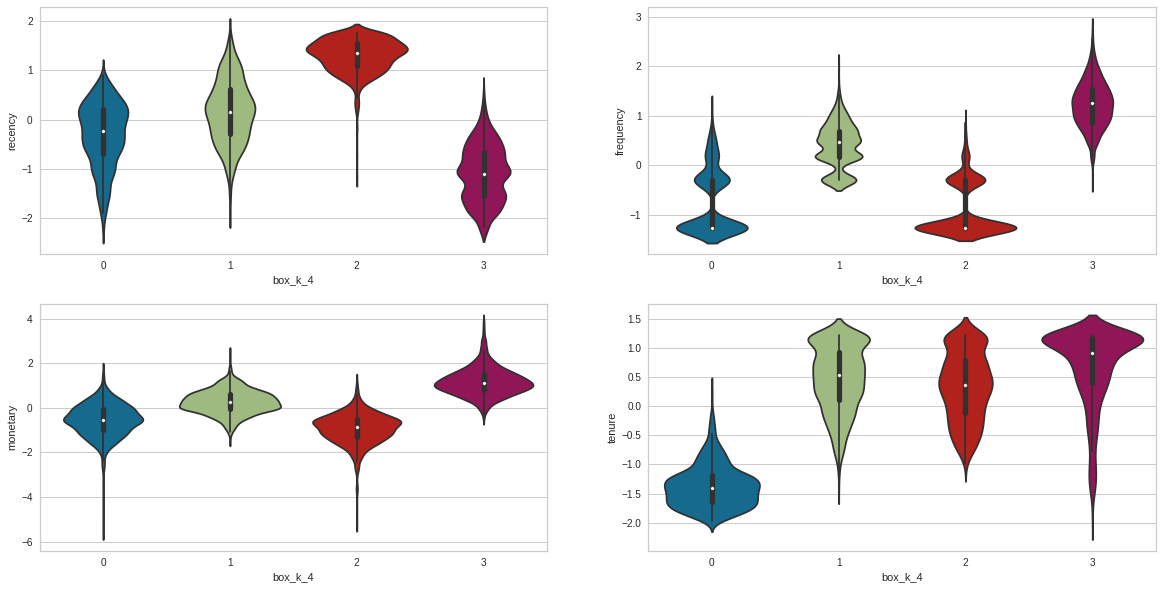

In [167]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
ax = ax.ravel()
for pos, col in enumerate(COLUMNS):
  # use violinplot to see each cluster's variable is distrubuted
  sns.violinplot(x='box_k_4', y=col, data=rfmt_boxcox, ax=ax[pos])

In [168]:
features = rfmt_boxcox[COLUMNS]
umap_2d = umap.UMAP(n_components=2, init='random', random_state=SEED)
proj_2d = umap_2d.fit_transform(features)

In [169]:
fig = go.Figure(data=go.Scatter(x=proj_2d[:,0], y=proj_2d[:,1],
                 mode="markers",
                 marker=dict(color=color_change_2d(rfmt_boxcox,'box_k_4',4),size=5,showscale=False)))
fig.update_layout(height=500, title_text="Visualizing 2D Clusters K=4", showlegend=False)
fig.show(renderer="colab")

####K=3

In [170]:
model = KMeans(n_clusters=3,random_state=SEED)
model.fit(rfmt_boxcox)
model.cluster_centers_.round(4)

array([[-0.1579,  0.1454,  0.3212, -0.3942,  0.5792,  0.5523,  1.0121,
         2.6635,  2.6028,  4.6183,  0.9703,  3.263 ,  4.967 ],
       [ 0.6055, -1.0743, -1.0574, -0.449 ,  0.0345,  1.5066,  1.1098,
         1.5199,  3.4765,  4.3446,  6.4978,  1.2143,  4.5509],
       [-0.2636,  0.5849,  0.4208,  0.6402,  0.6493,  0.8094,  1.9642,
         1.5701,  1.3689,  1.0991,  4.0745,  6.0358,  4.2317]])

In [171]:
rfmt_table.groupby('box_k_3')[COLUMNS].mean()

recency  frequency  monetary  tenure
box_k_3                                      
0         32.153      9.936  4043.116 297.894
1         44.263      1.758   514.666  71.646
2        210.976      1.895   430.854 273.718

In [172]:
rfmt_boxcox.groupby('box_k_3')[COLUMNS].mean()

recency  frequency  monetary  tenure
box_k_3                                      
0         -0.645      0.955     0.862   0.608
1         -0.290     -0.697    -0.518  -1.312
2          1.114     -0.611    -0.655   0.411

In [173]:
# sns.pairplot(rfmt_scaled_df[['recency', 'frequency','monetary','tenure','box_k_3']], hue="box_k_3")

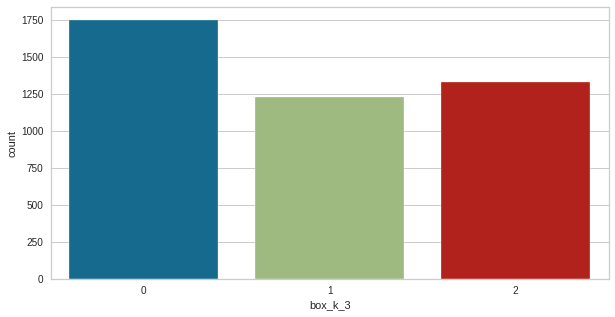

In [174]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='box_k_3', data=rfmt_boxcox);

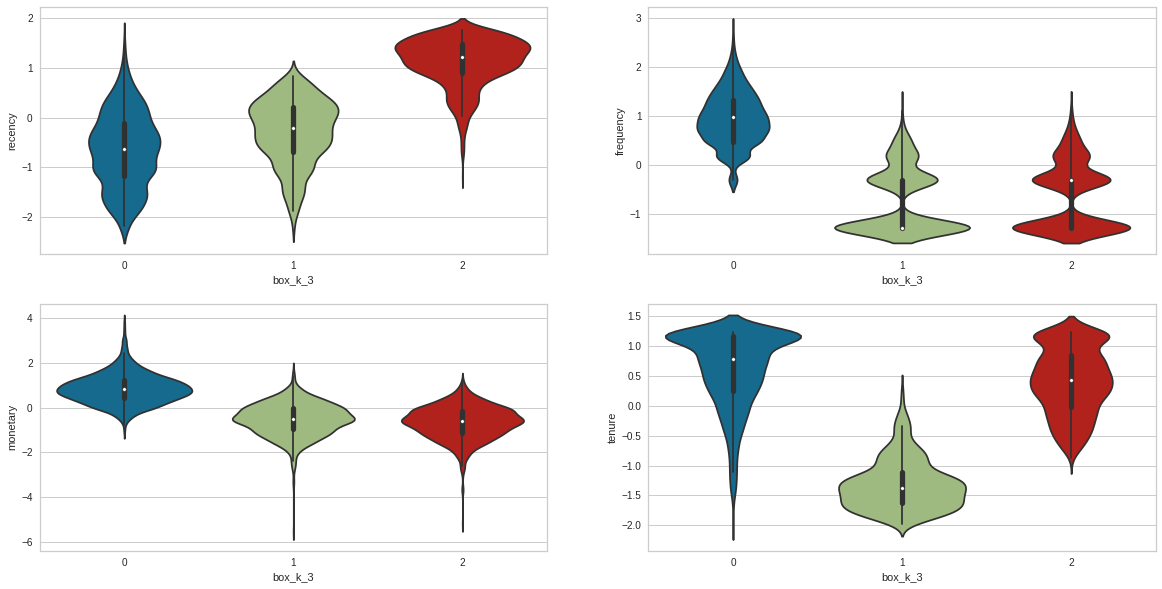

In [175]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
ax = ax.ravel()
for pos, col in enumerate(COLUMNS):
  # use violinplot to see each cluster's variable is distrubuted
  sns.violinplot(x='box_k_3', y=col, data=rfmt_boxcox, ax=ax[pos])

In [176]:
features = rfmt_boxcox[COLUMNS]
umap_2d = umap.UMAP(n_components=2, init='random', random_state=SEED)
proj_2d = umap_2d.fit_transform(features)

In [177]:
fig = go.Figure(data=go.Scatter(x=proj_2d[:,0], y=proj_2d[:,1],
                 mode="markers",
                 marker=dict(color=color_change_2d(rfmt_boxcox,'box_k_3',3),size=5,showscale=False)))
fig.update_layout(height=500, title_text="Visualizing 2D Clusters K=3", showlegend=False)
fig.show(renderer="colab")

###RFMT Mean

####K=10

In [178]:
model = KMeans(n_clusters=10,random_state=SEED2)
model.fit(rfmt_boxcox2)
model.cluster_centers_.round(4)

array([[ 1.3875e+00, -1.1032e+00, -6.7980e-01,  3.8930e-01,  0.0000e+00,
         1.9947e+00,  4.2800e-02,  2.9947e+00,  2.9813e+00,  5.9947e+00,
         4.4920e+00,  6.5374e+00,  8.2995e+00],
       [ 9.5010e-01, -5.7340e-01,  3.6540e-01,  4.9780e-01,  2.4380e-01,
         1.7383e+00,  2.3535e+00,  2.5235e+00,  3.1275e+00,  5.6174e+00,
         1.5213e+00,  5.3020e+00,  2.9754e+00],
       [ 3.6110e-01,  4.7030e-01, -5.6910e-01,  6.3990e-01,  7.6630e-01,
         1.5061e+00,  9.4110e-01,  6.1000e-03,  1.5752e+00,  7.2970e-01,
         1.0200e-02,  7.9817e+00,  3.5630e+00],
       [-1.9150e-01, -8.3850e-01, -8.1930e-01, -1.2974e+00,  6.5200e-02,
         1.7920e-01,  1.0081e+00,  1.0591e+00,  4.2831e+00,  1.0224e+00,
         9.4910e-01,  1.3030e-01,  4.8391e+00],
       [-8.9570e-01,  1.0084e+00,  2.6800e-01,  7.3760e-01,  9.7730e-01,
         9.7730e-01,  1.9773e+00,  1.9221e+00,  4.0422e+00,  4.7338e+00,
         5.8474e+00,  1.7662e+00,  1.2630e+00],
       [-9.9150e-01,  3.3280e-

In [179]:
rfmt_mean_table.groupby('box_k_10')[COLUMNS2].mean()

recency  frequency  monetary_mean  tenure
box_k_10                                           
0          28.708      9.776        797.553 307.753
1          59.941      1.211        599.319  66.546
2          34.420      6.466        191.319 310.655
3         266.912      1.150        493.265 274.578
4         180.962      3.248        116.853 290.315
5          47.422      1.369        143.482  58.098
6         111.372      3.380        364.548 266.668
7           7.317     18.147        272.275 340.836
8          15.847      4.028        268.962 108.361
9         260.259      1.000        142.490 260.259

In [180]:
rfmt_boxcox2.groupby('box_k_10')[COLUMNS2].mean()

recency  frequency  monetary_mean  tenure
box_k_10                                           
0          -0.590      0.955          1.407   0.691
1          -0.003     -1.069          0.968  -1.356
2          -0.380      0.756         -0.406   0.716
3           1.407     -1.121          0.791   0.419
4           0.968      0.098         -1.138   0.548
5          -0.191     -0.934         -0.856  -1.433
6           0.548      0.170          0.477   0.353
7          -1.383      1.427          0.065   0.962
8          -0.967      0.340         -0.009  -0.988
9           1.376     -1.266         -0.839   0.300

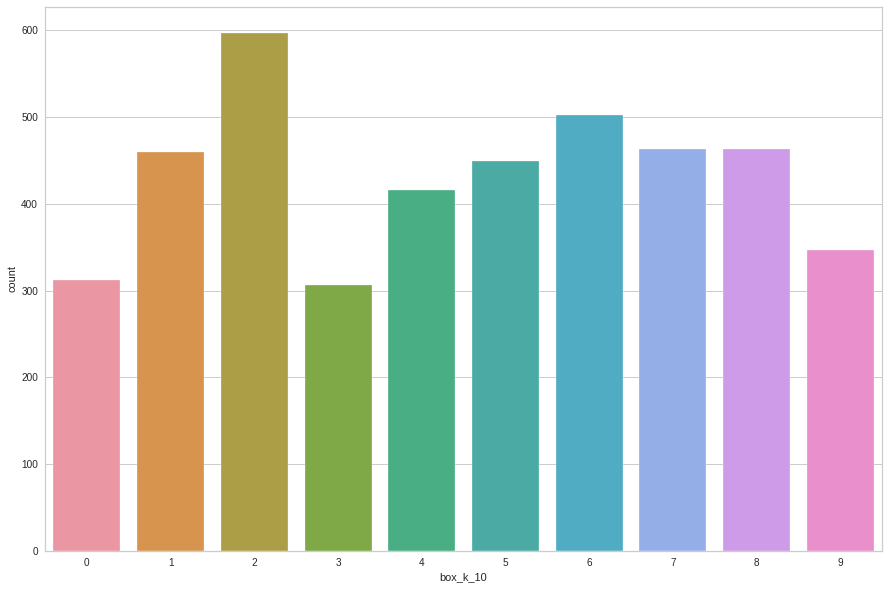

In [181]:
fig = plt.figure(figsize=(15,10))
sns.countplot(x='box_k_10', data=rfmt_boxcox2);

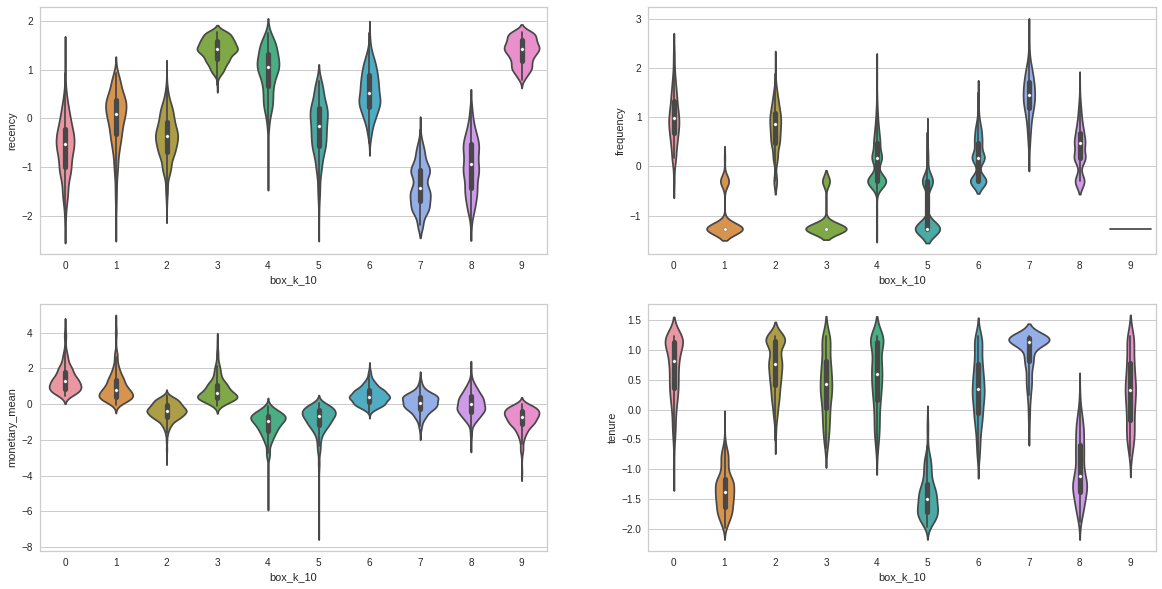

In [182]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
ax = ax.ravel()
for pos, col in enumerate(COLUMNS2):
  # use violinplot to see each cluster's variable is distrubuted
  sns.violinplot(x='box_k_10', y=col, data=rfmt_boxcox2, ax=ax[pos])

In [183]:
features = rfmt_boxcox2[COLUMNS2]
umap_2d = umap.UMAP(n_components=2, init='random', random_state=SEED2)
proj_2d = umap_2d.fit_transform(features)

In [184]:
fig = go.Figure(data=go.Scatter(x=proj_2d[:,0], y=proj_2d[:,1],
                 mode="markers",
                 marker=dict(color=color_change_2d(rfmt_boxcox2,'box_k_10',10),size=5,showscale=False)))
fig.update_layout(height=500, title_text="Visualizing 2D Clusters K=10", showlegend=False)
fig.show(renderer="colab")

####K=9

In [185]:
model = KMeans(n_clusters=9,random_state=SEED2)
model.fit(rfmt_boxcox2)
model.cluster_centers_.round(4)

array([[ 1.1001e+00, -2.0430e-01, -1.6748e+00,  3.3060e-01,  5.0900e-02,
         1.9954e+00, -0.0000e+00,  1.8148e+00,  2.0556e+00,  9.2600e-02,
         6.0000e+00,  7.1759e+00,  4.6296e+00],
       [-9.9150e-01,  3.3280e-01, -7.6900e-02, -1.0428e+00,  5.6210e-01,
         2.3420e-01,  1.1920e+00,  1.5129e+00,  4.6089e+00,  2.0281e+00,
         4.0070e+00,  4.9532e+00,  7.9555e+00],
       [ 9.4500e-01, -5.7780e-01,  3.6210e-01,  4.8050e-01,  2.4390e-01,
         1.7339e+00,  2.3570e+00,  2.5100e+00,  3.1596e+00,  5.5698e+00,
         1.5654e+00,  5.3259e+00,  2.9690e+00],
       [-2.4440e-01, -1.9530e-01,  1.1265e+00, -4.6650e-01,  4.3770e-01,
         4.4760e-01,  1.8212e+00,  3.0284e+00,  1.1973e+00,  3.9149e+00,
         4.2589e+00,  2.7818e+00,  6.9050e-01],
       [-1.2222e+00,  1.2955e+00, -4.5200e-02,  9.1410e-01,  1.0000e+00,
         1.0000e+00,  2.0000e+00,  2.0000e+00,  4.0000e+00,  4.9482e+00,
         7.0000e+00,  1.7221e+00,  5.6546e+00],
       [ 3.6110e-01,  4.7030e-

In [186]:
rfmt_mean_table.groupby('box_k_9')[COLUMNS2].mean()

recency  frequency  monetary_mean  tenure
box_k_9                                           
0         49.794      1.334        150.789  58.574
1         11.012     18.816        589.253 340.534
2         14.172     11.012        199.474 323.395
3         62.361      1.222        625.529  69.186
4         72.606      4.230        522.258 276.360
5         16.595      4.023        264.157 108.028
6        257.807      1.251        346.851 270.505
7        237.675      1.710         95.259 266.855
8         99.496      4.640        168.057 301.651

In [187]:
rfmt_boxcox2.groupby('box_k_9')[COLUMNS2].mean()

recency  frequency  monetary_mean  tenure
box_k_9                                           
0         -0.158     -0.957         -0.769  -1.429
1         -1.189      1.430          0.982   0.960
2         -1.016      1.092         -0.339   0.820
3          0.019     -1.057          1.026  -1.333
4          0.151      0.380          0.890   0.434
5         -0.943      0.339         -0.039  -0.991
6          1.368     -1.026          0.307   0.385
7          1.265     -0.707         -1.427   0.354
8          0.411      0.452         -0.582   0.642

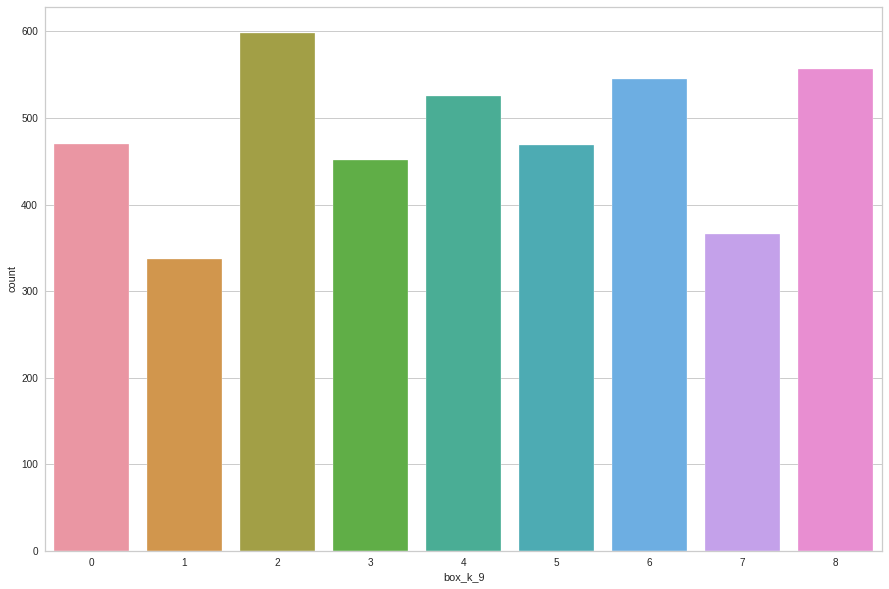

In [188]:
fig = plt.figure(figsize=(15,10))
sns.countplot(x='box_k_9', data=rfmt_boxcox2);

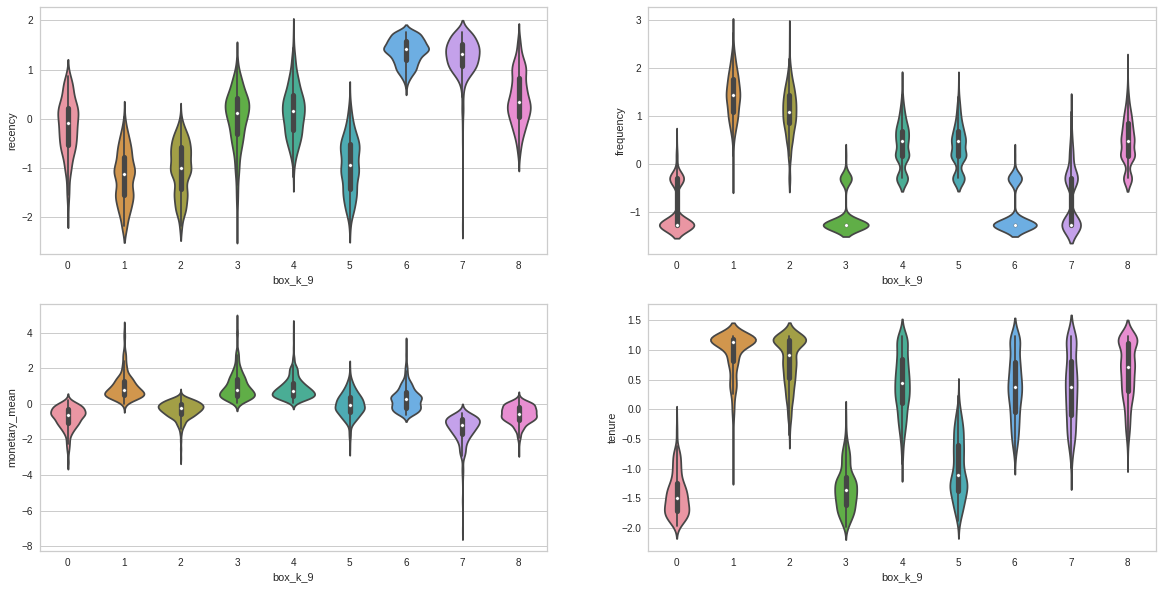

In [189]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
ax = ax.ravel()
for pos, col in enumerate(COLUMNS2):
  # use violinplot to see each cluster's variable is distrubuted
  sns.violinplot(x='box_k_9', y=col, data=rfmt_boxcox2, ax=ax[pos])

In [190]:
features = rfmt_boxcox2[COLUMNS2]
umap_2d = umap.UMAP(n_components=2, init='random', random_state=SEED2)
proj_2d = umap_2d.fit_transform(features)

In [191]:
fig = go.Figure(data=go.Scatter(x=proj_2d[:,0], y=proj_2d[:,1],
                 mode="markers",
                 marker=dict(color=color_change_2d(rfmt_boxcox2,'box_k_9',9),size=5,showscale=False)))
fig.update_layout(height=500, title_text="Visualizing 2D Clusters K=9", showlegend=False)
fig.show(renderer="colab")

####K=8

In [192]:
model = KMeans(n_clusters=8,random_state=SEED2)
model.fit(rfmt_boxcox2)
model.cluster_centers_.round(4)

array([[ 0.3485,  0.2397,  0.6359,  0.3325,  0.6667,  1.2244,  2.6035,
         1.1917,  0.0784,  2.9346,  2.0893,  4.5534,  5.8497],
       [ 0.9498, -0.5703,  0.3594,  0.4968,  0.2455,  1.7321,  2.3527,
         2.5   ,  3.1228,  5.6183,  1.5179,  5.3616,  2.9688],
       [-0.9942,  0.3346, -0.0806, -1.041 ,  0.5647,  0.2353,  1.1929,
         1.5012,  4.6259,  2.0188,  4.0047,  4.9529,  7.9553],
       [ 0.5605,  0.3064, -0.9201,  0.5598,  0.5474,  1.6563,  0.5754,
         0.493 ,  1.8538,  0.3593,  1.8274,  7.7185,  3.5474],
       [-1.2222,  1.2955, -0.0452,  0.9141,  1.    ,  1.    ,  2.    ,
         2.    ,  4.    ,  4.9482,  7.    ,  1.7221,  5.6546],
       [-0.2427, -0.1998,  1.1306, -0.4668,  0.4358,  0.4481,  1.8222,
         3.037 ,  1.1901,  3.9198,  4.2568,  2.7765,  0.6901],
       [-0.1959, -0.8348, -0.8208, -1.2915,  0.069 ,  0.1826,  1.0122,
         1.0568,  4.284 ,  1.0264,  0.9615,  0.1379,  4.8276],
       [ 1.364 , -1.1086, -0.7694,  0.3478,  0.    ,  1.9851, 

In [193]:
rfmt_mean_table.groupby('box_k_8')[COLUMNS2].mean()

recency  frequency  monetary_mean  tenure
box_k_8                                           
0         76.776      4.985        187.688 303.262
1         49.713      1.345        149.481  58.832
2        241.336      1.397        374.494 267.932
3         52.388      7.171        683.915 294.773
4         17.298      4.038        266.192 114.049
5         60.756      1.242        616.619  69.353
6        237.162      1.780        104.474 269.793
7          9.972     15.263        270.623 334.819

In [194]:
rfmt_boxcox2.groupby('box_k_8')[COLUMNS2].mean()

recency  frequency  monetary_mean  tenure
box_k_8                                           
0          0.178      0.515         -0.453   0.655
1         -0.159     -0.953         -0.781  -1.426
2          1.288     -0.908          0.424   0.364
3         -0.169      0.716          1.208   0.585
4         -0.922      0.344         -0.022  -0.939
5          0.003     -1.040          1.013  -1.331
6          1.263     -0.670         -1.298   0.378
7         -1.227      1.290          0.023   0.913

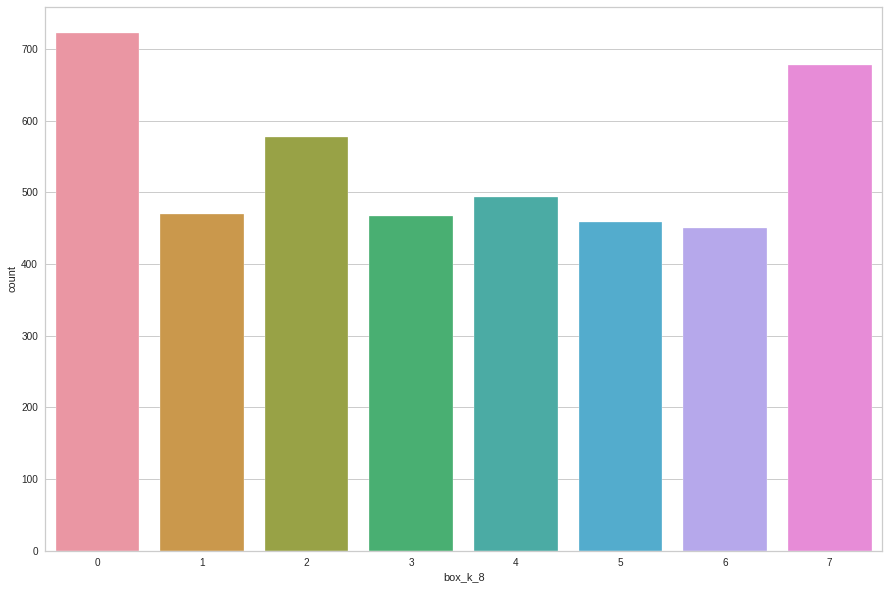

In [195]:
fig = plt.figure(figsize=(15,10))
sns.countplot(x='box_k_8', data=rfmt_boxcox2);

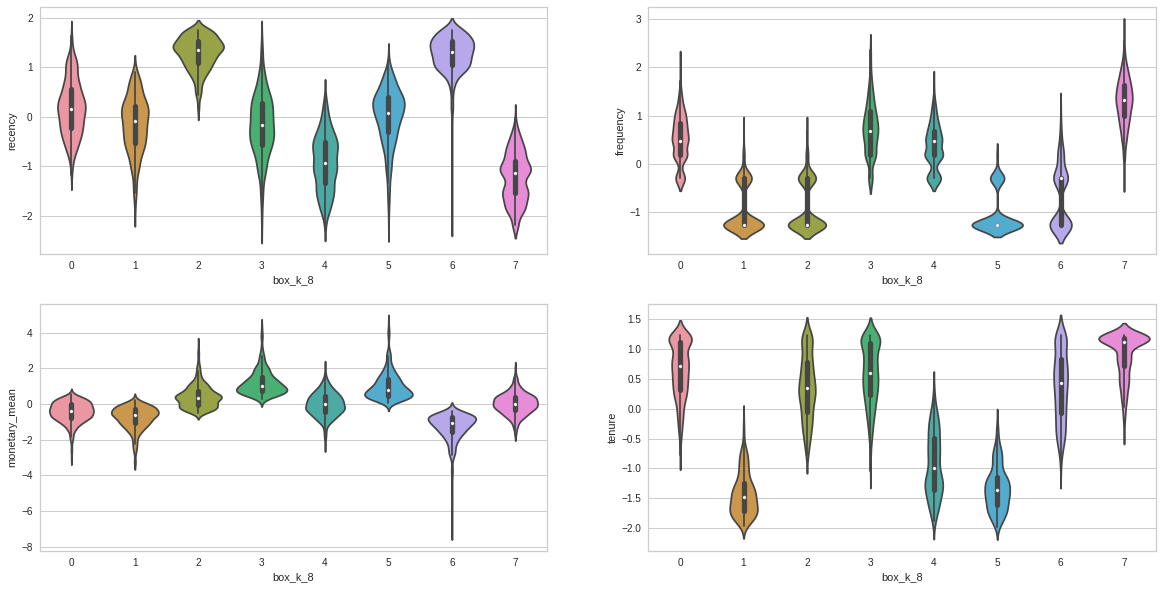

In [196]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
ax = ax.ravel()
for pos, col in enumerate(COLUMNS2):
  # use violinplot to see each cluster's variable is distrubuted
  sns.violinplot(x='box_k_8', y=col, data=rfmt_boxcox2, ax=ax[pos])

In [197]:
features = rfmt_boxcox2[COLUMNS2]
umap_2d = umap.UMAP(n_components=2, init='random', random_state=SEED2)
proj_2d = umap_2d.fit_transform(features)

In [198]:
fig = go.Figure(data=go.Scatter(x=proj_2d[:,0], y=proj_2d[:,1],
                 mode="markers",
                 marker=dict(color=color_change_2d(rfmt_boxcox2,'box_k_8',8),size=5,showscale=False)))
fig.update_layout(height=500, title_text="Visualizing 2D Clusters K=8", showlegend=False)
fig.show(renderer="colab")

####K=7

In [199]:
model = KMeans(n_clusters=7,random_state=SEED2)
model.fit(rfmt_boxcox2)
model.cluster_centers_.round(4)

array([[-3.0660e-01,  1.6490e-01, -5.4830e-01, -5.7120e-01,  4.2500e-01,
         8.1220e-01,  8.5010e-01,  1.6448e+00,  3.5429e+00,  1.4221e+00,
         4.6303e+00,  5.6492e+00,  6.8690e+00],
       [-2.4910e-01, -2.0430e-01,  1.1269e+00, -4.8110e-01,  4.3450e-01,
         4.3450e-01,  1.8152e+00,  3.0337e+00,  1.2010e+00,  3.9076e+00,
         4.2984e+00,  2.7865e+00,  6.6790e-01],
       [ 3.4580e-01,  4.9000e-01, -5.6040e-01,  6.4770e-01,  7.7450e-01,
         1.4882e+00,  9.7840e-01,  5.9000e-03,  1.6608e+00,  8.8040e-01,
         9.8000e-03,  7.9824e+00,  3.5078e+00],
       [ 7.2500e-01, -2.4800e-01,  5.4880e-01,  4.3600e-01,  3.9880e-01,
         1.5362e+00,  2.5350e+00,  1.9718e+00,  1.6883e+00,  4.4135e+00,
         1.8405e+00,  4.6883e+00,  4.2245e+00],
       [-1.9590e-01, -8.3480e-01, -8.2080e-01, -1.2915e+00,  6.9000e-02,
         1.8260e-01,  1.0122e+00,  1.0568e+00,  4.2840e+00,  1.0264e+00,
         9.6150e-01,  1.3790e-01,  4.8276e+00],
       [-1.2224e+00,  1.2953e+

In [200]:
rfmt_mean_table.groupby('box_k_7')[COLUMNS2].mean()

recency  frequency  monetary_mean  tenure
box_k_7                                           
0        128.135      4.049        122.848 292.393
1         53.004      1.340        144.174  61.447
2         16.388      4.269        265.328 121.904
3         87.227      4.318        518.491 287.094
4         64.868      1.249        616.769  73.142
5         13.879     14.079        323.012 334.022
6        263.072      1.199        255.706 272.243

In [201]:
rfmt_boxcox2.groupby('box_k_7')[COLUMNS2].mean()

recency  frequency  monetary_mean  tenure
box_k_7                                           
0          0.572      0.278         -1.082   0.565
1         -0.126     -0.956         -0.844  -1.403
2         -0.950      0.383         -0.041  -0.872
3          0.282      0.367          0.821   0.522
4          0.035     -1.034          1.006  -1.298
5         -1.057      1.235          0.147   0.907
6          1.389     -1.075         -0.140   0.399

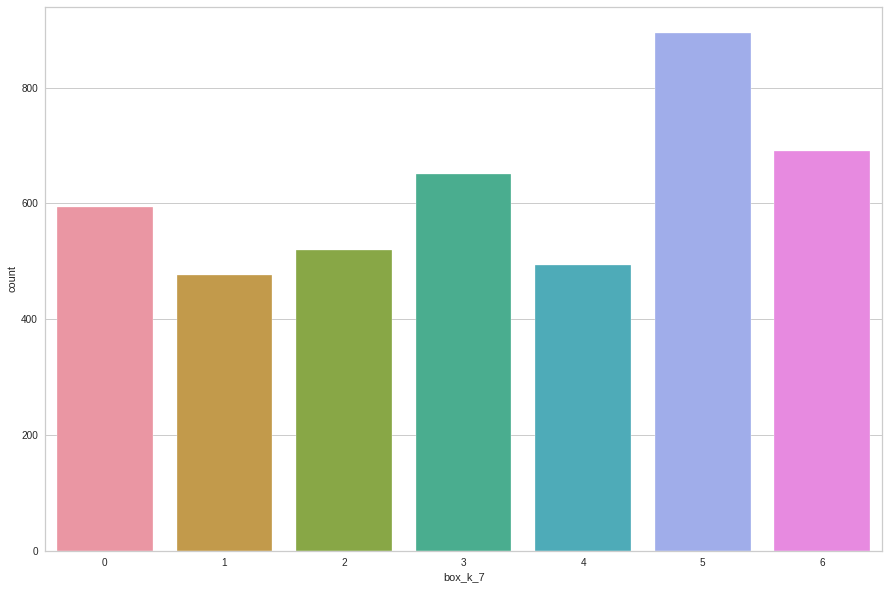

In [202]:
fig = plt.figure(figsize=(15,10))
sns.countplot(x='box_k_7', data=rfmt_boxcox2);

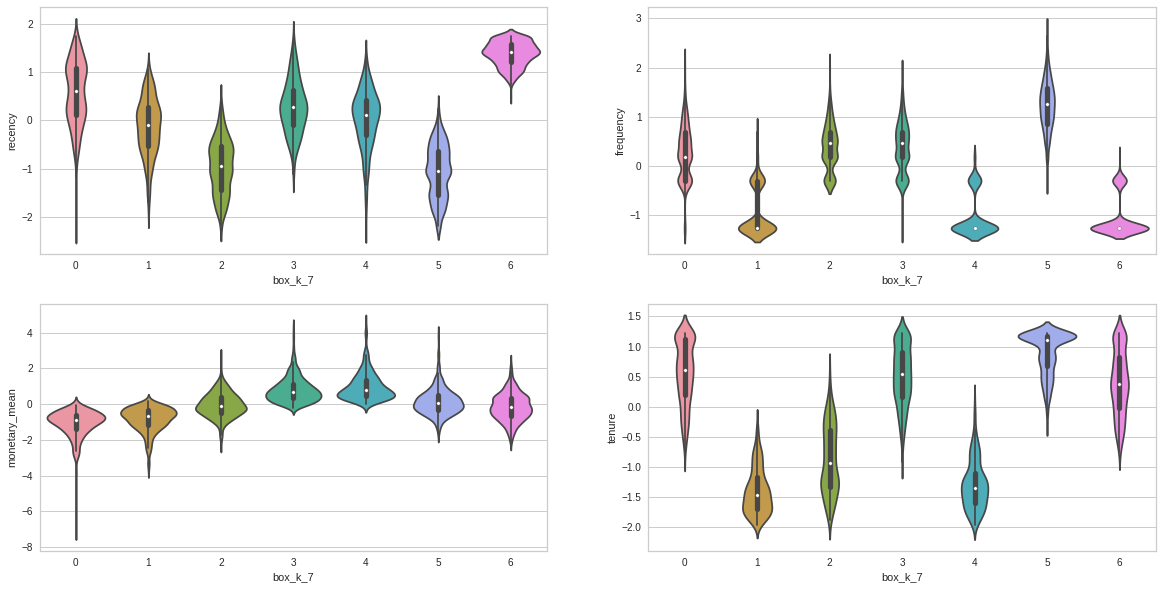

In [203]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
ax = ax.ravel()
for pos, col in enumerate(COLUMNS2):
  # use violinplot to see each cluster's variable is distrubuted
  sns.violinplot(x='box_k_7', y=col, data=rfmt_boxcox2, ax=ax[pos])

In [204]:
features = rfmt_boxcox2[COLUMNS2]
umap_2d = umap.UMAP(n_components=2, init='random', random_state=SEED2)
proj_2d = umap_2d.fit_transform(features)

In [205]:
fig = go.Figure(data=go.Scatter(x=proj_2d[:,0], y=proj_2d[:,1],
                 mode="markers",
                 marker=dict(color=color_change_2d(rfmt_boxcox2,'box_k_7',7),size=5,showscale=False)))
fig.update_layout(height=500, title_text="Visualizing 2D Clusters K=7", showlegend=False)
fig.show(renderer="colab")

####K=6

In [206]:
model = KMeans(n_clusters=6,random_state=SEED2)
model.fit(rfmt_boxcox2)
model.cluster_centers_.round(4)

array([[-0.2359, -0.5919, -0.7607, -0.9912,  0.2024,  0.2993,  1.154 ,
         1.0017,  4.2457,  1.5969,  0.8235,  0.4221,  4.4221],
       [-0.2496, -0.1987,  1.1228, -0.4764,  0.4373,  0.4373,  1.8161,
         3.0286,  1.2   ,  3.913 ,  4.2845,  2.7876,  0.6745],
       [-1.2224,  1.2953, -0.044 ,  0.9123,  1.    ,  1.    ,  2.    ,
         2.    ,  4.    ,  4.9436,  6.9953,  1.721 ,  5.6583],
       [ 0.0335, -0.3409, -0.3692, -0.4371,  0.3437,  0.9963,  0.731 ,
         2.1831,  3.6824,  3.528 ,  4.2628,  5.6227,  8.401 ],
       [ 0.5542,  0.3229, -0.8748,  0.5617,  0.5699,  1.6339,  0.6458,
         0.4673,  1.7649,  0.4747,  1.7366,  7.7307,  3.6488],
       [ 0.8745, -0.326 ,  0.546 ,  0.4237,  0.324 ,  1.62  ,  2.3959,
         2.0987,  1.5615,  4.4726,  2.1486,  5.2558,  4.4641]])

In [207]:
rfmt_mean_table.groupby('box_k_6')[COLUMNS2].mean()

recency  frequency  monetary_mean  tenure
box_k_6                                           
0         73.307      4.739        509.668 279.822
1         63.401      1.312        576.913  72.472
2        130.913      3.993        122.323 291.078
3        255.638      1.205        261.201 265.761
4         12.842     13.710        302.208 323.246
5         29.782      2.507        182.483  74.319

In [208]:
rfmt_boxcox2.groupby('box_k_6')[COLUMNS2].mean()

recency  frequency  monetary_mean  tenure
box_k_6                                           
0          0.118      0.443          0.799   0.461
1          0.022     -1.010          0.903  -1.303
2          0.597      0.255         -1.098   0.554
3          1.356     -1.070         -0.140   0.345
4         -1.101      1.210          0.078   0.818
5         -0.600     -0.327         -0.555  -1.289

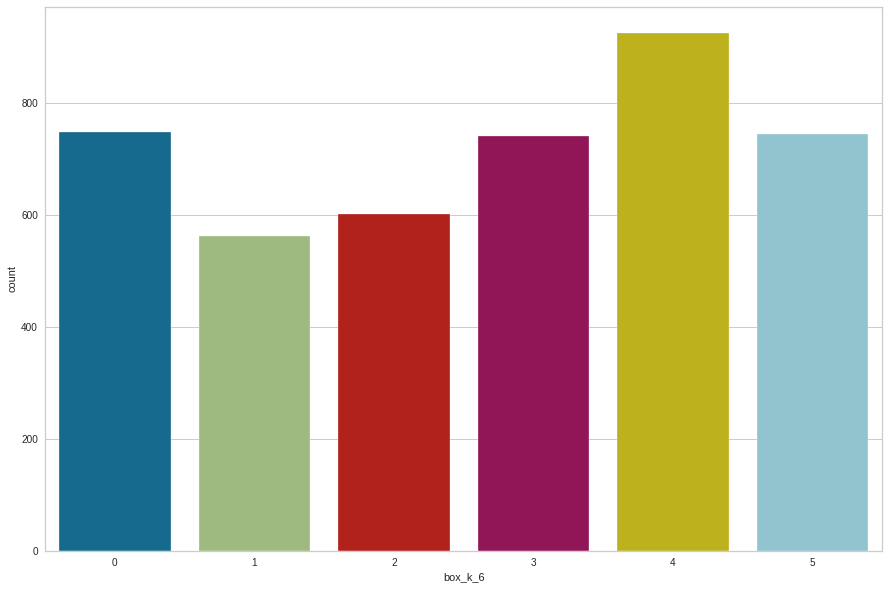

In [209]:
fig = plt.figure(figsize=(15,10))
sns.countplot(x='box_k_6', data=rfmt_boxcox2);

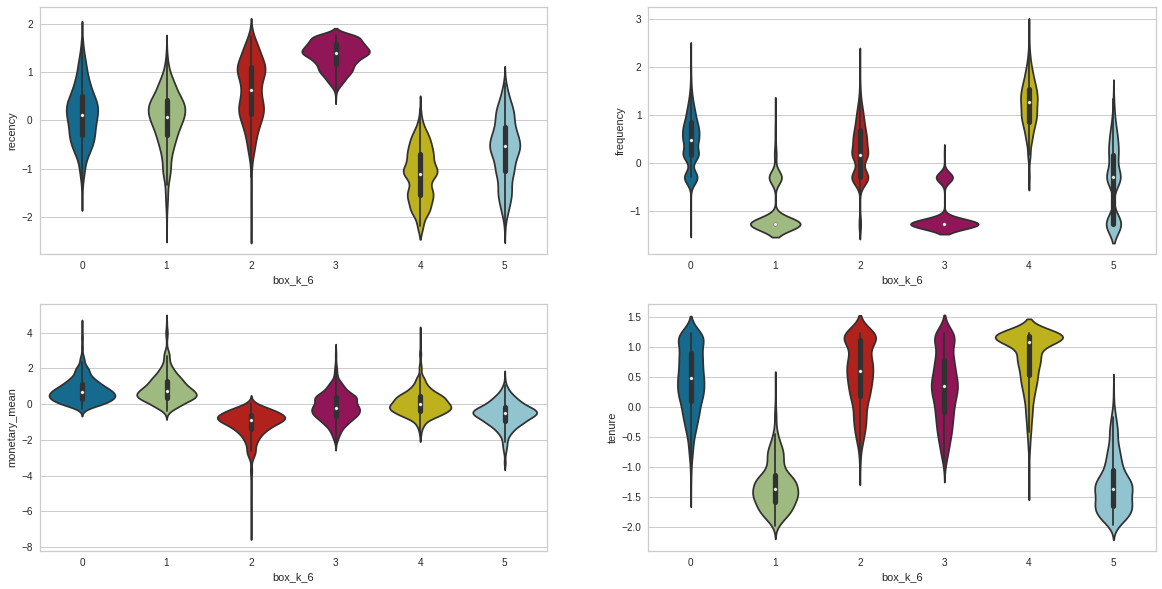

In [210]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
ax = ax.ravel()
for pos, col in enumerate(COLUMNS2):
  # use violinplot to see each cluster's variable is distrubuted
  sns.violinplot(x='box_k_6', y=col, data=rfmt_boxcox2, ax=ax[pos])

In [211]:
features = rfmt_boxcox2[COLUMNS2]
umap_2d = umap.UMAP(n_components=2, init='random', random_state=SEED2)
proj_2d = umap_2d.fit_transform(features)

In [212]:
fig = go.Figure(data=go.Scatter(x=proj_2d[:,0], y=proj_2d[:,1],
                 mode="markers",
                 marker=dict(color=color_change_2d(rfmt_boxcox2,'box_k_6',6),size=5,showscale=False)))
fig.update_layout(height=500, title_text="Visualizing 2D Clusters K=6", showlegend=False)
fig.show(renderer="colab")

####K=5

In [213]:
model = KMeans(n_clusters=5,random_state=SEED2)
model.fit(rfmt_boxcox2)
model.cluster_centers_.round(4)

array([[ 0.2566, -0.4638,  0.9595, -0.215 ,  0.3114,  0.8829,  2.0115,
         3.0639,  1.6176,  4.4206,  3.4028,  3.7453,  1.4224],
       [ 0.2259, -0.2197, -0.0876, -0.2061,  0.3629,  1.1298,  1.2124,
         2.1015,  2.8169,  3.6174,  3.8848,  5.3336,  7.5976],
       [ 0.4999,  0.3335, -0.7027,  0.5733,  0.616 ,  1.5823,  0.9352,
         0.3915,  1.5723,  0.9389,  1.4776,  7.3105,  3.8105],
       [-1.2254,  1.2921,  0.0219,  0.9143,  1.    ,  1.    ,  2.    ,
         2.    ,  4.    ,  4.9467,  6.9956,  1.6805,  5.3402],
       [-0.2267, -0.6605, -0.7843, -1.0855,  0.1621,  0.2495,  1.1184,
         0.9472,  4.2495,  1.3934,  0.8652,  0.3424,  4.4936]])

In [214]:
rfmt_mean_table.groupby('box_k_5')[COLUMNS2].mean()

recency  frequency  monetary_mean  tenure
box_k_5                                           
0         91.122      4.677        224.158 296.065
1         33.391      2.168        177.805  67.317
2         14.430     12.789        380.557 314.570
3        255.640      1.320        226.254 271.402
4         74.368      1.774        651.309 112.466

In [215]:
rfmt_boxcox2.groupby('box_k_5')[COLUMNS2].mean()

recency  frequency  monetary_mean  tenure
box_k_5                                           
0          0.312      0.460         -0.328   0.596
1         -0.516     -0.504         -0.588  -1.351
2         -1.042      1.151          0.329   0.746
3          1.358     -0.964         -0.375   0.392
4          0.114     -0.707          1.101  -0.956

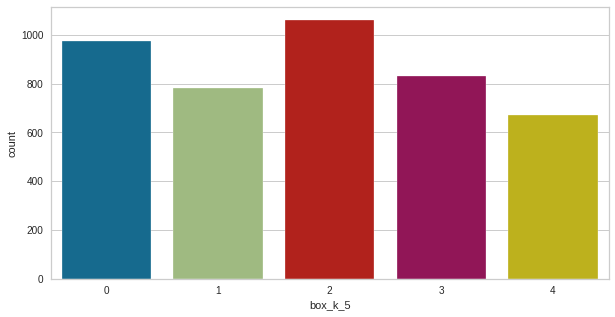

In [216]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='box_k_5', data=rfmt_boxcox2);

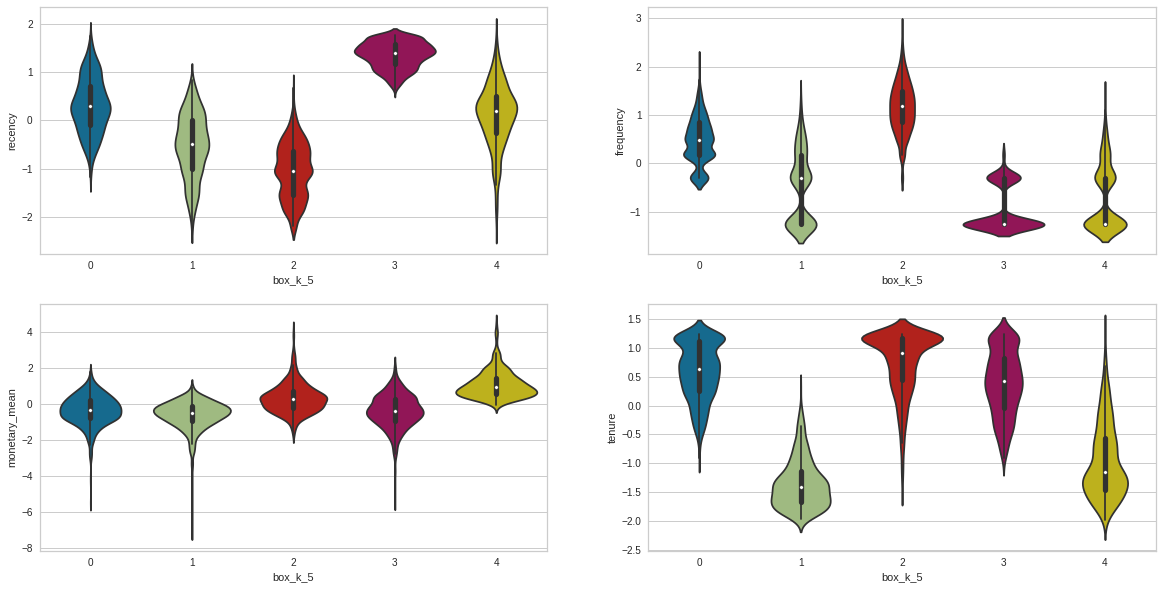

In [217]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
ax = ax.ravel()
for pos, col in enumerate(COLUMNS2):
  # use violinplot to see each cluster's variable is distrubuted
  sns.violinplot(x='box_k_5', y=col, data=rfmt_boxcox2, ax=ax[pos])

In [218]:
features = rfmt_boxcox2[COLUMNS2]
umap_2d = umap.UMAP(n_components=2, init='random', random_state=SEED2)
proj_2d = umap_2d.fit_transform(features)

In [219]:
fig = go.Figure(data=go.Scatter(x=proj_2d[:,0], y=proj_2d[:,1],
                 mode="markers",
                 marker=dict(color=color_change_2d(rfmt_boxcox2,'box_k_5',5),size=5,showscale=False)))
fig.update_layout(height=500, title_text="Visualizing 2D Clusters K=5", showlegend=False)
fig.show(renderer="colab")

####K=4

In [220]:
model = KMeans(n_clusters=4,random_state=SEED2)
model.fit(rfmt_boxcox2)
model.cluster_centers_.round(4)

array([[-0.2257, -0.6649, -0.7779, -1.0889,  0.1609,  0.2477,  1.1175,
         0.9476,  4.226 ,  1.4123,  0.8662,  0.34  ,  4.4684],
       [ 0.0806, -0.2211,  0.7968, -0.0513,  0.4236,  0.9008,  2.0326,
         2.9298,  1.9493,  4.4576,  3.9573,  3.4714,  1.6155],
       [ 0.5216,  0.3105, -0.4039,  0.5637,  0.61  ,  1.5652,  1.2935,
         0.4687,  1.2836,  1.3751,  1.6995,  6.7134,  4.2358],
       [-0.3706,  0.262 , -0.1918,  0.0772,  0.5406,  1.0428,  1.2104,
         2.2075,  3.6851,  4.1597,  5.1451,  4.2685,  7.7017]])

In [221]:
rfmt_mean_table.groupby('box_k_4')[COLUMNS2].mean()

recency  frequency  monetary_mean  tenure
box_k_4                                           
0        206.077      2.263        141.183 276.512
1         36.985      2.008        278.193  64.750
2         24.725     10.796        320.652 310.966
3        157.866      2.113        607.252 234.714

In [222]:
rfmt_boxcox2.groupby('box_k_4')[COLUMNS2].mean()

recency  frequency  monetary_mean  tenure
box_k_4                                           
0          1.080     -0.467         -0.897   0.433
1         -0.425     -0.605         -0.090  -1.373
2         -0.767      1.017          0.118   0.717
3          0.795     -0.524          1.007   0.085

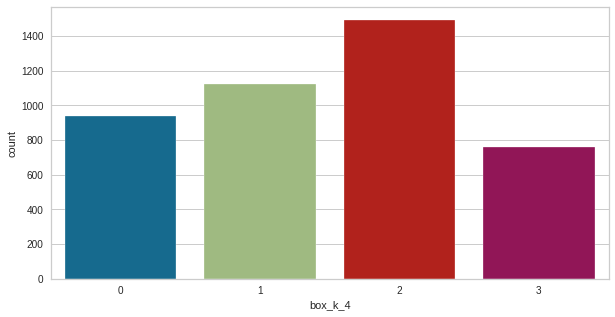

In [223]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='box_k_4', data=rfmt_boxcox2);

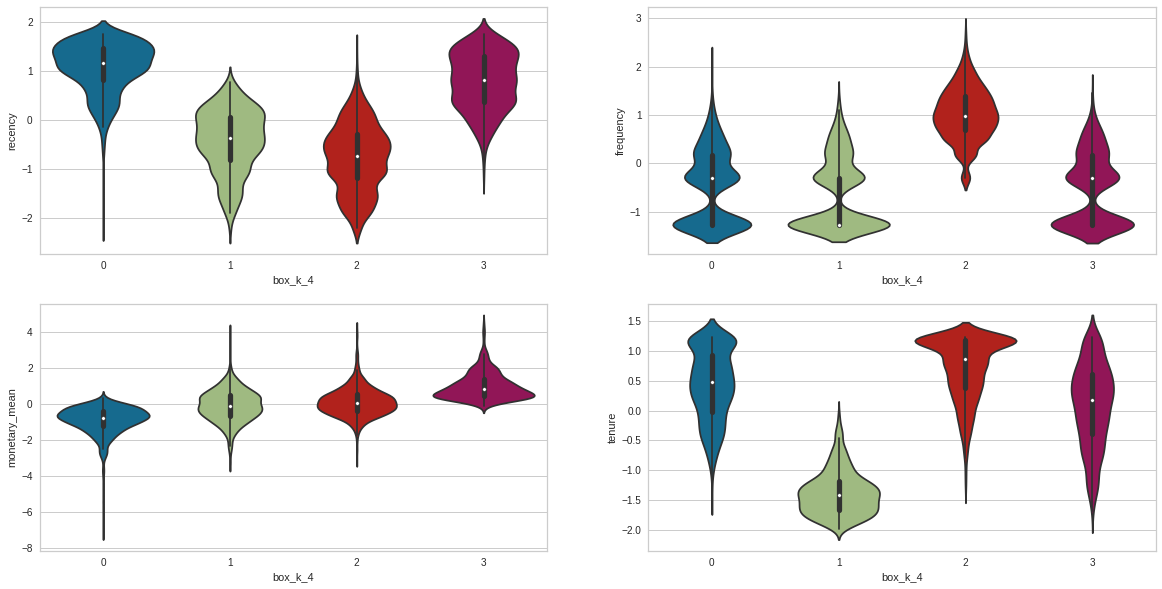

In [224]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
ax = ax.ravel()
for pos, col in enumerate(COLUMNS2):
  # use violinplot to see each cluster's variable is distrubuted
  sns.violinplot(x='box_k_4', y=col, data=rfmt_boxcox2, ax=ax[pos])

In [225]:
features = rfmt_boxcox2[COLUMNS2]
umap_2d = umap.UMAP(n_components=2, init='random', random_state=SEED2)
proj_2d = umap_2d.fit_transform(features)

In [226]:
fig = go.Figure(data=go.Scatter(x=proj_2d[:,0], y=proj_2d[:,1],
                 mode="markers",
                 marker=dict(color=color_change_2d(rfmt_boxcox2,'box_k_4',4),size=5,showscale=False)))
fig.update_layout(height=500, title_text="Visualizing 2D Clusters K=4", showlegend=False)
fig.show(renderer="colab")

####K=3

In [227]:
model = KMeans(n_clusters=3,random_state=SEED2)
model.fit(rfmt_boxcox2)
model.cluster_centers_.round(4)

array([[ 8.4200e-02, -1.9040e-01,  6.9150e-01, -1.0000e-02,  4.3480e-01,
         9.3000e-01,  1.9492e+00,  2.7490e+00,  2.1193e+00,  4.5110e+00,
         3.8299e+00,  3.4554e+00,  1.5487e+00],
       [ 4.8920e-01,  3.3580e-01, -7.0500e-01,  5.8280e-01,  6.1190e-01,
         1.5774e+00,  9.7740e-01,  4.1550e-01,  1.5714e+00,  9.7860e-01,
         1.4250e+00,  7.1524e+00,  3.8262e+00],
       [-2.6440e-01, -2.2000e-03, -2.0600e-01, -2.3530e-01,  4.3780e-01,
         8.4700e-01,  1.3522e+00,  1.8455e+00,  3.4606e+00,  3.2947e+00,
         3.9430e+00,  3.2516e+00,  6.9837e+00]])

In [228]:
rfmt_mean_table.groupby('box_k_3')[COLUMNS2].mean()

recency  frequency  monetary_mean  tenure
box_k_3                                           
0         44.362      1.909        358.388  71.856
1         29.251     10.097        351.735 306.043
2        211.097      2.004        248.040 272.678

In [229]:
rfmt_boxcox2.groupby('box_k_3')[COLUMNS2].mean()

recency  frequency  monetary_mean  tenure
box_k_3                                           
0         -0.303     -0.645          0.116  -1.310
1         -0.678      0.953          0.185   0.676
2          1.124     -0.568         -0.339   0.402

In [230]:
# sns.pairplot(rfmt_scaled_df[['recency', 'frequency','monetary','tenure','box_k_3']], hue="box_k_3")

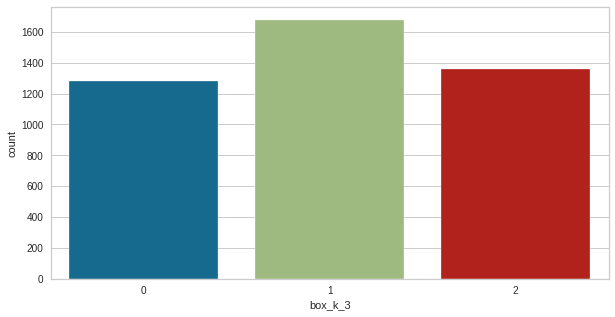

In [231]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='box_k_3', data=rfmt_boxcox2);

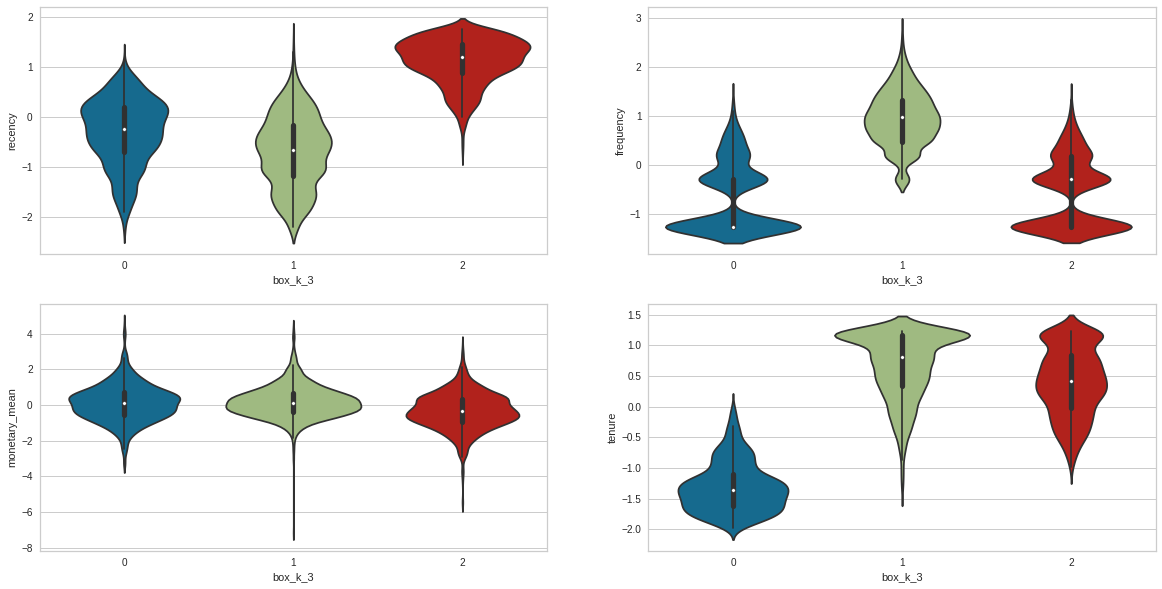

In [232]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
ax = ax.ravel()
for pos, col in enumerate(COLUMNS2):
  # use violinplot to see each cluster's variable is distrubuted
  sns.violinplot(x='box_k_3', y=col, data=rfmt_boxcox2, ax=ax[pos])

In [233]:
features = rfmt_boxcox2[COLUMNS2]
umap_2d = umap.UMAP(n_components=2, init='random', random_state=SEED2)
proj_2d = umap_2d.fit_transform(features)

In [234]:
fig = go.Figure(data=go.Scatter(x=proj_2d[:,0], y=proj_2d[:,1],
                 mode="markers",
                 marker=dict(color=color_change_2d(rfmt_boxcox2,'box_k_3',3),size=5,showscale=False)))
fig.update_layout(height=500, title_text="Visualizing 2D Clusters K=3", showlegend=True)
fig.show(renderer="colab")

##Conclusion


<!-- ลูกค้าใหม่ที่น่าจับตามอง - ลูกค้าใหม่ที่เพิ่งมาซื้อ มีเงินเยอะ 
ซื้อไม่บ่อย  
ลูกค้าประจำ - ลูกค้าเก่าที่เพิ่งมาซื้อ เงินน้อย แต่ซื้อบ่อย  
ลูกค้าที่หมดใจ - ลูกค้าเก่าที่ไม่ได้มาซื้อนานแล้ว เงินน้อย ซื้อไม่บ่อย  
ลูกค้าในอุดมคติ - ลูกค้าเก่าเพิ่งมาซื้อ เงินเยอะ ซื้อบ่อย  
ลูกค้าขาจร - ลูกค้าใหม่ที่เพิ่งมาซื้อ ซื้อไม่บ่อย เงินไม่เยอะ -->
```
*   ผลจากการทดสอบทั้งสอง 2 Model จะเห็นว่ามีความแตกต่างของข้อมูลที่สามารถเห็นได้ชัดคือส่วนของ Model2 - RFMT Mean ที่จะแสดงกลุ่มลูกค้าใหม่ที่ Model 1 - RFMT มองไม่เห็น
*   ผลจากการทดสอบ Interpretation โดยใช้ Violin plot เป็นตัวแสดงผลการทดสอบ K ที่ 3 - 10 
จะเห็นได้ว่า RFMT จะแสดงกลุ่มลูกค้าได้ชัดเจนและเห็นกลุ่มลูกค้าได้ครบทุกด้านตั้งแต่ K 7 ขึ้นไปหากต่ำกว่าจะทำให้กลุ่มลูกค้าบ้างกลุ่มหายไป
ส่วนของ RFMT Mean จะสามารถแสดงเห็นกลุ่มลูกค้าที่ RFMT ปกติมองไม่เห็นและยังสามารถแบ่งได้ชัดเจนมากกว่า RFMT แม้ค่า K จะต่ำกว่า 7

```
**จากข้อมูลที่ได้และนำมาวิเคราะห์นั้นจะเห็นว่าข้อมูลที่สามารถแบ่งกลุ่มและนำมาใช้ประโยชน์ในธุรกิจของเราได้นั้นคือ K =5**
  
**ซึ่งมีความหมายของแต่ละกลุ่มดังนี้**
```
*   ลูกค้ากลุ่มที่ 1 - (ลูกค้าประจำ)
        - ลูกค้าเก่าไมได้ซื้อมานานแล้ว เงินน้อย ซื้อบ่อย

*   ลูกค้ากลุ่มที่ 2 - (ลูกค้าขาจร)
        - ลูกค้าใหม่เพิ่งซื้อ เงินน้อย ซื้อไม่บ่อย  

*   ลูกค้ากลุ่มที่ 3 - (ลูกค้าในอุดมคติ)
        - ลูกค้าเก่าเพิ่งซื้อ เงินเยอะ ซื้อบ่อย  

*   ลูกค้ากลุ่มที่ 4 - (ลูกค้าที่หมดใจ)
        - ลูกค้าเก่าไม่ได้มาซื้อนานแล้ว เงินน้อย ซื้อไม่บ่อย 

*   ลูกค้ากลุ่มที่ 5 - (ลูกค้าใหม่ที่น่าจับตามอง หรือ ลูกค้าที่น่าผลักดันให้กลับมา)
        - ลูกค้าใหม่ไม่ได้ซื้อนานแล้ว ซื้อไม่บ่อย เงินเยอะ

```

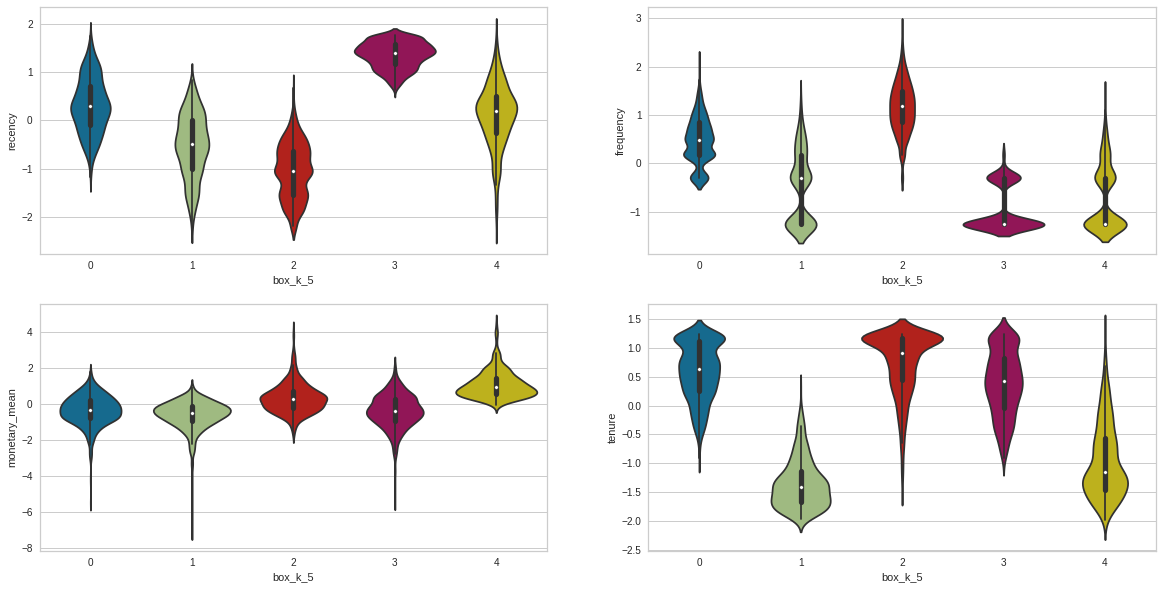

In [235]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,10))
ax = ax.ravel()
for pos, col in enumerate(COLUMNS2):
  # use violinplot to see each cluster's variable is distrubuted
  sns.violinplot(x='box_k_5', y=col, data=rfmt_boxcox2, ax=ax[pos])

In [236]:
features = rfmt_boxcox2[COLUMNS2]
umap_2d = umap.UMAP(n_components=2, init='random', random_state=SEED2)
proj_2d = umap_2d.fit_transform(features)

In [237]:
fig = go.Figure(data=go.Scatter(x=proj_2d[:,0], y=proj_2d[:,1],
                 mode="markers",
                 marker=dict(color=color_change_2d(rfmt_boxcox2,'box_k_5',5),size=5,showscale=False)))
fig.update_layout(height=500, title_text="Visualizing 2D Clusters K=5", showlegend=False)
fig.show(renderer="colab")

# Pipeline


```
Objective: 
```



In [238]:
rfmt_segment_mean_table.head()

customerid first_purchased_date last_purchased_date  recency  \
customerid                                                                 
12347            12347           2010-12-07          2011-12-07        3   
12348            12348           2010-12-16          2011-09-25       76   
12349            12349           2011-11-21          2011-11-21       19   
12350            12350           2011-02-02          2011-02-02      311   
12352            12352           2011-02-16          2011-11-03       37   

            frequency  monetary_mean  tenure  box_k_2  box_k_3  box_k_4  \
customerid                                                                
12347               7        615.714     368        1        1        2   
12348               4        449.250     359        1        1        2   
12349               1       1758.000      19        0        0        1   
12350               1        334.000     311        0        2        3   
12352              11        140.455     297        1        1        2   

            box_k_5  box_k_6  box_k_7  box_k_8  box_k_9  box_k_10  
customerid                                                         
12347             2        4        5        7        1         0  
12348             0        0        3        3        4         6  
12349             4        1        4        5        3         1  
12350             3        3        6        2        6         3  
12352             0        4        5        0        2         2

In [239]:
class Pipeline:
    def __init__(self):
        self.transformer = preprocessing.PowerTransformer(method='box-cox', standardize=True)
        self.columns = ['recency', 'frequency', 'monetary_mean', 'tenure']

    def feature_engineering(self,data,method):
        if method == 'train':
          box = self.transformer.fit_transform(data[self.columns])
        elif method == 'predict':
          box = self.transformer.transform(data[self.columns])
        return box

    def build(self,data,method='train'):
        return self.feature_engineering(data,method)
        

In [240]:
# df_test = pd.read_csv(url)
pipeline = Pipeline()

In [241]:
# pb = pipeline.build(data=rfmt_segment_table,method='train')
pb = pipeline.build(data = rfmt_segment_mean_table,method='train')

In [242]:
model = KMeans(n_clusters=5,random_state=SEED2)
model.fit(pb)
# model.fit(rfmt_boxcox2[['recency', 'frequency', 'monetary_mean', 'tenure']])
labels = model.labels_

# นำข้อมูล k ไปกระจายใน DataFrame ใหม่เพื่อเป็นการ return นักเตะที่มีสมรรถนะใกล้เคียงไปอยู่ในแต่ละคลัสเตอร์
rfmt_segment_mean_table['k=5'] = labels
rfmt_pipe1['k=5'] = labels

In [243]:
rfmt_boxcox2[['recency', 'frequency', 'monetary_mean', 'tenure']].tail()

recency  frequency  monetary_mean  tenure
customerid                                           
18280         1.470     -1.266         -0.396   0.451
18281         1.068     -1.266         -1.479  -0.357
18282        -1.180      0.175         -1.902  -0.818
18283        -1.551      1.587         -0.866   0.941
18287        -0.100      0.175          1.275  -0.180

In [244]:
pt_test = preprocessing.PowerTransformer(method='box-cox', standardize=True)
cols = ['recency', 'frequency', 'monetary_mean', 'tenure']
matric3 = pt_test.fit_transform(rfmt_mean_table[cols])

In [245]:
pt_test2 = preprocessing.PowerTransformer(method='box-cox', standardize=True)
cols = ['recency', 'frequency', 'monetary_mean', 'tenure']
matric4 = pt_test2.fit_transform(rfmt_segment_mean_table[cols])


In [246]:
matric4

array([[-1.69403668,  0.98483854,  1.28283624,  1.18377439],
       [ 0.3326016 ,  0.47549921,  0.84720021,  1.11102287],
       [-0.65914761, -1.26627328,  2.75005099, -1.79053441],
       ...,
       [-1.18024464,  0.17542364, -1.90234838, -0.81763729],
       [-1.55117706,  1.58681641, -0.86603122,  0.9408182 ],
       [-0.10021464,  0.17542364,  1.27520582, -0.18005894]])

In [247]:
matric3

array([[-1.69403668,  0.98483854,  1.28283624,  1.18377439],
       [ 0.3326016 ,  0.47549921,  0.84720021,  1.11102287],
       [-0.65914761, -1.26627328,  2.75005099, -1.79053441],
       ...,
       [-1.18024464,  0.17542364, -1.90234838, -0.81763729],
       [-1.55117706,  1.58681641, -0.86603122,  0.9408182 ],
       [-0.10021464,  0.17542364,  1.27520582, -0.18005894]])

In [248]:
matric2

array([[-1.69403668,  0.98483854,  1.28283624,  1.18377439],
       [ 0.3326016 ,  0.47549921,  0.84720021,  1.11102287],
       [-0.65914761, -1.26627328,  2.75005099, -1.79053441],
       ...,
       [-1.18024464,  0.17542364, -1.90234838, -0.81763729],
       [-1.55117706,  1.58681641, -0.86603122,  0.9408182 ],
       [-0.10021464,  0.17542364,  1.27520582, -0.18005894]])

In [249]:
pb

array([[-1.69403668,  0.98483854,  1.28283624,  1.18377439],
       [ 0.3326016 ,  0.47549921,  0.84720021,  1.11102287],
       [-0.65914761, -1.26627328,  2.75005099, -1.79053441],
       ...,
       [-1.18024464,  0.17542364, -1.90234838, -0.81763729],
       [-1.55117706,  1.58681641, -0.86603122,  0.9408182 ],
       [-0.10021464,  0.17542364,  1.27520582, -0.18005894]])

In [250]:
rfmt_segment_mean_table['box_k_5'] == labels

customerid
12347    True
12348    True
12349    True
12350    True
12352    True
         ... 
18280    True
18281    True
18282    True
18283    True
18287    True
Name: box_k_5, Length: 4317, dtype: bool

In [251]:
# labels

In [252]:
testDataframe = pd.DataFrame({'box_k_5':rfmt_boxcox2['box_k_5'],
              'labels':labels})


In [253]:
testDataframe['box_k_5'].value_counts()

2    1061
0     973
3     831
1     780
4     672
Name: box_k_5, dtype: int64

In [254]:
testDataframe['labels'].value_counts()

2    1061
0     973
3     831
1     780
4     672
Name: labels, dtype: int64

In [255]:
rfmt_boxcox2['box_k_5'] == labels

customerid
12347    True
12348    True
12349    True
12350    True
12352    True
         ... 
18280    True
18281    True
18282    True
18283    True
18287    True
Name: box_k_5, Length: 4317, dtype: bool

# Deployment


```
Objective: 
```



In [256]:
!pip install gradio -q

     |████████████████████████████████| 865 kB 4.9 MB/s 
     |████████████████████████████████| 2.0 MB 61.6 MB/s 
     |████████████████████████████████| 210 kB 67.6 MB/s 
     |████████████████████████████████| 3.6 MB 55.2 MB/s 
     |████████████████████████████████| 856 kB 73.1 MB/s 
     |████████████████████████████████| 61 kB 435 kB/s 


In [257]:
rfmt_segment_mean_table = rfmt_segment_mean_table.drop(columns=['box_k_2','box_k_3','box_k_4','box_k_6','box_k_7','box_k_8','box_k_9','box_k_10'])

In [258]:
def get_segment(index):
      # find_segment = rfmt_segment_table[rfmt_segment_table['k=4'] == index]
      find_segment = rfmt_segment_mean_table[rfmt_segment_mean_table['box_k_5'] == index]
      find_segment.drop('box_k_5' ,axis=1 ,inplace=True)
      find_segment.drop('k=5' ,axis=1 ,inplace=True)
      return find_segment

In [259]:
import gradio as gr

In [260]:
def predict_segment(recency, frequency, monetary_mean, tenure):
  
    input = pd.DataFrame({
        'recency': recency,
        'frequency': frequency,
        'monetary_mean': monetary_mean,
        'tenure': tenure,
        }, index=[0])
    
    pbb = pipeline.build(data=input,method='predict')
    index_group = model.predict(pbb)[0]


    returnsegment = get_segment(index_group)
    returnsegment = returnsegment.set_index('customerid').sort_index(ascending=True)
    groups = ['ลูกค้ากลุ่มที่ 1 - ลูกค้าเก่าไมได้ซื้อมานานแล้ว เงินน้อย ซื้อบ่อย', 'ลูกค้ากลุ่มที่ 2 - ลูกค้าใหม่เพิ่งซื้อ เงินน้อย ซื้อไม่บ่อย','ลูกค้ากลุ่มที่ 3 - ลูกค้าเก่าเพิ่งซื้อ เงินเยอะ ซื้อบ่อย'
    , 'ลูกค้ากลุ่มที่ 4 - ลูกค้าเก่าไม่ได้มาซื้อนานแล้ว เงินน้อย ซื้อไม่บ่อย','ลูกค้ากลุ่มที่ 5 - ลูกค้าใหม่ซื้อนานแล้ว ซื้อไม่บ่อย เงินเยอะ']
    return  groups[model.predict(pbb)[0]],returnsegment.head(1000)


recency = gr.inputs.Textbox(lines=1, placeholder=None, default="", label='recency')
# recency = gr.inputs.Slider(minimum=1, maximum=380,step=1, default=1, label='recency')

frequency = gr.inputs.Textbox(lines=1, placeholder=None, default="", label='frequency')
# frequency = gr.inputs.Slider(minimum=1, maximum=250, step=1, default=1, label='frequency')

monetary_mean = gr.inputs.Textbox(lines=1, placeholder=None, default="", label='monetary_mean')
# monetary = gr.inputs.Slider(minimum=2, maximum=279489, step=0.1, default=0.1, label='monetary')

# gradio.inputs.Slider(self, minimum=0, maximum=100, step=None, default=None, label=None)

tenure = gr.inputs.Textbox(lines=1, placeholder=None, default="", label='tenure')
# tenure = gr.inputs.Slider(minimum=1, maximum=380, step=1, default=1, label='tenure')

In [261]:
rfmt_segment_mean_table.nlargest(5,'monetary_mean')

customerid first_purchased_date last_purchased_date  recency  \
customerid                                                                 
12357            12357           2011-11-06          2011-11-06       34   
15749            15749           2011-01-11          2011-04-18      236   
12688            12688           2011-08-18          2011-08-18      114   
12415            12415           2011-01-06          2011-11-15       25   
12752            12752           2011-09-19          2011-09-19       82   

            frequency  monetary_mean  tenure  box_k_5  k=5  
customerid                                                  
12357               1       6208.000      34        4    4  
15749               4       5384.000     333        4    4  
12688               1       4874.000     114        4    4  
12415              26       4758.654     338        2    2  
12752               1       4367.000      82        4    4

In [262]:
rfmt_segment_mean_table.nsmallest(5,'monetary_mean')

customerid first_purchased_date last_purchased_date  recency  \
customerid                                                                 
16446            16446           2011-05-18          2011-12-09        1   
17900            17900           2011-06-02          2011-06-28      165   
16738            16738           2011-02-15          2011-02-15      298   
17816            17816           2010-12-09          2011-11-03       37   
18037            18037           2010-12-12          2011-07-08      155   

            frequency  monetary_mean  tenure  box_k_5  k=5  
customerid                                                  
16446               3          1.000     206        1    1  
17900               4          3.750     191        0    0  
16738               1          4.000     298        3    3  
17816               4          9.250     366        0    0  
18037               6         11.667     363        0    0

In [263]:
# rfmt_segment_table.sample(100).loc[rfmt_segment_table['k=4'] == 1]
rfmt_segment_mean_table.sample(100).loc[rfmt_segment_mean_table['box_k_5'] == 2]

customerid first_purchased_date last_purchased_date  recency  \
customerid                                                                 
14607            14607           2011-03-23          2011-11-24       16   
13536            13536           2011-09-25          2011-12-08        2   
14051            14051           2010-12-08          2011-12-09        1   
15755            15755           2011-02-18          2011-12-08        2   
16126            16126           2011-02-16          2011-11-10       30   
14577            14577           2010-12-12          2011-11-27       13   
14524            14524           2010-12-14          2011-11-08       32   
12841            12841           2010-12-03          2011-12-05        5   
13021            13021           2010-12-09          2011-12-05        5   
17576            17576           2010-12-09          2011-12-01        9   
13417            13417           2011-05-18          2011-12-05        5   
15291            15291           2010-12-01          2011-11-14       26   
14099            14099           2010-12-20          2011-11-23       17   
15950            15950           2010-12-15          2011-12-08        2   
14049            14049           2011-01-26          2011-11-23       17   
14334            14334           2010-12-16          2011-11-23       17   
13488            13488           2010-12-07          2011-11-22       18   
13319            13319           2010-12-07          2011-12-04        6   
12901            12901           2011-03-14          2011-12-01        9   
13654            13654           2011-03-11          2011-10-27       44   
16161            16161           2010-12-06          2011-12-08        2   
18016            18016           2010-12-10          2011-11-07       33   
13705            13705           2010-12-01          2011-12-02        8   

            frequency  monetary_mean  tenure  box_k_5  k=5  
customerid                                                  
14607              17        645.941     262        2    2  
13536               7        492.000      76        2    2  
14051              26        595.269     367        2    2  
15755               8        289.875     295        2    2  
16126               4       1572.000     297        2    2  
14577               4        215.000     363        2    2  
14524               9        204.889     361        2    2  
12841              26        147.923     372        2    2  
13021              12        215.333     366        2    2  
17576              22        154.545     366        2    2  
13417               2        320.500     206        2    2  
15291              20        229.850     374        2    2  
14099              12        257.750     355        2    2  
15950               5        336.800     360        2    2  
14049               6        922.667     318        2    2  
14334               9        282.111     359        2    2  
13488              17        524.176     368        2    2  
13319              36        296.222     368        2    2  
12901              36        452.583     271        2    2  
13654               6        451.167     274        2    2  
16161              26        204.269     369        2    2  
18016               5        295.600     365        2    2  
13705               3        237.333     374        2    2

##Interface

In [ ]:
iface = gr.Interface(
    predict_segment,
    outputs=[gr.outputs.Textbox(type="auto", label='Group'),gr.outputs.Dataframe(label="Segment")],
    inputs=[recency, frequency, monetary_mean, tenure])
            
iface.launch(debug=True)
# iface = gr.Interface(deployment,inputs=[recency,frequency,monetary,tenure],outputs="text")
# iface.launch()

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://59857.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


# References


https://www.geeksforgeeks.org/python-pandas-dataframe-quantile/

https://www.bualabs.com/archives/2297/exploratory-data-analysis-eda-pandas-profiling-pandas-dataframe-pandas-ep-6/

https://sprabasankar.medium.com/machine-learning-algorithm-rfm-model-efd543228a1e

https://plotly.com/python/treemaps/

https://medium.com/analytics-vidhya/feature-selection-feature-engineering-3bb09c67d8c5

https://pypi.org/project/colorama/

https://arnondora.in.th/feature-selection-machine-learning/

https://blog.datath.com/data-visualization-mindmap/

https://towardsdatascience.com/data-driven-growth-with-python-part-2-customer-segmentation-5c019d150444

https://www.bualabs.com/archives/2100/what-is-normalization-feature-scaling-rescaling-normalization-standardization-feedforward-train-machine-learning-preprocessing-ep-2/

https://scikit-learn.org/stable/index.html

https://lengyi.medium.com/%E0%B8%AB%E0%B8%B2%E0%B8%88%E0%B8%B3%E0%B8%99%E0%B8%A7%E0%B8%99-clusters-%E0%B8%97%E0%B8%B5%E0%B9%88%E0%B9%80%E0%B8%AB%E0%B8%A1%E0%B8%B2%E0%B8%B0%E0%B8%AA%E0%B8%A1%E0%B8%AA%E0%B8%B3%E0%B8%AB%E0%B8%A3%E0%B8%B1%E0%B8%9A-kmeans-clustering-%E0%B8%94%E0%B9%89%E0%B8%A7%E0%B8%A2-elbow-method-85421efe9d

https://www.youtube.com/watch?v=BQZ4CTYSPVQ

https://medium.com/data-espresso/scale-or-standardize-or-normalize-ef905613f275

https://www.kaggle.com/kadirduran/rfm-analysis-k-means-clustering-cohort-analysis


# Members


```
1620703122	ศรันย์รักษ์ จันทร์กลิ่น (ออม)
1620703940	พรพิพัฒน์ สิรมานนท์ (เกม)
1620706687	กมลรัตน์ รักษาพล (จอย)
```